In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Part 1

## 1.1) Ans:  

### checking basic info

In [2]:
df = pd.read_excel("Clustering Clean Ads_Data-2.xlsx")
df.head(5)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [3]:
df.tail(5)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN


In [4]:
df.shape
print('There are', df.shape[0],'rows and', df.shape[1],'columns.')

There are 23066 rows and 19 columns.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

**Observations:**
- There are 23066 rows and 19 columns.
- There are 6 float64, 7 int64 and 6 object datatypes.
- There are missing values for 3 columns (CTR, CPM, CPC).

In [6]:
df.dtypes

Timestamp                 object
InventoryType             object
Ad - Length                int64
Ad- Width                  int64
Ad Size                    int64
Ad Type                   object
Platform                  object
Device Type               object
Format                    object
Available_Impressions      int64
Matched_Queries            int64
Impressions                int64
Clicks                     int64
Spend                    float64
Fee                      float64
Revenue                  float64
CTR                      float64
CPM                      float64
CPC                      float64
dtype: object

In [7]:
df.duplicated().sum()

0

**There are no duplicate rows in the given dataset.**

In [8]:
df.Format.value_counts()

Video      11552
Display    11514
Name: Format, dtype: int64

In [9]:
df.isnull().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      4736
CPM                      4736
CPC                      4736
dtype: int64

In [10]:
df.isnull().sum()[df.isnull().sum()>0] 

CTR    4736
CPM    4736
CPC    4736
dtype: int64

**There are 3 columns (CTR, CPM, CPC) with 4736 missing values each.**

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.0000,120.000000,300.00000,7.200000e+02,728.00
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.0000,250.000000,300.00000,6.000000e+02,600.00
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.0000,72000.000000,72000.00000,8.400000e+04,216000.00
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.0000,33672.250000,483771.00000,2.527712e+06,27592861.00
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.0000,18282.500000,258087.50000,1.180700e+06,14702025.00
Impressions,23066.0,1.241520e+06,2.429400e+06,1.0000,7990.500000,225290.00000,1.112428e+06,14194774.00
Clicks,23066.0,1.067852e+04,1.735341e+04,1.0000,710.000000,4425.00000,1.279375e+04,143049.00
Spend,23066.0,2.706626e+03,4.067927e+03,0.0000,85.180000,1425.12500,3.121400e+03,26931.87
Fee,23066.0,3.351231e-01,3.196322e-02,0.2100,0.330000,0.35000,3.500000e-01,0.35
Revenue,23066.0,1.924252e+03,3.105238e+03,0.0000,55.365375,926.33500,2.091338e+03,21276.18


In [12]:
df.describe(include='object').T

,count,unique,top,freq
Timestamp,23066,2018,2020-11-13-22,13
InventoryType,23066,7,Format4,7165
Ad Type,23066,14,Inter224,1658
Platform,23066,3,Video,9873
Device Type,23066,2,Mobile,14806
Format,23066,2,Video,11552


**Observations:**
- Ad-Length ranges from minimum of 120 to maximum of 728.
- Maximum width of Ad is 600 and minimum width is 70.
- inter224 is the most selected Ad type.
- Most of the ads are shown in video format and supports Mobile.
- User clicks range from 1 to 143049.
- Maximum revenue earned for an ad is 21276.18.

## 1.2) Ans:

### Treating missing values

In [13]:
# Treat missing values in CPC, CTR and CPM 

df.head(2)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0


In [14]:
# Treat missing values in CTR column
def calculate_ctr(x):
    Clicks=df.Clicks
    Impressions=df.Impressions
    ctr = round(((Clicks/Impressions)*100),4)
    return ctr

In [15]:
df['CTR']= df[['CTR']].apply(lambda x: calculate_ctr(x))

In [16]:
df.head(3)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.3096,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.3509,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.2817,0.0,0.0


In [17]:
# Treat missing values in CPM column
def calculate_cpm(x):
    Spend=df.Spend
    Impressions=df.Impressions
    cpm = round(((Spend/Impressions)*1000),4)
    return cpm

In [18]:
df['CPM']= df[['CPM']].apply(lambda x: calculate_cpm(x))

In [19]:
df.head(3)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.3096,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.3509,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.2817,0.0,0.0


In [20]:
# Treat missing values in CPC column
def calculate_cpc(x):
    Spend=df.Spend
    Clicks=df.Clicks
    cpc = round((Spend/Clicks),4)
    return cpc

In [21]:
df['CPC']= df[['CPC']].apply(lambda x: calculate_cpc(x))

In [22]:
df.head(3)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.3096,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.3509,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.2817,0.0,0.0


In [23]:
df.isnull().sum()

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

**Missing values are treated**

In [24]:
df_new=df.copy()   # For kmeans
df_ss=df.copy()    # Foe silhouette score

## 1.3) Ans:

### Detecting outliers and treating them

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [26]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
num_columns = list(df_num.columns.values)
len(num_columns)

13

In [27]:
df_num.columns

Index(['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC'],
      dtype='object')

In [28]:
df_ss_num = df_num.copy()    # for question 1.8

Ad - Length


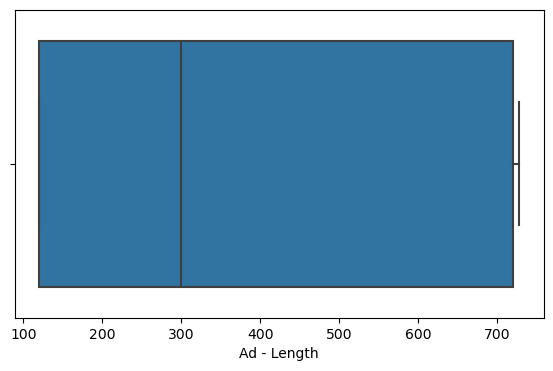

Ad- Width


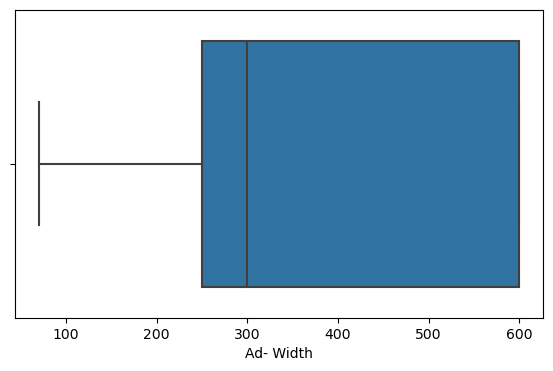

Ad Size


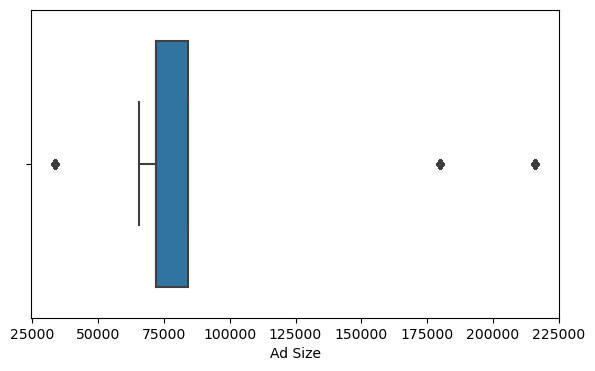

Available_Impressions


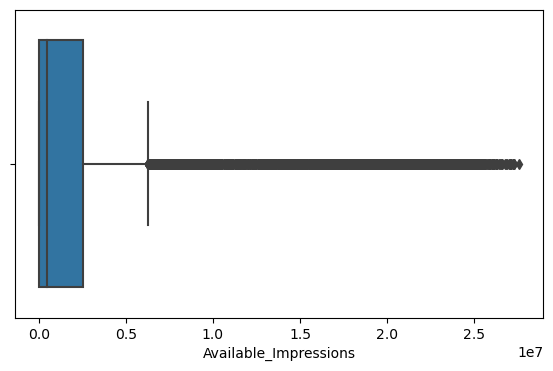

Matched_Queries


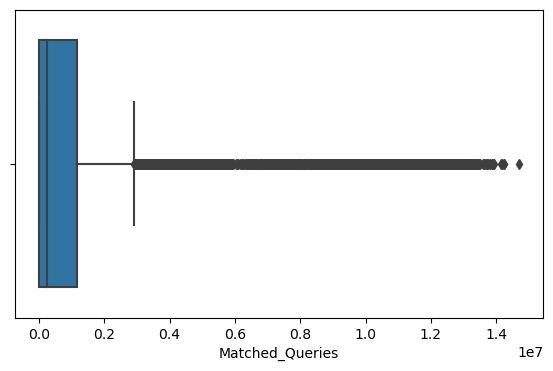

Impressions


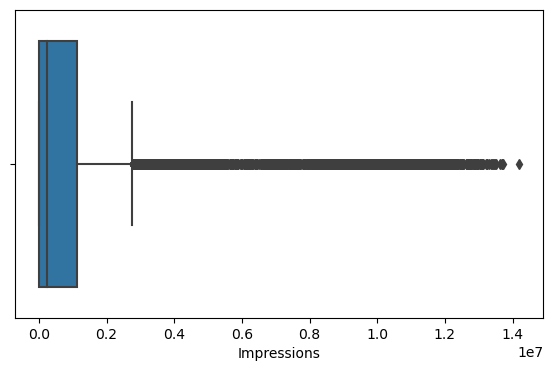

Clicks


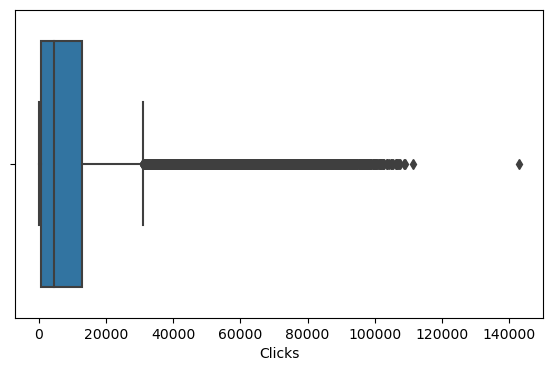

Spend


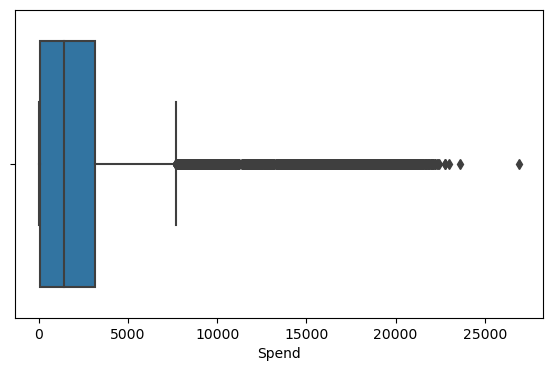

Fee


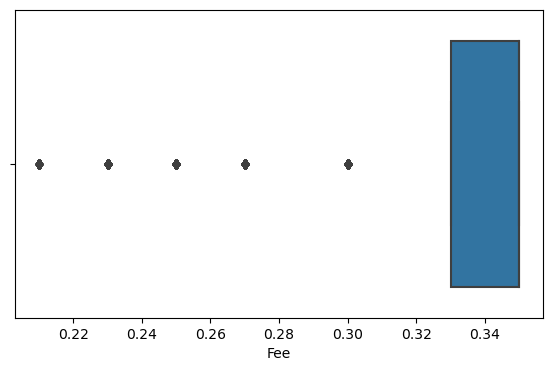

Revenue


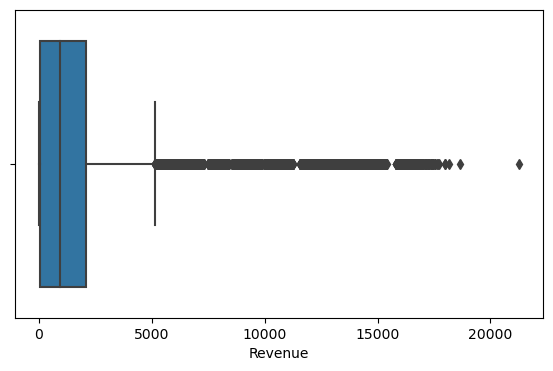

CTR


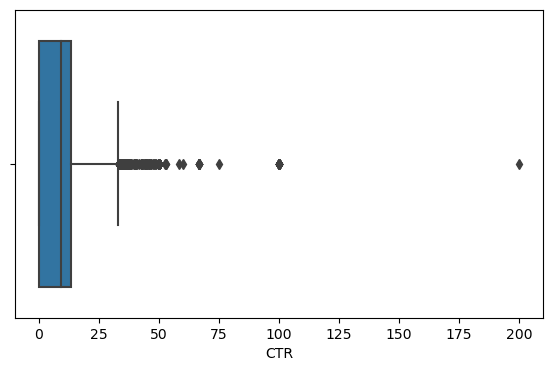

CPM


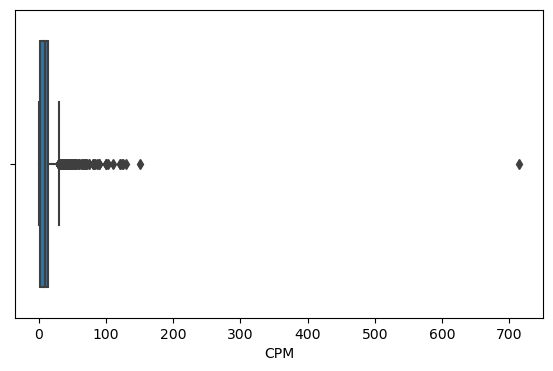

CPC


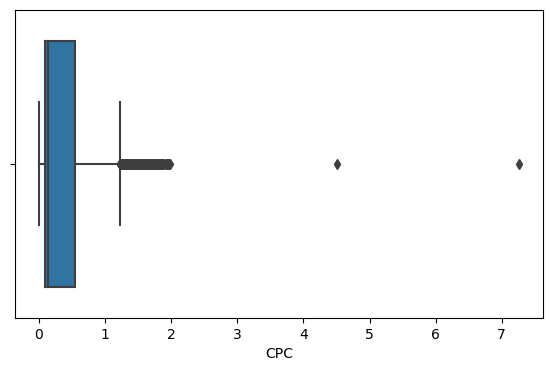

In [29]:
# To display boxplot for all numeric columns 
for col in df_num.columns[0:]:
    print(col)
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.boxplot(x=df_num[col])
    plt.show()

### Treating Outliers

In [30]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

In [31]:
# Count of outliers
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).sum()

Ad - Length                 0
Ad- Width                   0
Ad Size                  8448
Available_Impressions    2378
Matched_Queries          3192
Impressions              3269
Clicks                   1691
Spend                    2081
Fee                      3517
Revenue                  2325
CTR                       275
CPM                       207
CPC                       585
dtype: int64

In [32]:
# Count of outliers for quartile range of 0.95
((df_num > (Q3 + 1.5 * IQR)) & (df_num < df_num.quantile(0.95))).sum()

Ad - Length                 0
Ad- Width                   0
Ad Size                   659
Available_Impressions    1224
Matched_Queries          2038
Impressions              2115
Clicks                    537
Spend                     927
Fee                         0
Revenue                  1171
CTR                         0
CPM                         0
CPC                         0
dtype: int64

In [33]:
def treat_outlier(x):
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    q95=np.percentile(x,95)
    IQR=q75-q25
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    return x.apply(lambda y: q95 if y > q95 else y).apply(lambda y: q5 if y < q5 else y)

In [34]:
no_outlier = ['Ad - Length','Ad- Width']
outlier_list = [x for x in df_num.columns if x not in no_outlier]

In [35]:
for i in df_num[outlier_list]:    
    df_num[i]=treat_outlier(df_num[i])

**Boxplot showing the variables without outliers before treatment**

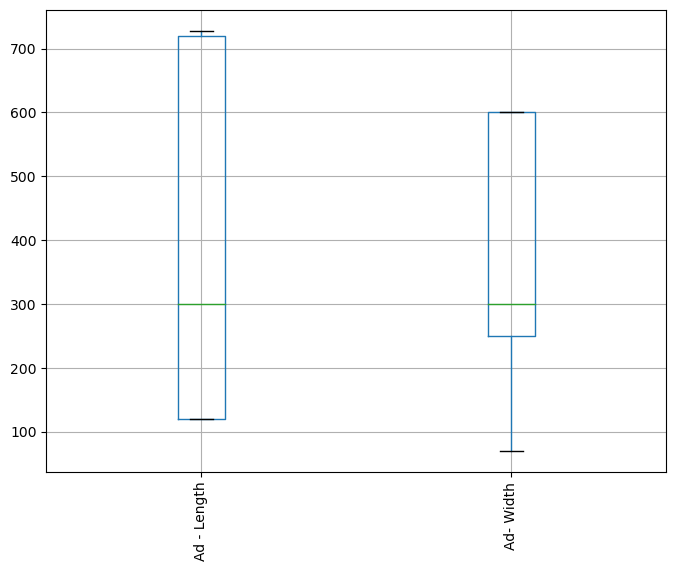

In [36]:
df_num[no_outlier].boxplot(figsize=(8,6))
plt.xticks(rotation=90)
plt.show()

**Boxplot post outlier treatment**

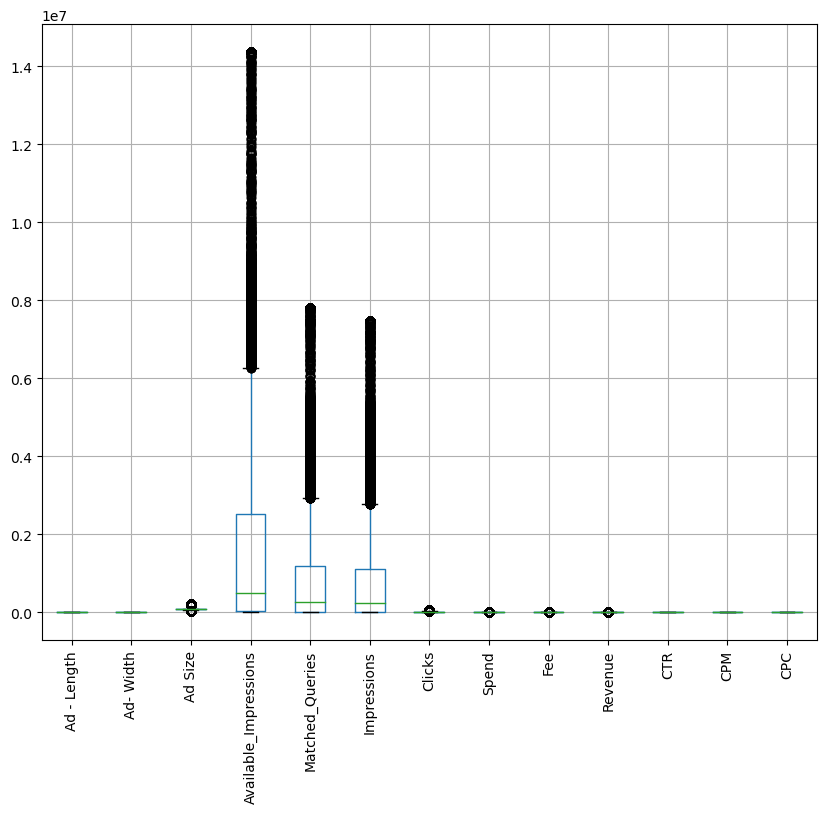

In [37]:
df_num.boxplot(figsize=(10,8))
plt.xticks(rotation=90)
plt.show()

## 1.4) Ans:

### Scaling the data using z-score

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.0000,120.000000,300.00000,7.200000e+02,7.280000e+02
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.0000,250.000000,300.00000,6.000000e+02,6.000000e+02
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.0000,72000.000000,72000.00000,8.400000e+04,2.160000e+05
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.0000,33672.250000,483771.00000,2.527712e+06,2.759286e+07
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.0000,18282.500000,258087.50000,1.180700e+06,1.470202e+07
Impressions,23066.0,1.241520e+06,2.429400e+06,1.0000,7990.500000,225290.00000,1.112428e+06,1.419477e+07
Clicks,23066.0,1.067852e+04,1.735341e+04,1.0000,710.000000,4425.00000,1.279375e+04,1.430490e+05
Spend,23066.0,2.706626e+03,4.067927e+03,0.0000,85.180000,1425.12500,3.121400e+03,2.693187e+04
Fee,23066.0,3.351231e-01,3.196322e-02,0.2100,0.330000,0.35000,3.500000e-01,3.500000e-01
Revenue,23066.0,1.924252e+03,3.105238e+03,0.0000,55.365375,926.33500,2.091338e+03,2.127618e+04


In [39]:
# Scaling the data using z-score
from scipy.stats import zscore
df_num_scaled=df_num.apply(zscore)
df_num_scaled.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.364496,-0.432797,-0.352218,-0.592761,-0.586089,-0.580978,-0.737121,-0.754487,0.481794,-0.712603,-0.999543,-1.067314,-0.908544
1,-0.364496,-0.432797,-0.352218,-0.592768,-0.586109,-0.580998,-0.737121,-0.754487,0.481794,-0.712603,-0.994168,-1.067314,-0.908544
2,-0.364496,-0.432797,-0.352218,-0.592505,-0.586073,-0.580961,-0.737121,-0.754487,0.481794,-0.712603,-1.003174,-1.067314,-0.908544
3,-0.364496,-0.432797,-0.352218,-0.592587,-0.586001,-0.580887,-0.737121,-0.754487,0.481794,-0.712603,-1.013545,-1.067314,-0.908544
4,-0.364496,-0.432797,-0.352218,-0.592925,-0.586131,-0.581021,-0.737121,-0.754487,0.481794,-0.712603,-0.986061,-1.067314,-0.908544


**Scaling the data increases the speed of algorithm as it compares variables with same units. It avoids the high variance between the variables, and thus, helps in deriving effective insights.**

## 1.5) Ans:

### Perform Hierarchical by constructing a Dendrogram 

In [40]:
# Euclidean distance
from scipy.spatial.distance import pdist

In [41]:
df_num_scaled_eucl = pdist(df_num_scaled , metric= 'euclidean')
df_num_scaled_eucl

array([5.37465846e-03, 3.63988073e-03, 1.40041796e-02, ...,
       3.77551323e+00, 1.13923857e-01, 3.77587780e+00])

In [42]:
# constructing a Dendrogram using WARD and Euclidean distance.
from scipy.cluster.hierarchy import dendrogram, linkage

In [43]:
wards_link = linkage(df_num_scaled, method = 'ward')    # Linkage function has Euclidean metric as default.

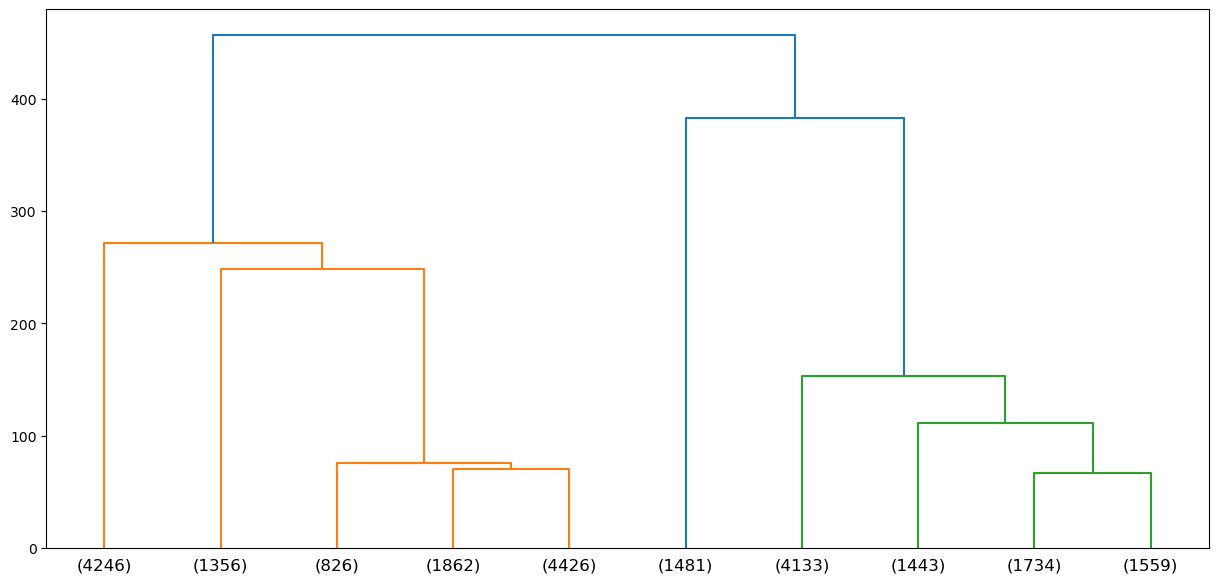

In [44]:
#dend = dendrogram(wards_link)
plt.figure(figsize=(15,7))
dend = dendrogram(wards_link,
                 truncate_mode='lastp',
                 p = 10,
                 )

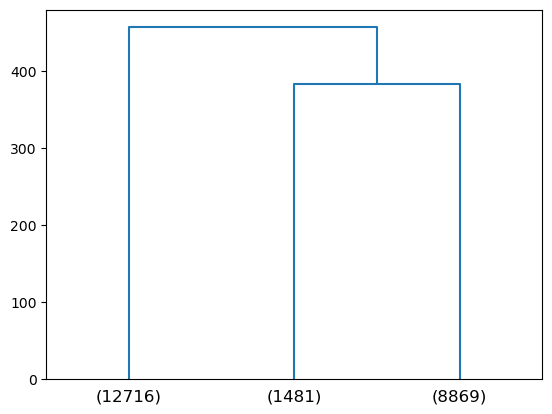

In [45]:
# Cutting Dendrogram

dend = dendrogram(wards_link,
                 truncate_mode='lastp',
                 p = 3, 
                 )

In [46]:
from scipy.cluster.hierarchy import fcluster

In [47]:
# Creating clusters
clusters = fcluster(wards_link, 290, criterion='distance')
clusters

array([3, 3, 3, ..., 1, 1, 1], dtype=int32)

In [48]:
# Appending clusters formed to 'clusters' column in the dataset
df['clusters'] = clusters
df_num['clusters'] = clusters
df_num.clusters.value_counts().sort_index()

1    12716
2     1481
3     8869
Name: clusters, dtype: int64

In [49]:
df.head(3)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,clusters
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.3096,0.0,0.0,3
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.3509,0.0,0.0,3
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.2817,0.0,0.0,3


In [50]:
aggdata=df_num.groupby('clusters').mean()
aggdata

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
clusters,,,,,,,,,,,,,
1,341.573451,473.458635,123959.735766,2.053601e+05,1.287030e+05,1.072176e+05,11981.443929,1411.960830,0.342366,975.635423,14.220966,13.178352,0.099389
2,686.892640,114.929102,69750.222822,1.349033e+07,7.389622e+06,7.079394e+06,17713.607022,12259.319007,0.252633,9171.310774,0.194399,1.704855,0.855422
3,397.275454,180.764460,62049.971812,2.995988e+06,1.564653e+06,1.516226e+06,4494.964370,2406.726216,0.340939,1608.595654,0.359132,1.747087,0.547350


- Cluster 1: Tier 3 ads: Has a mean spend of 1411.96 and Revenue 975.64
- Cluster 2: Tier 1 ads: Has a mean spend of 12259.32 and Revenue 9171.31
- Cluster 3: Tier 2 ads: Has a mean spend of 2406.73 and Revenue 1608.60

**Agglomerative Clustering**

In [51]:
#Agglomerative Clustering

from sklearn.cluster import AgglomerativeClustering

In [52]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
Cluster_agglo=cluster.fit_predict(df_num_scaled.iloc[:,0:13])
print(Cluster_agglo)

[1 1 1 ... 0 0 0]


In [53]:
# Appending Agglomerative clusters to 'Agglo_CLusters' column in the dataset
df['Agglo_CLusters'] = Cluster_agglo
df_num["Agglo_CLusters"]=Cluster_agglo

df.head(3)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,...,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,clusters,Agglo_CLusters
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,...,323,1,0.0,0.35,0.0,0.3096,0.0,0.0,3,1
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,...,285,1,0.0,0.35,0.0,0.3509,0.0,0.0,3,1
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,...,355,1,0.0,0.35,0.0,0.2817,0.0,0.0,3,1


In [54]:
agglo_data=df_num.drop(["clusters"],axis=1).groupby('Agglo_CLusters').mean()
agglo_data['Freq']=df_num.Agglo_CLusters.value_counts().sort_index()
agglo_data

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Freq
Agglo_CLusters,,,,,,,,,,,,,,
0,341.573451,473.458635,123959.735766,2.053601e+05,1.287030e+05,1.072176e+05,11981.443929,1411.960830,0.342366,975.635423,14.220966,13.178352,0.099389,12716
1,397.275454,180.764460,62049.971812,2.995988e+06,1.564653e+06,1.516226e+06,4494.964370,2406.726216,0.340939,1608.595654,0.359132,1.747087,0.547350,8869
2,686.892640,114.929102,69750.222822,1.349033e+07,7.389622e+06,7.079394e+06,17713.607022,12259.319007,0.252633,9171.310774,0.194399,1.704855,0.855422,1481


- Agglo_cluster 1: CTR and CPM is highest among other 2 clusters, CPC is least compared to the other clusters.
- Agglo_cluster 2: Has moderate CTR, CPM and CPC when compared with other two clusters.
- Agglo_cluster 3: CTR and CPM is the least among other 2 clusters, CPC is the highest when compared with other two clusters.

## 1.6) Ans:

### Elbow plot and identify optimum number of clusters for k-means algorithm.

In [55]:
from sklearn.cluster import KMeans 

**To identify number of clusters**

In [56]:
k_means = KMeans(n_clusters = 1,random_state=12)
k_means.fit(df_num_scaled)
k_means.inertia_

299857.99999999994

In [57]:
k_means = KMeans(n_clusters = 2,random_state=12)
k_means.fit(df_num_scaled)
k_means.inertia_

194476.4654340704

In [58]:
k_means = KMeans(n_clusters = 3,random_state=12)
k_means.fit(df_num_scaled)
k_means.inertia_

122050.05691227358

In [59]:
k_means = KMeans(n_clusters = 4,random_state=12)
k_means.fit(df_num_scaled)
k_means.inertia_

85240.4802071002

In [60]:
k_means = KMeans(n_clusters = 5,random_state=12)
k_means.fit(df_num_scaled)
k_means.inertia_

53910.22399917071

In [61]:
wss =[] 

for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=12)
    KM.fit(df_num_scaled)
    wss.append(KM.inertia_)
    
wss

[299857.99999999994,
 194476.4654340704,
 122050.05691227358,
 85240.4802071002,
 53910.2239991707,
 39530.07031792419,
 34667.468920662766,
 31300.19942920031,
 28865.307822739072,
 26590.829899600332]

In [62]:
a=[1,2,3,4,5,6,7,8,9,10]

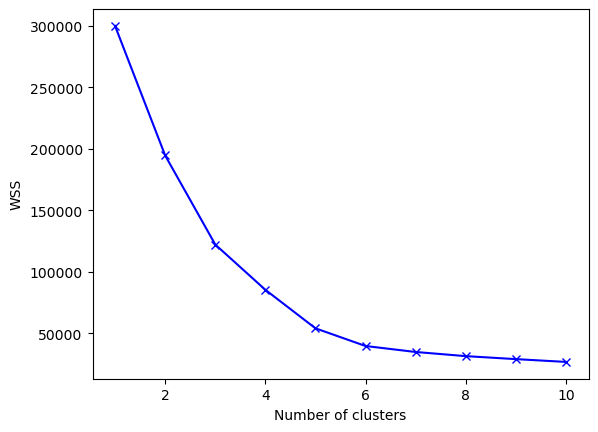

In [63]:
plt.plot(a, wss, 'bx-')
plt.xlabel("Number of clusters")
plt.ylabel("WSS");

**By referring the above Elbow plot, we can note that there is a significant fall up to 5 clusters so we can go ahead with k-means with k=5 i.e., with 5 clusters.**

In [64]:
# k-means with k=5
k_means = KMeans(n_clusters = 5,random_state=12)
k_means.fit(df_num_scaled)
labels = k_means.labels_
labels

array([4, 4, 4, ..., 0, 2, 0])

In [65]:
df_new.head(2)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.3096,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.3509,0.0,0.0


In [66]:
df_new["Clus_kmeans"] = labels
df_new.head(3)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clus_kmeans
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.3096,0.0,0.0,4
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.3509,0.0,0.0,4
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.2817,0.0,0.0,4


## 1.7) Ans:

### silhouette scores for up to 10 clusters and identify optimum number of clusters

In [67]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [68]:
# k-means with k=2
k_means = KMeans(n_clusters = 2,random_state=12)
k_means.fit(df_num_scaled)
labels = k_means.labels_
labels

array([1, 1, 1, ..., 1, 1, 1])

In [69]:
silhouette_score(df_num_scaled,labels,random_state=12)

0.43760422925328984

In [70]:
# k-means with k=3
k_means = KMeans(n_clusters = 3,random_state=12)
k_means.fit(df_num_scaled)
labels = k_means.labels_
labels

array([0, 0, 0, ..., 1, 1, 1])

In [71]:
silhouette_score(df_num_scaled,labels,random_state=12)

0.4232545214923786

In [72]:
# k-means with k=4
k_means = KMeans(n_clusters = 4,random_state=12)
k_means.fit(df_num_scaled)
labels = k_means.labels_
labels

array([0, 0, 0, ..., 3, 1, 3])

In [73]:
silhouette_score(df_num_scaled,labels,random_state=12)

0.5038762453845395

In [74]:
# k-means with k=5
k_means = KMeans(n_clusters = 5,random_state=12)
k_means.fit(df_num_scaled)
labels = k_means.labels_
labels

array([4, 4, 4, ..., 0, 2, 0])

In [75]:
silhouette_score(df_num_scaled,labels,random_state=12)

0.5666536596342587

In [76]:
# k-means with k=6
k_means = KMeans(n_clusters = 6,random_state=12)
k_means.fit(df_num_scaled)
labels = k_means.labels_
labels

array([2, 2, 2, ..., 3, 0, 3])

In [77]:
silhouette_score(df_num_scaled,labels,random_state=12)

0.5528663514784663

In [78]:
# k-means with k=7
k_means = KMeans(n_clusters = 7,random_state=12)
k_means.fit(df_num_scaled)
labels = k_means.labels_
labels

array([5, 5, 5, ..., 0, 2, 0])

In [79]:
silhouette_score(df_num_scaled,labels,random_state=12)

0.5426335798028674

In [80]:
# k-means with k=8
k_means = KMeans(n_clusters = 8,random_state=12)
k_means.fit(df_num_scaled)
labels = k_means.labels_
labels

array([0, 0, 0, ..., 3, 7, 3])

In [81]:
silhouette_score(df_num_scaled,labels,random_state=12)

0.4652463533055085

In [82]:
# k-means with k=9
k_means = KMeans(n_clusters = 9,random_state=12)
k_means.fit(df_num_scaled)
labels = k_means.labels_
labels

array([4, 4, 4, ..., 2, 0, 2])

In [83]:
silhouette_score(df_num_scaled,labels,random_state=12)

0.41950508465940667

In [84]:
# k-means with k=10
k_means = KMeans(n_clusters = 10,random_state=12)
k_means.fit(df_num_scaled)
labels = k_means.labels_
labels

array([1, 1, 1, ..., 6, 9, 6])

In [85]:
silhouette_score(df_num_scaled,labels,random_state=12)

0.4291171371485804

In [86]:
# all silhouette_scores upto to 10 clusters

In [87]:
sil_score =[] 

for i in range(2,11):
    clusters=KMeans(n_clusters=i, random_state=12)
    clusters.fit(df_num_scaled)
    labels = clusters.labels_
    ss = silhouette_score(df_num_scaled, labels,metric='euclidean')
    sil_score.append(ss)
    
sil_score

[0.43760422925328984,
 0.4232545214923786,
 0.5038762453845395,
 0.5666536596342587,
 0.5528663514784663,
 0.5426335798028674,
 0.4652463533055085,
 0.41950508465940667,
 0.4291171371485804]

**By referring to the above silhouette scores, 0.56 is the highest so the optimum number of clusters is 5. The clusters are well separated between each other.**

In [88]:
# k-means with k=5
k_means = KMeans(n_clusters = 5,random_state=12)
k_means.fit(df_num_scaled)
labels = k_means.labels_
labels


sil_width = silhouette_samples(df_num_scaled,labels)

In [89]:
df_new["sil_width"] = sil_width
df_new.head(3)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,...,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clus_kmeans,sil_width
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,...,323,1,0.0,0.35,0.0,0.3096,0.0,0.0,4,0.152279
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,...,285,1,0.0,0.35,0.0,0.3509,0.0,0.0,4,0.151552
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,...,355,1,0.0,0.35,0.0,0.2817,0.0,0.0,4,0.152784


In [90]:
df_new.sil_width.min()

-0.031642977846143075

In [91]:
df_new[df_new['sil_width'] < 0 ].shape

(33, 21)

## 1.8) Ans:

In [92]:
# k-means with k=5
k_means = KMeans(n_clusters = 5,random_state=12)
k_means.fit(df_num_scaled)
labels = k_means.labels_
labels

array([4, 4, 4, ..., 0, 2, 0])

In [93]:
df_ss["Clus_kmeans"] = labels
df_ss_num["Clus_kmeans"] = labels

In [94]:
df_ss.head(2)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Clus_kmeans
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.3096,0.0,0.0,4
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.3509,0.0,0.0,4


In [95]:
ss_data=df_ss_num.groupby('Clus_kmeans').mean()
ss_data['Freq']=df_ss_num.Clus_kmeans.value_counts().sort_index()
ss_data

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Freq
Clus_kmeans,,,,,,,,,,,,,,
0,715.911381,302.693563,215580.223881,2.459156e+05,1.345704e+05,1.142309e+05,14155.494636,1224.031686,0.349534,797.197108,13.965651,12.135436,0.089470,4288
1,676.088773,119.941253,70330.417755,1.789655e+07,9.540973e+06,9.188098e+06,17447.225849,15335.519347,0.239693,11730.937174,0.188227,1.697608,0.912393,1532
2,152.969019,558.082329,77697.074010,4.846454e+04,2.945556e+04,2.193073e+04,3019.647590,321.751120,0.349730,210.073525,15.864954,14.614030,0.101758,6972
3,142.361016,571.173644,75730.954015,8.363423e+05,5.861684e+05,4.945284e+05,67578.823610,7180.472745,0.286040,5163.174150,13.767503,15.157655,0.110092,1457
4,397.488488,180.226835,61891.241919,2.956683e+06,1.544690e+06,1.496821e+06,4464.951231,2379.853355,0.341257,1588.663940,0.356235,1.709256,0.580074,8817


- Cluster 0: Tier 4 ads (second lowest revenue)
- Cluster 1: Tier 1 ads (highest revenue)
- Cluster 2: Tier 5 ads (Lowest revenue)
- Cluster 3: Tier 2 ads (second highest revenue)
- Cluster 4: Tier 3 ads (medium revenue)

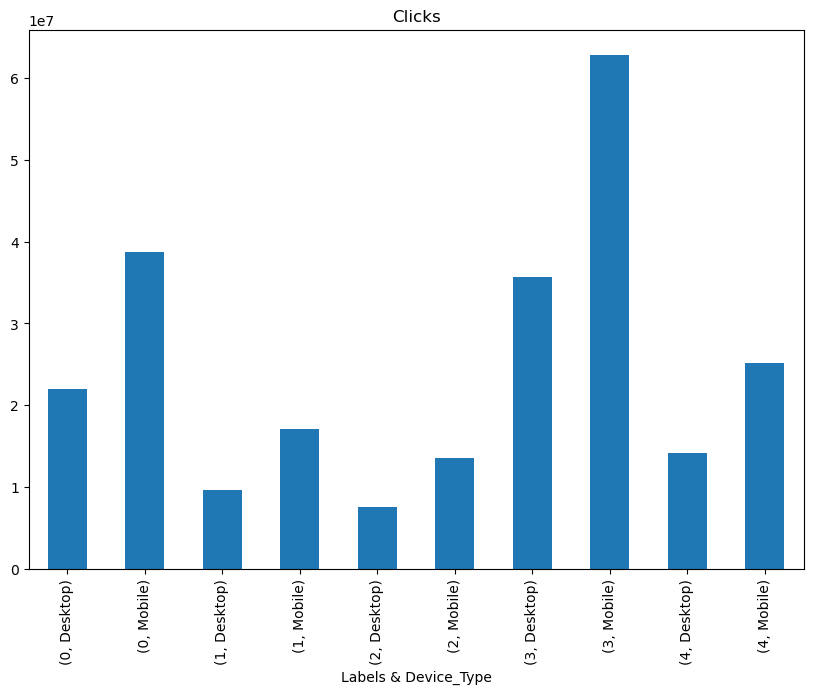

In [96]:
df_ss.groupby(['Clus_kmeans', 'Device Type']).sum()['Clicks'].plot(kind='bar', figsize=(10,7), xlabel='Labels & Device_Type', title='Clicks');

In [97]:
df_ss.groupby(['Clus_kmeans', 'Device Type']).sum()['Clicks'].sort_values(ascending=False)

Clus_kmeans  Device Type
3            Mobile         62787244
0            Mobile         38741835
3            Desktop        35675102
4            Mobile         25188564
0            Desktop        21956926
1            Mobile         17044295
4            Desktop        14178911
2            Mobile         13483105
1            Desktop         9684855
2            Desktop         7569878
Name: Clicks, dtype: int64

**Observations:**
- Cluster 3 has the maximum users who clicked on advertisement via Mobile and Desktop, of which clicks on mobile ads are the most.
- Cluster 2 has the least users who clicked on advertisement via both Desktop and mobile, of which clicks on desktop ads are the least. 
- Users in cluster 0 has clicked on advertisement more when compared with Cluster 1, 2 and 4. 

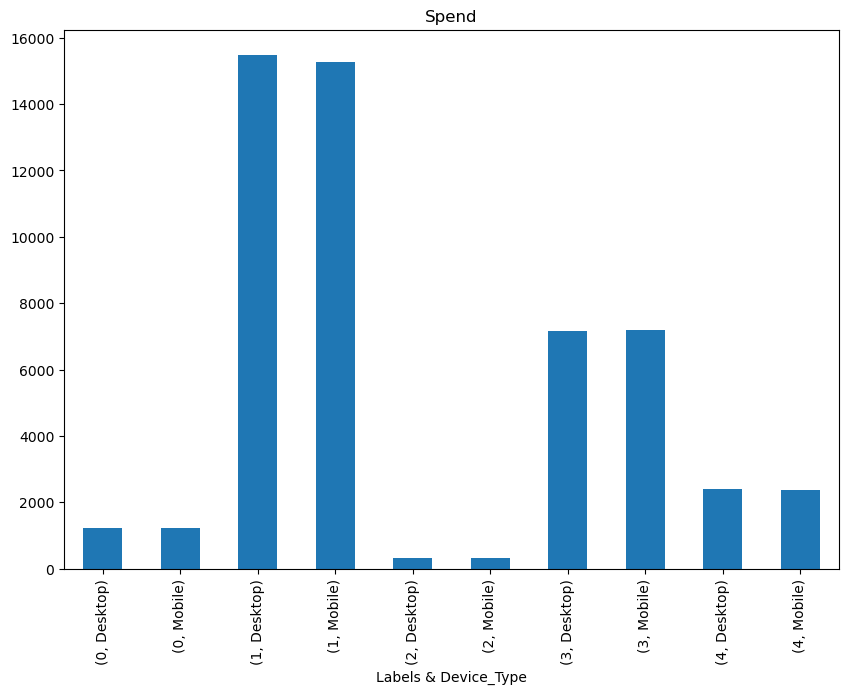

In [98]:
df_ss.groupby(['Clus_kmeans', 'Device Type']).mean()['Spend'].plot(kind='bar', figsize=(10,7), xlabel='Labels & Device_Type', title='Spend');

In [99]:
df_ss.groupby(['Clus_kmeans', 'Device Type']).mean()['Spend'].sort_values(ascending=False)

Clus_kmeans  Device Type
1            Desktop        15465.998571
             Mobile         15263.266146
3            Mobile          7194.976045
             Desktop         7155.030284
4            Desktop         2391.412418
             Mobile          2373.412372
0            Mobile          1225.052245
             Desktop         1222.201329
2            Mobile           322.881450
             Desktop          319.722870
Name: Spend, dtype: float64

**Observations:**




- Mean amount spent on advertisements for Cluster 1 on both Desktop and Mobile device is the highest.
- The least amount spent on advertisements on both the devices is for Cluster 2.
- Amount spent on advertisements for Cluster 3 is more than Cluster 0, 2 and 4.

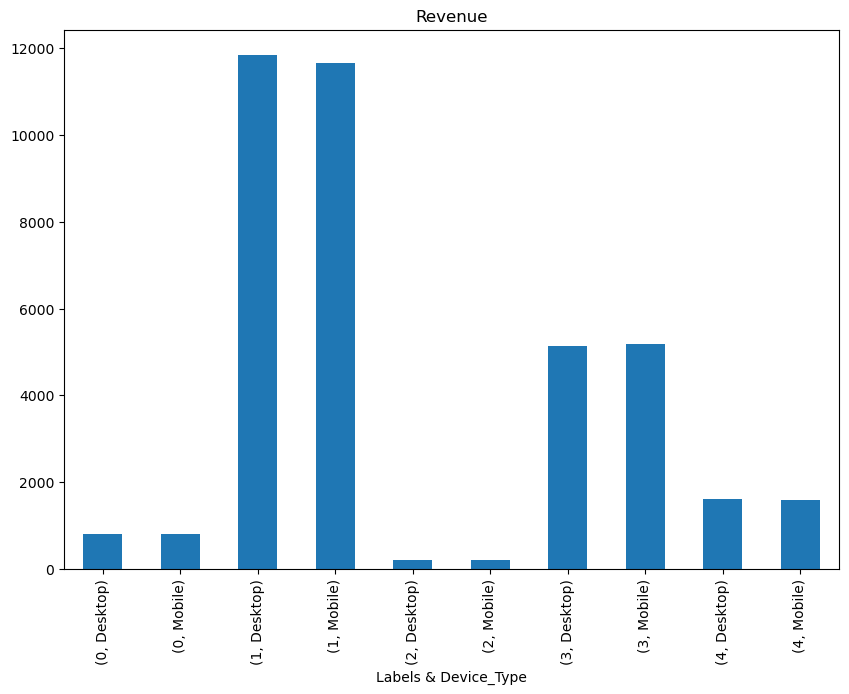

In [100]:
df_ss.groupby(['Clus_kmeans', 'Device Type']).mean()['Revenue'].plot(kind='bar', figsize=(10,7), xlabel='Labels & Device_Type', title='Revenue');

In [101]:
df_ss.groupby(['Clus_kmeans', 'Device Type']).mean()['Revenue'].sort_values(ascending=False)

Clus_kmeans  Device Type
1            Desktop        11837.173771
             Mobile         11672.108389
3            Mobile          5175.004350
             Desktop         5142.420983
4            Desktop         1596.703040
             Mobile          1584.184364
0            Mobile           797.917647
             Desktop          795.904831
2            Mobile           210.804065
             Desktop          208.762652
Name: Revenue, dtype: float64

**Observations:**
- Average revenue received from Cluster 1 on advertisements is the highest when compared with the other clusters.
- Average revenue received from Cluster 2 on advertisements via desktop and mobile devices is the least.
- Mean revenue received on advertisements from Desktop device of Cluster 1 is slightly higher when compared with the revenue from the Mobile device.

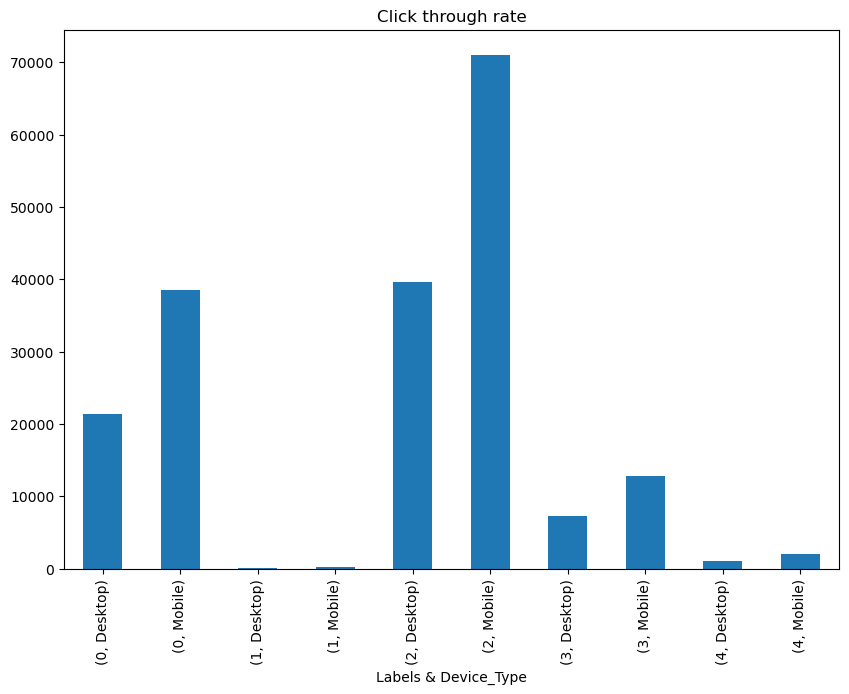

In [102]:
df_ss.groupby(['Clus_kmeans', 'Device Type']).sum()['CTR'].plot(kind='bar', figsize=(10,7), xlabel='Labels & Device_Type', title='Click through rate');

In [103]:
df_ss.groupby(['Clus_kmeans', 'Device Type']).sum()['CTR'].sort_values(ascending=False)

Clus_kmeans  Device Type
2            Mobile         70958.0066
             Desktop        39652.4527
0            Mobile         38513.7791
             Desktop        21370.9318
3            Mobile         12754.8343
             Desktop         7304.4171
4            Mobile          2010.6588
             Desktop         1130.2658
1            Mobile           185.2145
             Desktop          103.1486
Name: CTR, dtype: float64

**Observations:**
- Cluster 2 has the highest CTR among other clusters, of which CTR via mobile device is highest when compared with desktop device.
- Cluster 1 has the least CTR among all clusters on both devices type.
- Of all clusters, we can note that mobile device has more CTR rate than desktop ads.

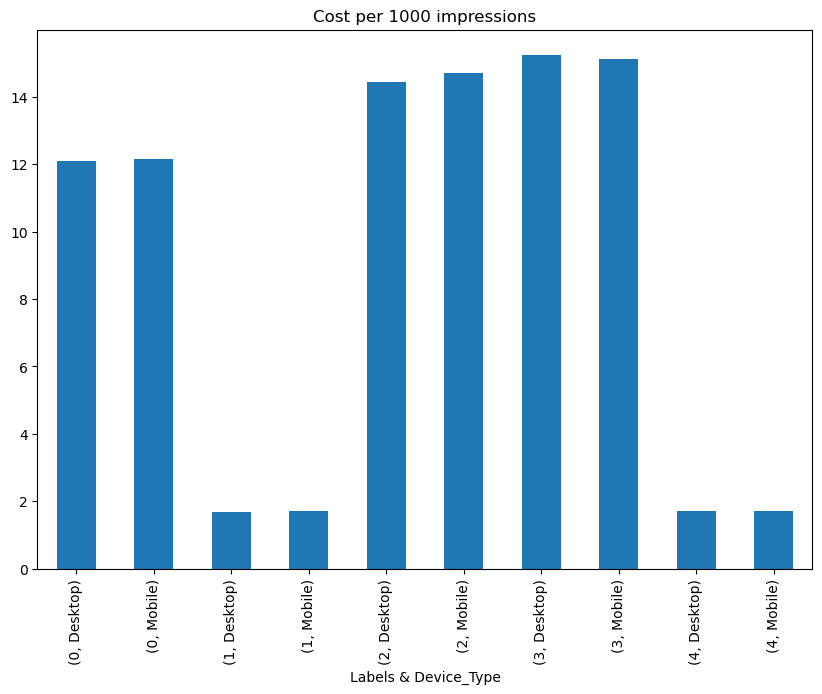

In [104]:
df_ss.groupby(['Clus_kmeans', 'Device Type']).mean()['CPM'].plot(kind='bar', figsize=(10,7), xlabel='Labels & Device_Type', title='Cost per 1000 impressions');

In [105]:
df_ss.groupby(['Clus_kmeans', 'Device Type']).mean()['CPM'].sort_values(ascending=False)

Clus_kmeans  Device Type
3            Desktop        15.227748
             Mobile         15.117698
2            Mobile         14.707344
             Desktop        14.446587
0            Mobile         12.155017
             Desktop        12.100319
4            Desktop         1.712026
1            Mobile          1.709405
4            Mobile          1.707713
1            Desktop         1.676305
Name: CPM, dtype: float64

**Observations:**
- Cluster 3 has the highest CPM among other clusters. Desktop ads CPM is slightly higher than that of mobile users.
- Average CPM of desktop ads of Cluster 1 is the least among all.
- Among mobile ads, mean CPM is least in Cluster 4.

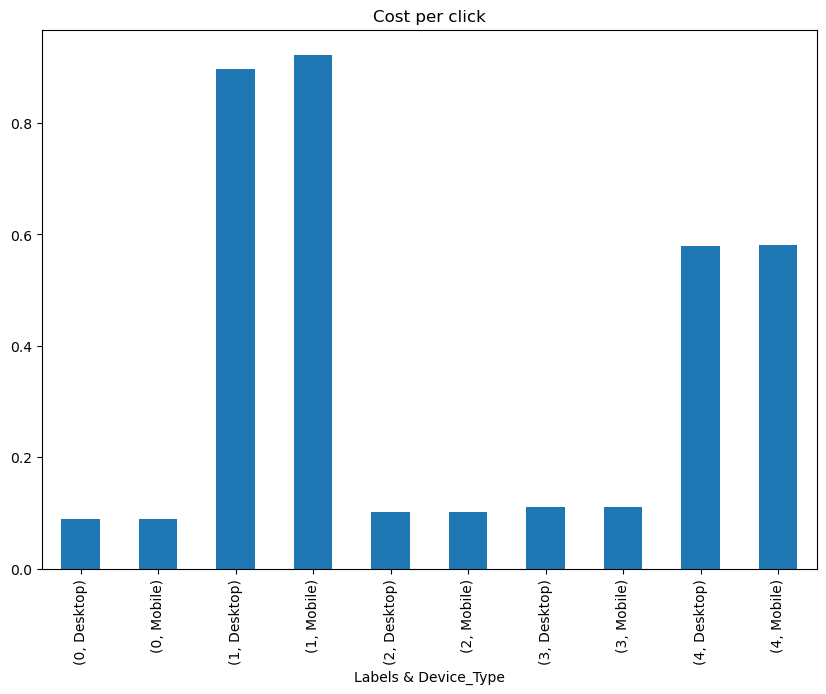

In [106]:
df_ss.groupby(['Clus_kmeans', 'Device Type']).mean()['CPC'].plot(kind='bar', figsize=(10,7), xlabel='Labels & Device_Type', title='Cost per click');

In [107]:
df_ss.groupby(['Clus_kmeans', 'Device Type']).mean()['CPC'].sort_values(ascending=False)

Clus_kmeans  Device Type
1            Mobile         0.921240
             Desktop        0.896416
4            Mobile         0.580990
             Desktop        0.578429
3            Desktop        0.110278
             Mobile         0.109987
2            Mobile         0.101821
             Desktop        0.101644
0            Mobile         0.089881
             Desktop        0.088733
Name: CPC, dtype: float64

**Observations:**
- Average CPC is highest in Cluster 1 among other clusters, of which CPC of mobile ads are slightly higher than that of Desktop ads.
- Average CPC in Cluster 0 is the least.
- Of all clusters, Mobile ads has highest CPC than desktop ads except in cluster 3.

## 1.9) Ans:

Please refer Business report

# Part 2

## 2.1) Ans:  

### checking basic info

In [108]:
df_pca = pd.read_excel("PCA+India+Data_Census.xlsx")
df_pca.head(5)

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [109]:
df_pca.tail(5)

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,...,32,47,0,0,0,0,0,0,32,47
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,...,155,337,3,14,38,130,4,23,110,170
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,...,104,134,9,4,2,6,17,47,76,77
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,...,136,172,24,44,11,21,1,4,100,103
639,35,640,Andaman & Nicobar Island,South Andaman,7975,11977,18049,1470,1358,0,...,173,122,6,2,17,17,2,4,148,99


In [110]:
df_pca.shape
print('There are', df_pca.shape[0],'rows and', df_pca.shape[1],'columns.')

There are 640 rows and 61 columns.


In [111]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

**Observations:**
- There are 640 rows and 61 columns.
- There are 59 int64 and 2 object datatypes.

In [112]:
df_pca.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

In [113]:
df_pca.isnull().sum()[df_pca.isnull().sum()>0] 

Series([], dtype: int64)

**There are no null values**

In [114]:
df_pca.duplicated().sum()

0

**There are no duplicate values**

In [115]:
df_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.114062,9.426486,1.0,9.00,18.0,24.00,35.0
Dist.Code,640.0,320.500000,184.896367,1.0,160.75,320.5,480.25,640.0
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.098438,11500.906881,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.300000,11326.294567,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.946875,14426.373130,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.392188,21727.887713,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.807813,9912.668948,0.0,293.75,2333.5,7658.00,96785.0


In [116]:
df_pca.describe(include='object').T

,count,unique,top,freq
State,640,35,Uttar Pradesh,71
Area Name,640,635,Raigarh,2


In [117]:
df_pca.State.value_counts()

Uttar Pradesh               71
Madhya Pradesh              50
Bihar                       38
Maharashtra                 35
Rajasthan                   33
Tamil Nadu                  32
Karnataka                   30
Odisha                      30
Assam                       27
Gujarat                     26
Jharkhand                   24
Andhra Pradesh              23
Jammu & Kashmir             22
Haryana                     21
Punjab                      20
West Bengal                 19
Chhattisgarh                18
Arunachal Pradesh           16
Kerala                      14
Uttarakhand                 13
Himachal Pradesh            12
Nagaland                    11
Manipur                      9
NCT of Delhi                 9
Mizoram                      8
Meghalaya                    7
Tripura                      4
Sikkim                       4
Puducherry                   4
Andaman & Nicobar Island     3
Goa                          2
Daman & Diu                  2
Lakshadw

## 2.2):  

### 2.2.i) Ans:

In [118]:
df_pca.columns

Index(['State Code', 'Dist.Code', 'State', 'Area Name', 'No_HH', 'TOT_M',
       'TOT_F', 'M_06', 'F_06', 'M_SC', 'F_SC', 'M_ST', 'F_ST', 'M_LIT',
       'F_LIT', 'M_ILL', 'F_ILL', 'TOT_WORK_M', 'TOT_WORK_F', 'MAINWORK_M',
       'MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M', 'MAIN_AL_F',
       'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F', 'MARGWORK_M',
       'MARGWORK_F', 'MARG_CL_M', 'MARG_CL_F', 'MARG_AL_M', 'MARG_AL_F',
       'MARG_HH_M', 'MARG_HH_F', 'MARG_OT_M', 'MARG_OT_F', 'MARGWORK_3_6_M',
       'MARGWORK_3_6_F', 'MARG_CL_3_6_M', 'MARG_CL_3_6_F', 'MARG_AL_3_6_M',
       'MARG_AL_3_6_F', 'MARG_HH_3_6_M', 'MARG_HH_3_6_F', 'MARG_OT_3_6_M',
       'MARG_OT_3_6_F', 'MARGWORK_0_3_M', 'MARGWORK_0_3_F', 'MARG_CL_0_3_M',
       'MARG_CL_0_3_F', 'MARG_AL_0_3_M', 'MARG_AL_0_3_F', 'MARG_HH_0_3_M',
       'MARG_HH_0_3_F', 'MARG_OT_0_3_M', 'MARG_OT_0_3_F', 'NON_WORK_M',
       'NON_WORK_F'],
      dtype='object')

In [119]:
df_pca_gr = df_pca.copy()

In [120]:
df_pca_gr ['Gender_ratio'] = df_pca_gr['TOT_M'] / df_pca_gr['TOT_F']
df_pca_gr.head(3)

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F,Gender_ratio
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,749,180,237,680,252,32,46,258,214,0.784938
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,715,123,229,186,148,76,178,140,160,0.847762
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,188,44,89,3,34,0,4,67,61,0.597045


In [121]:
df_pca_gr.groupby(['State']).mean()['Gender_ratio'].sort_values(ascending=False)

State
Lakshadweep                 0.868061
Haryana                     0.777742
NCT of Delhi                0.766436
Uttar Pradesh               0.762436
Punjab                      0.747843
Bihar                       0.746294
Meghalaya                   0.736105
Jammu & Kashmir             0.728013
Daman & Diu                 0.702191
Chandigarh                  0.700037
Rajasthan                   0.687548
Assam                       0.685665
Jharkhand                   0.677664
Gujarat                     0.662355
Sikkim                      0.657083
West Bengal                 0.649317
Dadara & Nagar Havelli      0.644631
Manipur                     0.641547
Karnataka                   0.636473
Madhya Pradesh              0.635514
Andaman & Nicobar Island    0.633861
Mizoram                     0.633117
Himachal Pradesh            0.628779
Tripura                     0.622312
Goa                         0.620158
Uttarakhand                 0.618892
Puducherry                  0.60

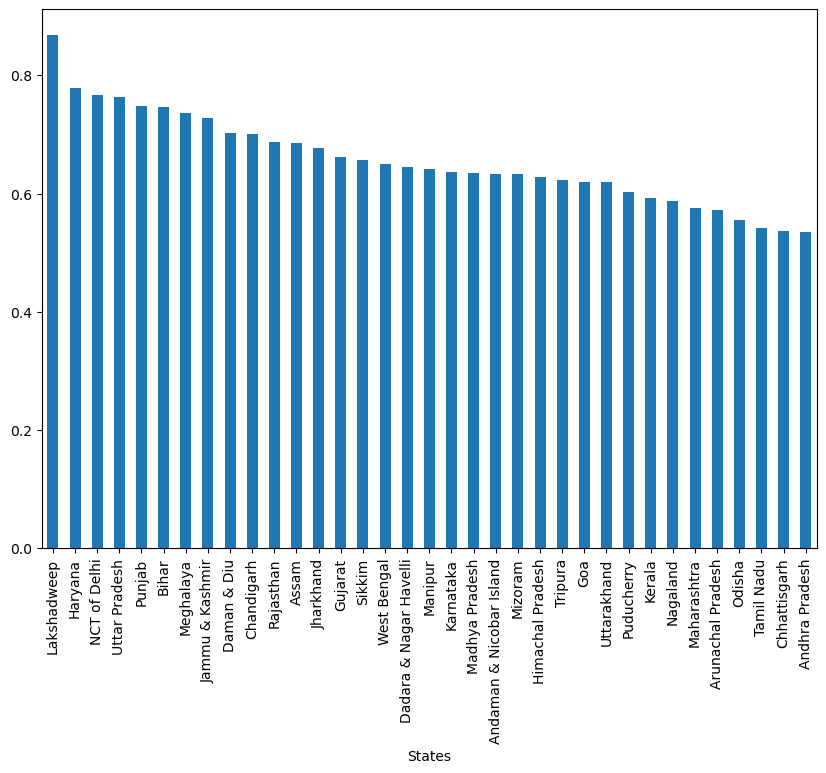

In [122]:
df_pca_gr.groupby(['State']).mean()['Gender_ratio'].sort_values(ascending=False).plot(kind='bar', figsize=(10,7), xlabel='States');

**Observation**

**Lakshadweep state has the highest gender ratio at 0.87**

**Andhra Pradesh state has the lowest gender ratio at 0.53**

### 2.2.ii) Ans:

In [123]:
df_pca_gr.groupby(['State', 'Area Name']).mean()['Gender_ratio'].sort_values(ascending=False)

State            Area Name     
Lakshadweep      Lakshadweep       0.868061
Jammu & Kashmir  Badgam            0.847762
Uttar Pradesh    Mahamaya Nagar    0.847313
Rajasthan        Dhaulpur          0.846911
Uttar Pradesh    Baghpat           0.844003
                                     ...   
Odisha           Baudh             0.451455
Andhra Pradesh   West Godavari     0.450076
Tamil Nadu       Virudhunagar      0.449352
Odisha           Koraput           0.440769
Andhra Pradesh   Krishna           0.437972
Name: Gender_ratio, Length: 640, dtype: float64

**Observation**

**Lakshadweep district of Lakshadweep state has the highest gender ratio at 0.87**

**Krishna district of Andhra Pradesh state has the lowest gender ratio at 0.44**

## EDA

In [124]:
df_pca_eda_m = df_pca.drop(columns=['State Code', 'Dist.Code','M_06', 'F_06', 'M_SC', 'F_SC', 'M_ST', 'F_ST', 'M_ILL', 'F_ILL', 'TOT_WORK_M', 'TOT_WORK_F', 'MAINWORK_M',
       'MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M', 'MAIN_AL_F',
       'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F', 'MARGWORK_M',
       'MARGWORK_F', 'MARG_CL_M', 'MARG_CL_F', 'MARG_AL_M', 'MARG_AL_F',
       'MARG_HH_M', 'MARG_HH_F', 'MARG_OT_M', 'MARG_OT_F', 'MARGWORK_3_6_M',
       'MARGWORK_3_6_F', 'MARG_CL_3_6_M', 'MARG_CL_3_6_F', 'MARG_AL_3_6_M',
       'MARG_AL_3_6_F', 'MARG_HH_3_6_M', 'MARG_HH_3_6_F', 'MARG_OT_3_6_M',
       'MARG_OT_3_6_F', 'MARGWORK_0_3_M', 'MARGWORK_0_3_F', 'MARG_CL_0_3_M',
       'MARG_CL_0_3_F', 'MARG_AL_0_3_M', 'MARG_AL_0_3_F', 'MARG_HH_0_3_M',
       'MARG_HH_0_3_F', 'MARG_OT_0_3_M', 'MARG_OT_0_3_F', 'NON_WORK_M',
       'NON_WORK_F'])
df_pca_eda_m.head(2)

,State,Area Name,No_HH,TOT_M,TOT_F,M_LIT,F_LIT
0,Jammu & Kashmir,Kupwara,7707,23388,29796,13381,11364
1,Jammu & Kashmir,Badgam,6218,19585,23102,10513,7891


In [125]:
df_pca_eda = df_pca_eda_m.drop(columns=['State', 'Area Name'])

In [126]:
df_pca_eda.head(3)

,No_HH,TOT_M,TOT_F,M_LIT,F_LIT
0,7707,23388,29796,13381,11364
1,6218,19585,23102,10513,7891
2,4452,6546,10964,4534,5840


In [127]:
df_pca_eda.duplicated().sum()

0

**Univariate analysis**

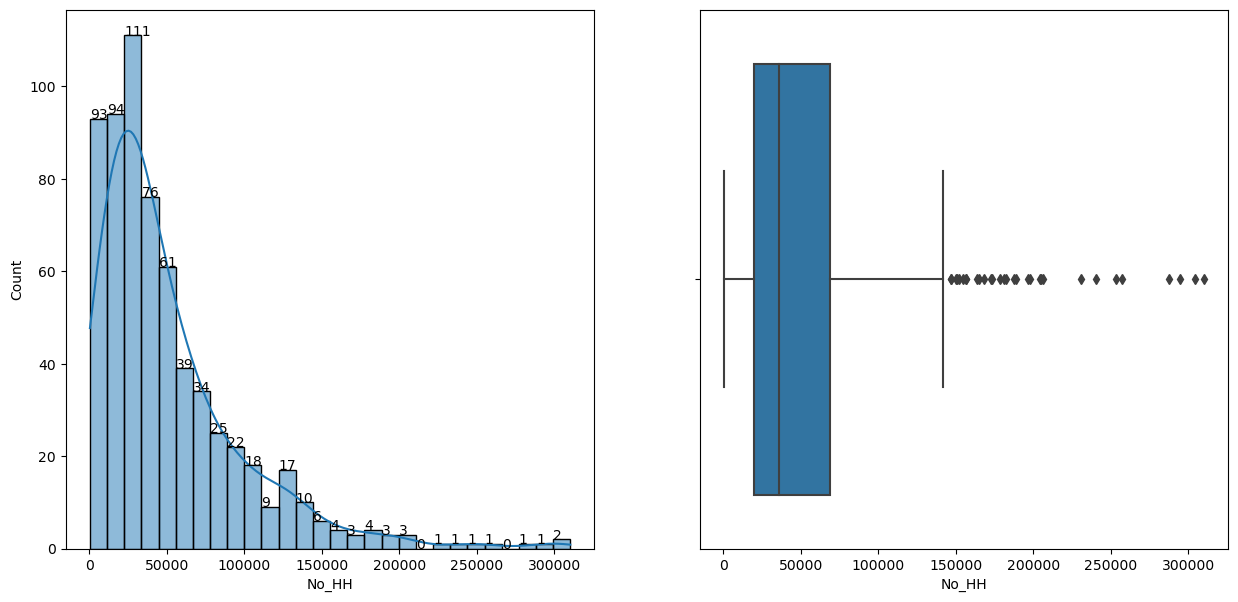

In [128]:
# Univariate analysis
# a) Number of Household
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(15,7))
ax=sns.histplot(df_pca_eda.No_HH, kde=True, ax=axs[0])

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
sns.boxplot(x='No_HH',data=df_pca_eda, ax=axs[1]);

In [129]:
df_pca_eda.No_HH.describe()

count       640.000000
mean      51222.871875
std       48135.405475
min         350.000000
25%       19484.000000
50%       35837.000000
75%       68892.000000
max      310450.000000
Name: No_HH, dtype: float64

**Observations**
- The average number of households of all states comes upto 51223.
- The number of households ranges from 350 to 310450 across states.
- About 75% of the households fall under 68892.
- Also, there are outliers in the given variable.

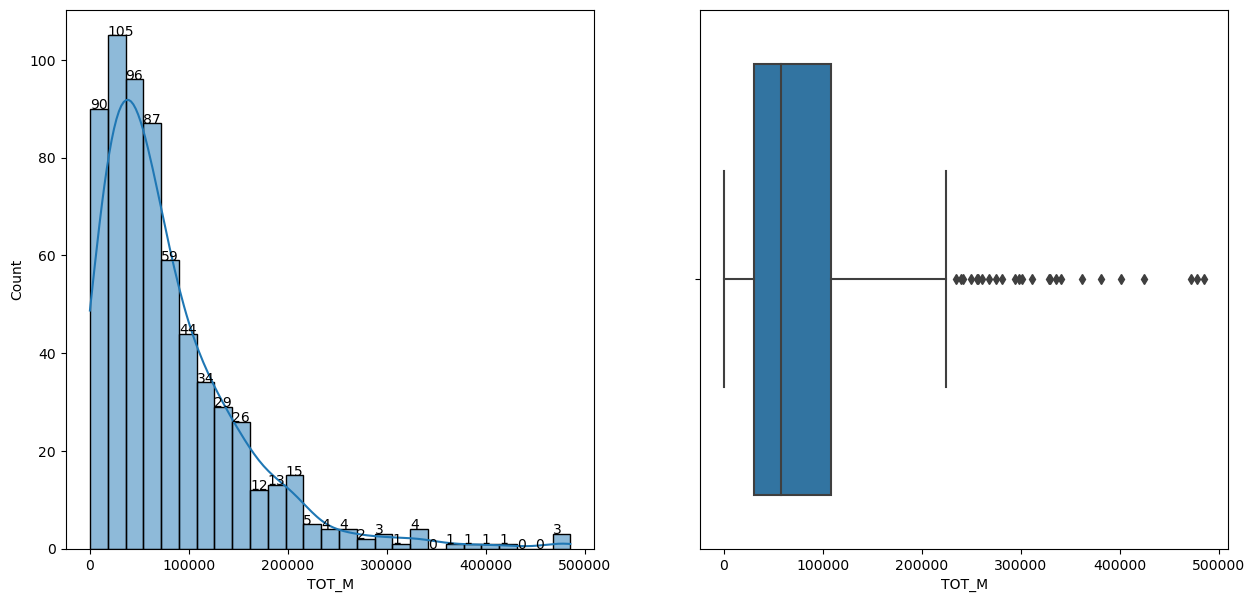

In [130]:
# b) Total male population
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(15,7))
ax=sns.histplot(df_pca_eda.TOT_M, kde=True, ax=axs[0])

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
sns.boxplot(x='TOT_M',data=df_pca_eda, ax=axs[1]);

In [131]:
df_pca_eda.TOT_M.describe()

count       640.000000
mean      79940.576563
std       73384.511114
min         391.000000
25%       30228.000000
50%       58339.000000
75%      107918.500000
max      485417.000000
Name: TOT_M, dtype: float64

**Observations**
- The average number of total male population across states is 79941.
- Total male population ranges from 391 to 485417 across states.
- About 75% of the total male population fall under 107919.
- Also, there are outliers in the given variable.

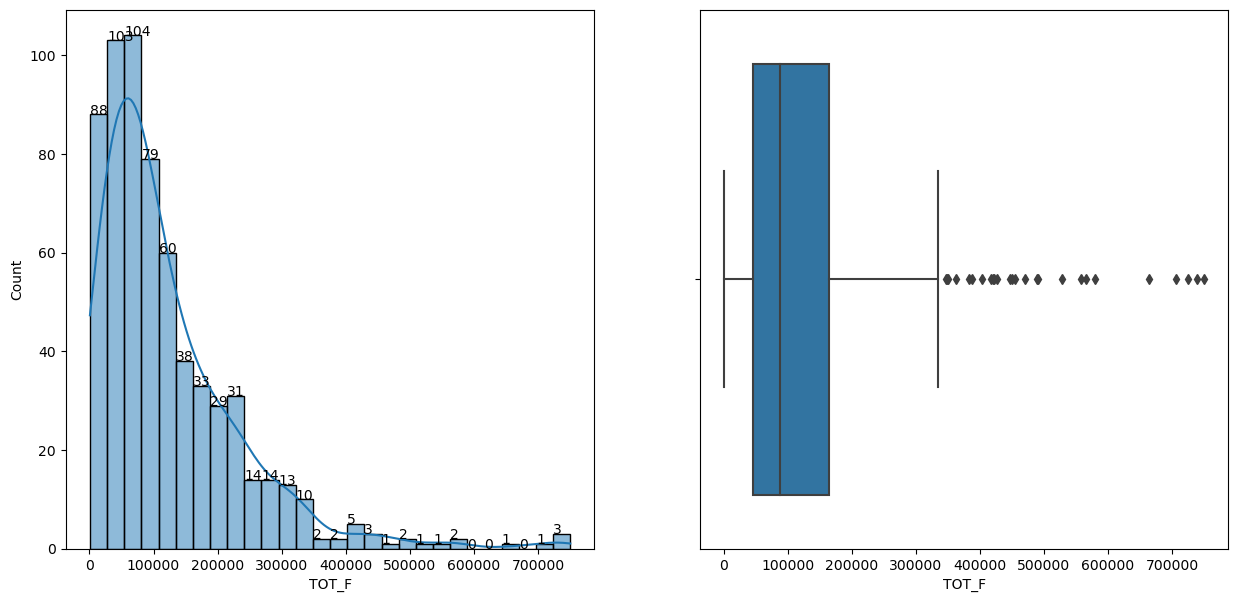

In [132]:
# c) Total female population
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(15,7))
ax=sns.histplot(df_pca_eda.TOT_F, kde=True, ax=axs[0])

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
sns.boxplot(x='TOT_F',data=df_pca_eda, ax=axs[1]);

In [133]:
df_pca_eda.TOT_F.describe()

count       640.000000
mean     122372.084375
std      113600.717282
min         698.000000
25%       46517.750000
50%       87724.500000
75%      164251.750000
max      750392.000000
Name: TOT_F, dtype: float64

**Observations**
- The average number of total female population across states is 122372.
- Total female population ranges from 698 to 750392 across states.
- About 75% of the total female population fall under 164252.
- Also, there are outliers in the given variable.

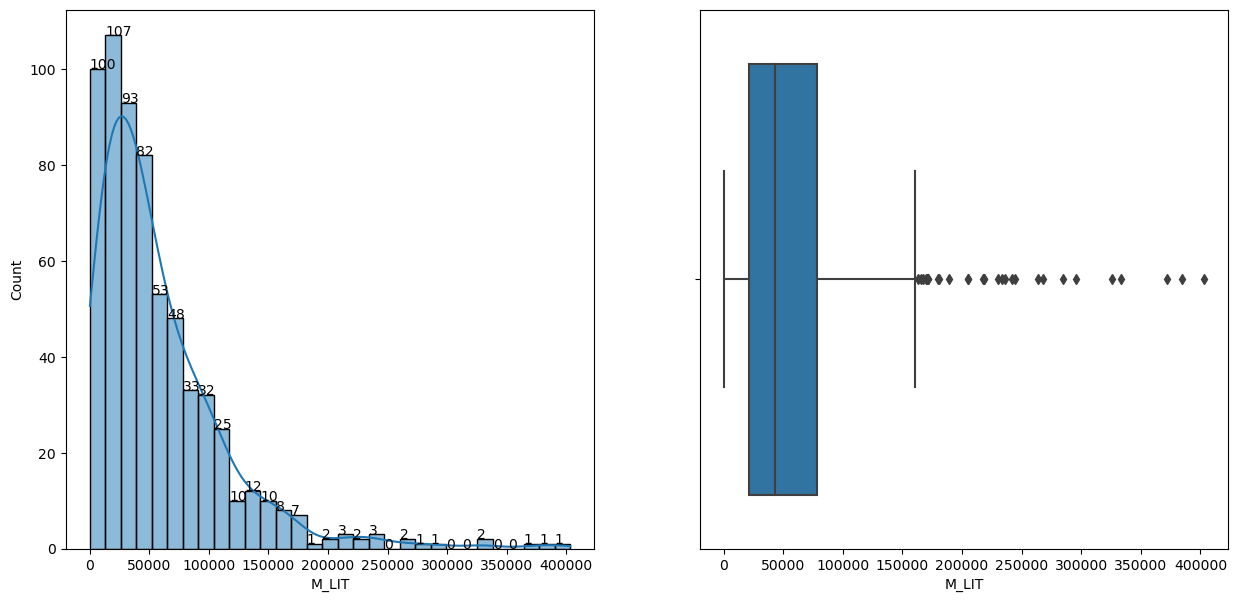

In [134]:
# d) Literates population male
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(15,7))
ax=sns.histplot(df_pca_eda.M_LIT, kde=True, ax=axs[0])

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
sns.boxplot(x='M_LIT',data=df_pca_eda, ax=axs[1]);

In [135]:
df_pca_eda.M_LIT.describe()

count       640.000000
mean      57967.979688
std       55910.282466
min         286.000000
25%       21298.000000
50%       42693.500000
75%       77989.500000
max      403261.000000
Name: M_LIT, dtype: float64

**Observations**
- The average number of male literates across states is 57968.
- Total male literates ranges from 286 to 403261 across states.
- About 75% of the male literates fall under 77990.
- Also, there are outliers in the given variable.

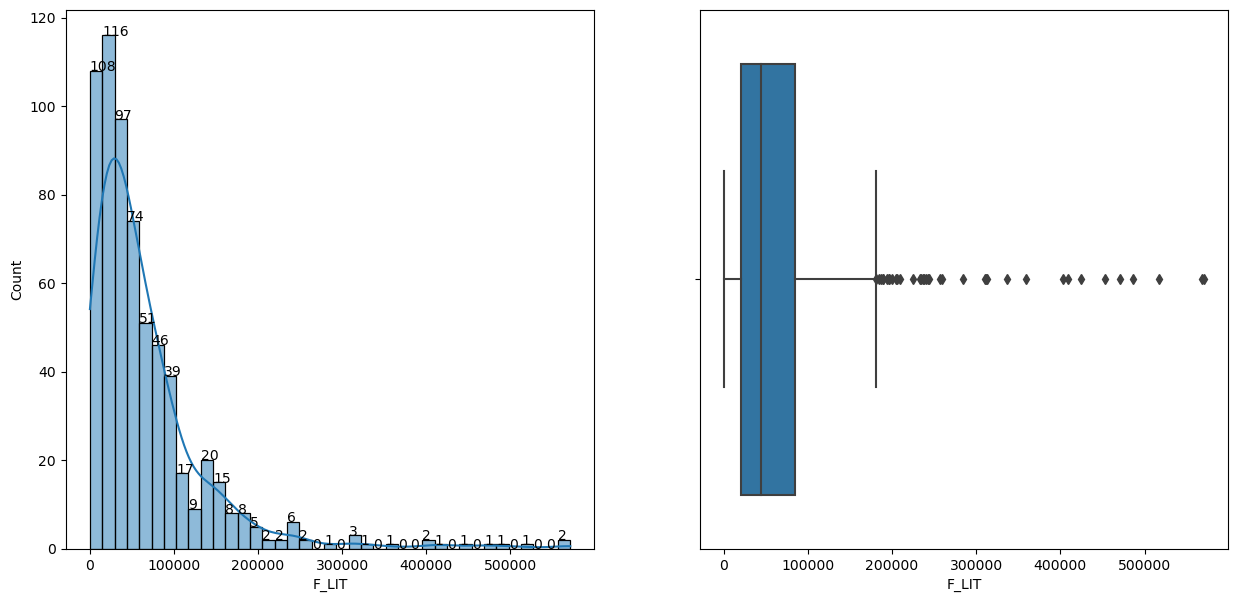

In [136]:
# e) Literates population female
fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(15,7))
ax=sns.histplot(df_pca_eda.F_LIT, kde=True, ax=axs[0])

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
sns.boxplot(x='F_LIT',data=df_pca_eda, ax=axs[1]);

In [137]:
df_pca_eda.F_LIT.describe()

count       640.000000
mean      66359.565625
std       75037.860207
min         371.000000
25%       20932.000000
50%       43796.500000
75%       84799.750000
max      571140.000000
Name: F_LIT, dtype: float64

**Observations**
- The average number of female literates across states is 66360.
- Total female literates ranges from 371 to 571140 across states.
- About 75% of the female literates fall under 84800.
- Also, there are outliers in the given variable.

**Bivariate analysis and Multivariate analysis**

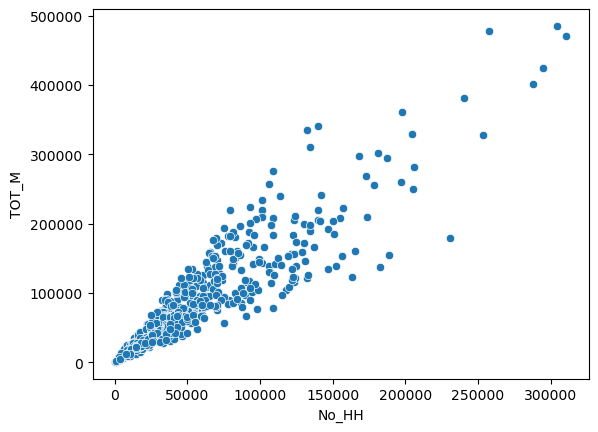

In [138]:
# a) Number of Household and Total male population:
ax=sns.scatterplot(data=df_pca_eda, x="No_HH", y='TOT_M') 
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

**Observations**
- The above scatter plot states that 'Number of Household' and 'Total male population' are positively correlated.

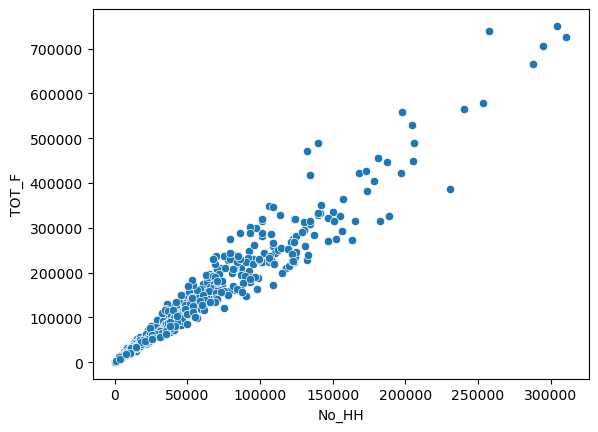

In [139]:
# b) Number of Household and Total female population:
ax=sns.scatterplot(data=df_pca_eda, x="No_HH", y='TOT_F') 
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

**Observations**
- The above scatter plot states that 'Number of Household' and 'Total female population' are positively correlated.

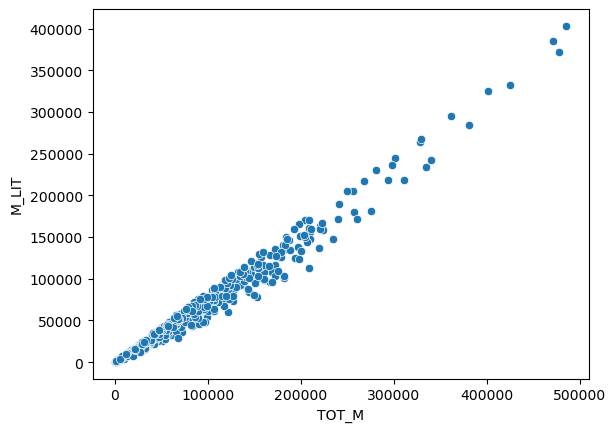

In [140]:
# c) Total male population and male literates:
ax=sns.scatterplot(data=df_pca_eda, x="TOT_M", y='M_LIT') 
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

**Observations**
- The above scatter plot states that 'Total male population' and 'male literates' are positively correlated.
- We can note that, male literates increase as the total male population increases.

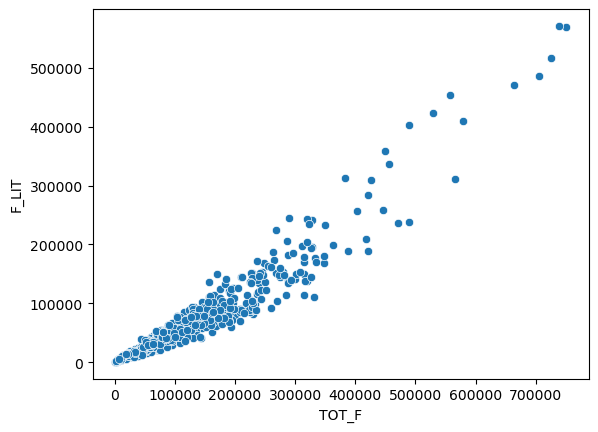

In [141]:
# d) Total female population and female literates:
ax=sns.scatterplot(data=df_pca_eda, x="TOT_F", y='F_LIT') 
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

**Observations**
- The above scatter plot states that 'Total female population' and 'female literates' are positively correlated.
- We can note that, to some extent, female literates increase as the total female population increases.

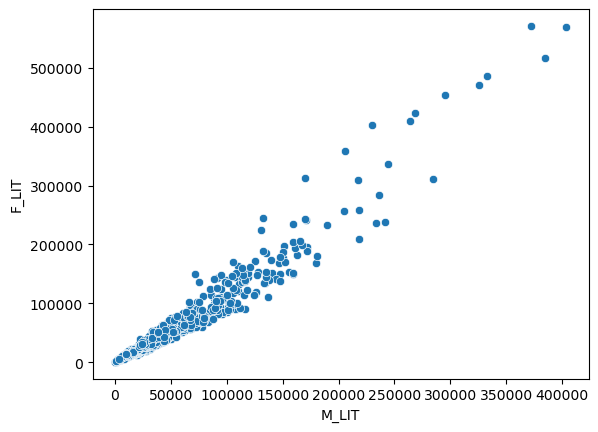

In [142]:
# e) male literates and female literates:
ax=sns.scatterplot(data=df_pca_eda, x="M_LIT", y='F_LIT') 
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

**Observations**
- The above scatter plot states that 'male literates' and 'female literates' are positively correlated.

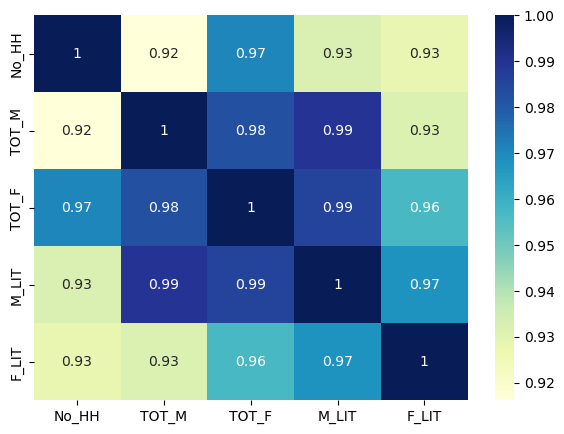

In [143]:
# f) Heatmap to check correlation between variables:
plt.figure(figsize  = (7,5))
sns.heatmap(df_pca_eda.corr(), annot = True, cmap="YlGnBu")
plt.show()

**Observations**
- All the variables are highly correlated to each other, as their values are close to 1.

In [144]:
# g) Gender literacy ratio
df_pca_eda_m ['Gender_literacy_ratio'] = df_pca_eda_m['M_LIT'] / df_pca_eda_m['F_LIT']

df_pca_eda_m.groupby(['State']).mean()['Gender_literacy_ratio'].sort_values(ascending=False)

State
Rajasthan                   1.156394
Uttar Pradesh               1.121931
Bihar                       1.120135
Haryana                     1.084954
Jammu & Kashmir             1.070158
Jharkhand                   1.056542
Dadara & Nagar Havelli      0.964393
Madhya Pradesh              0.961363
Punjab                      0.937033
Lakshadweep                 0.935327
Karnataka                   0.929349
Andhra Pradesh              0.919396
Gujarat                     0.902603
Assam                       0.898926
West Bengal                 0.884096
NCT of Delhi                0.880233
Chhattisgarh                0.876549
Daman & Diu                 0.868633
Odisha                      0.856602
Manipur                     0.831078
Sikkim                      0.813240
Himachal Pradesh            0.793936
Tamil Nadu                  0.791711
Uttarakhand                 0.787789
Arunachal Pradesh           0.779787
Chandigarh                  0.772411
Meghalaya                   0.76

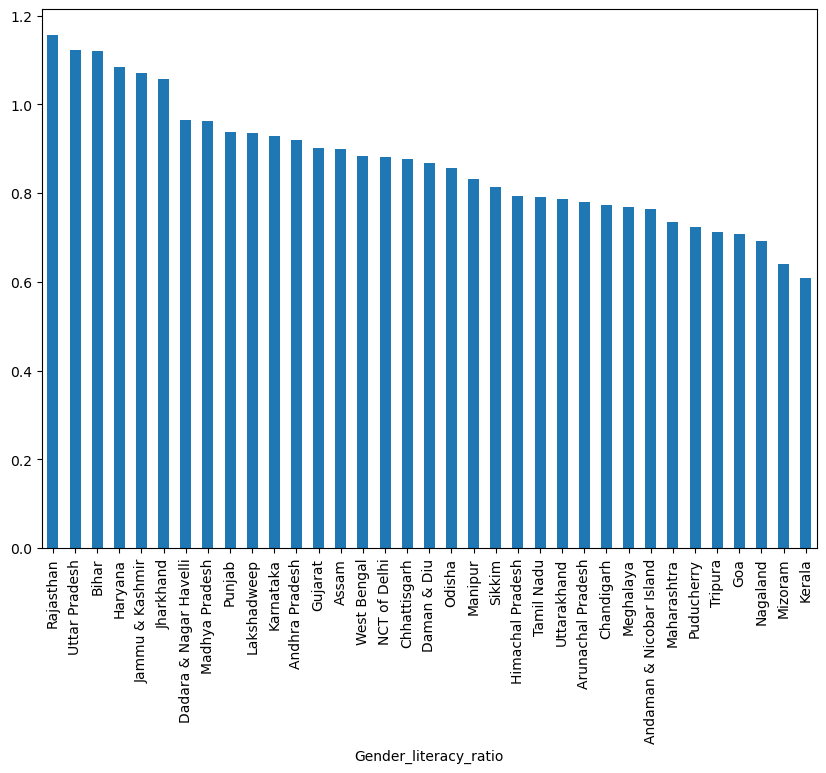

In [145]:
df_pca_eda_m.groupby(['State']).mean()['Gender_literacy_ratio'].sort_values(ascending=False).plot(kind='bar', figsize=(10,7), xlabel='Gender_literacy_ratio');

**Observation**

**Rajasthan state has the highest gender literacy ratio at 1.16**

**Kerala state has the lowest gender literacy ratio at 0.61**


In [146]:
# h) Male literacy ratio
df_pca_eda_m ['Male_literacy_ratio'] = df_pca_eda_m['M_LIT'] / df_pca_eda_m['TOT_M']

df_pca_eda_m.groupby(['State']).mean()['Male_literacy_ratio'].sort_values(ascending=False)

State
Goa                         0.833482
Daman & Diu                 0.828375
Lakshadweep                 0.826718
Puducherry                  0.824228
Kerala                      0.816831
Tripura                     0.808683
Tamil Nadu                  0.806207
Andaman & Nicobar Island    0.806004
Chandigarh                  0.803583
NCT of Delhi                0.795762
Himachal Pradesh            0.793232
Mizoram                     0.792366
Sikkim                      0.781631
Maharashtra                 0.780262
Uttarakhand                 0.754822
Gujarat                     0.748836
Haryana                     0.745162
Manipur                     0.744200
Karnataka                   0.742976
West Bengal                 0.736261
Nagaland                    0.735217
Dadara & Nagar Havelli      0.733171
Punjab                      0.732630
Odisha                      0.729386
Andhra Pradesh              0.729191
Assam                       0.709930
Chhattisgarh                0.69

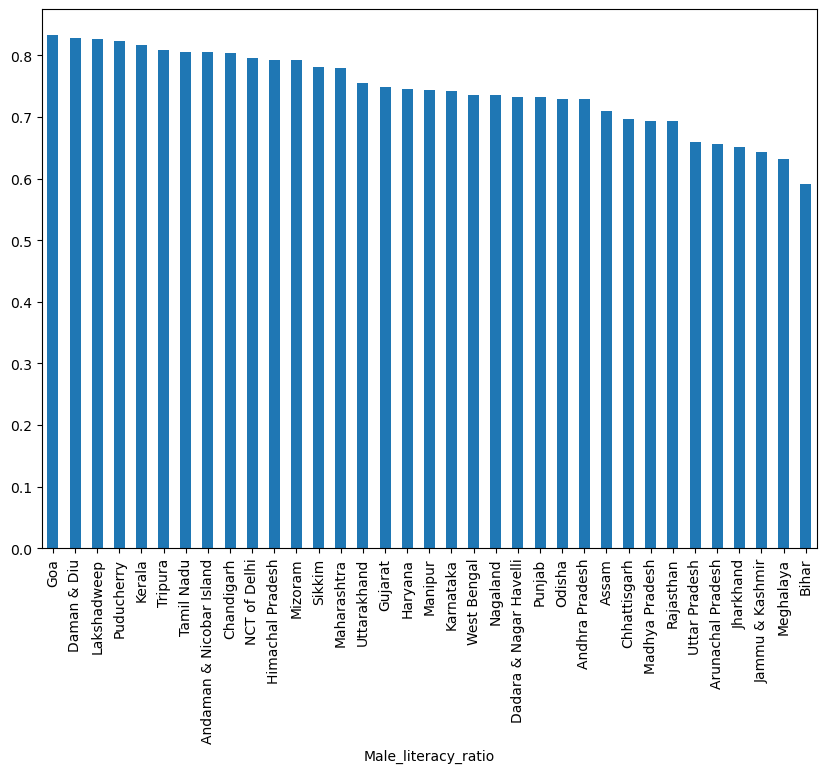

In [147]:
df_pca_eda_m.groupby(['State']).mean()['Male_literacy_ratio'].sort_values(ascending=False).plot(kind='bar', figsize=(10,7), xlabel='Male_literacy_ratio');

**Observation**

**Goa state has the highest male literacy ratio at 0.83**

**Bihar state has the lowest male literacy ratio at 0.59**

In [148]:
# i) Female literacy ratio
df_pca_eda_m ['Female_literacy_ratio'] = df_pca_eda_m['F_LIT'] / df_pca_eda_m['TOT_F']

df_pca_eda_m.groupby(['State']).mean()['Female_literacy_ratio'].sort_values(ascending=False)

State
Kerala                      0.798793
Mizoram                     0.787055
Lakshadweep                 0.767262
Goa                         0.729529
Chandigarh                  0.728288
Tripura                     0.707725
NCT of Delhi                0.693965
Puducherry                  0.690578
Daman & Diu                 0.669672
Andaman & Nicobar Island    0.669194
Sikkim                      0.634182
Himachal Pradesh            0.631158
Nagaland                    0.629037
Maharashtra                 0.613968
Meghalaya                   0.600384
Uttarakhand                 0.596435
Punjab                      0.590436
Manipur                     0.580983
Tamil Nadu                  0.558609
Gujarat                     0.555819
West Bengal                 0.551922
Assam                       0.545601
Haryana                     0.545342
Karnataka                   0.519520
Arunachal Pradesh           0.490424
Dadara & Nagar Havelli      0.490075
Odisha                      0.48

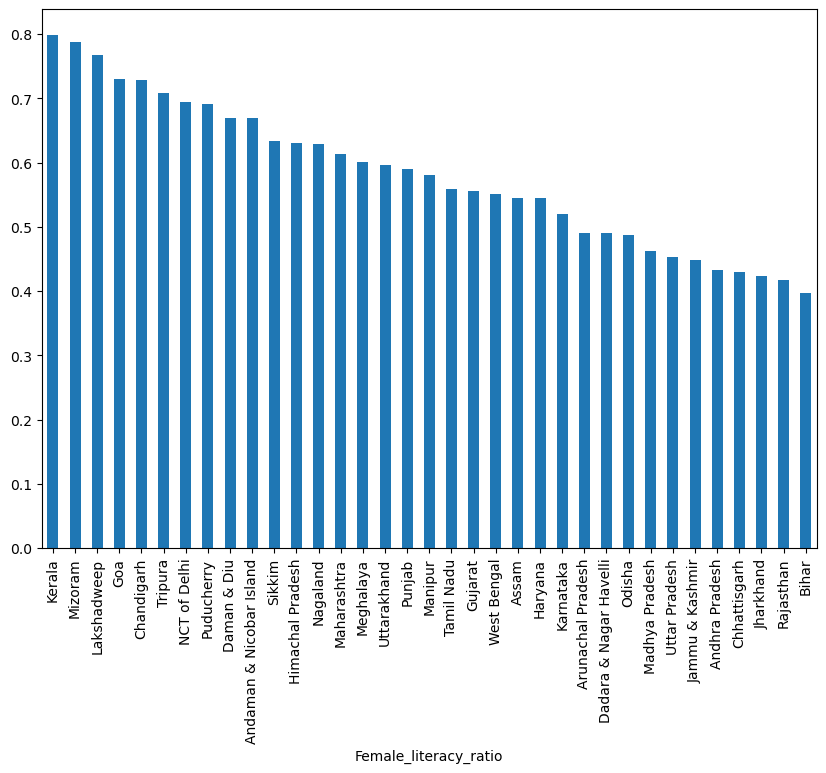

In [149]:
df_pca_eda_m.groupby(['State']).mean()['Female_literacy_ratio'].sort_values(ascending=False).plot(kind='bar', figsize=(10,7), xlabel='Female_literacy_ratio');

**Observation**

**Kerala state has the highest female literacy ratio at 0.80**

**Bihar state has the lowest female literacy ratio at 0.40**

## 2.3):  

**There are outliers in the data before and after scaling the data. But in this case since, we are dealing with the population census report, we can choose NOT to treat outliers as to avoid wrong interpretation of the data. Treating outliers may lead to wrong observation and analysis of the data. Also, it may cause in losing some sensible or valuable data.**

## 2.4):  

In [150]:
df_pca.head(2)

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160


In [151]:
df_pca_new = df_pca.copy()

In [152]:
df_pca_new.drop(columns=['State Code', 'Dist.Code', 'State', 'Area Name'], axis=1, inplace = True)

In [153]:
df_pca_new.head(2)

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,7707,23388,29796,5862,6196,3,0,1999,2598,13381,...,1150,749,180,237,680,252,32,46,258,214
1,6218,19585,23102,4482,3733,7,6,427,517,10513,...,525,715,123,229,186,148,76,178,140,160


In [154]:
df_pca_new.columns

Index(['No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06', 'M_SC', 'F_SC', 'M_ST',
       'F_ST', 'M_LIT', 'F_LIT', 'M_ILL', 'F_ILL', 'TOT_WORK_M', 'TOT_WORK_F',
       'MAINWORK_M', 'MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M',
       'MAIN_AL_F', 'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F',
       'MARGWORK_M', 'MARGWORK_F', 'MARG_CL_M', 'MARG_CL_F', 'MARG_AL_M',
       'MARG_AL_F', 'MARG_HH_M', 'MARG_HH_F', 'MARG_OT_M', 'MARG_OT_F',
       'MARGWORK_3_6_M', 'MARGWORK_3_6_F', 'MARG_CL_3_6_M', 'MARG_CL_3_6_F',
       'MARG_AL_3_6_M', 'MARG_AL_3_6_F', 'MARG_HH_3_6_M', 'MARG_HH_3_6_F',
       'MARG_OT_3_6_M', 'MARG_OT_3_6_F', 'MARGWORK_0_3_M', 'MARGWORK_0_3_F',
       'MARG_CL_0_3_M', 'MARG_CL_0_3_F', 'MARG_AL_0_3_M', 'MARG_AL_0_3_F',
       'MARG_HH_0_3_M', 'MARG_HH_0_3_F', 'MARG_OT_0_3_M', 'MARG_OT_0_3_F',
       'NON_WORK_M', 'NON_WORK_F'],
      dtype='object')

In [155]:
df_pca_new.shape

(640, 57)

In [156]:
num_columns = list(df_pca_new.columns.values)
len(num_columns)

57

**Boxplot before scaling the data**

No_HH


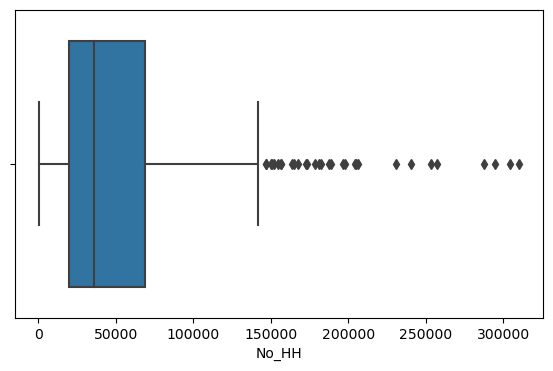

TOT_M


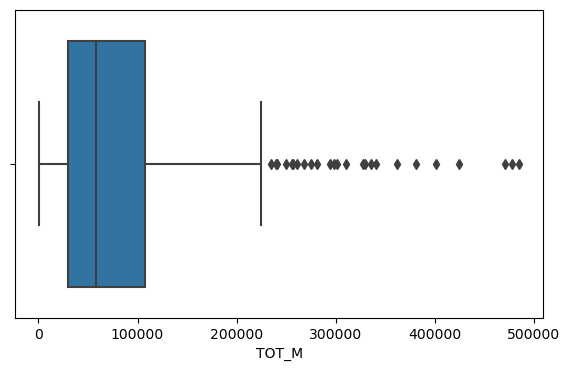

TOT_F


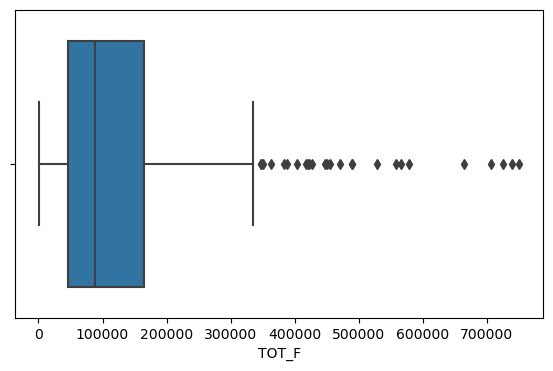

M_06


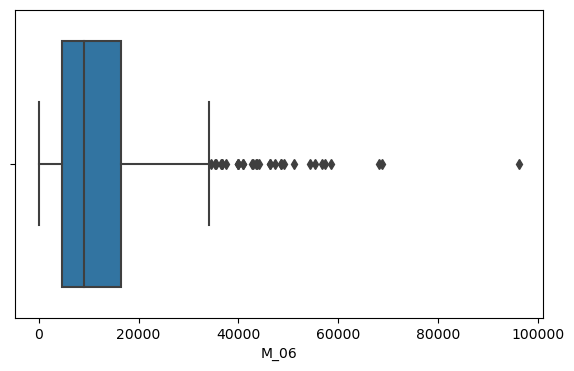

F_06


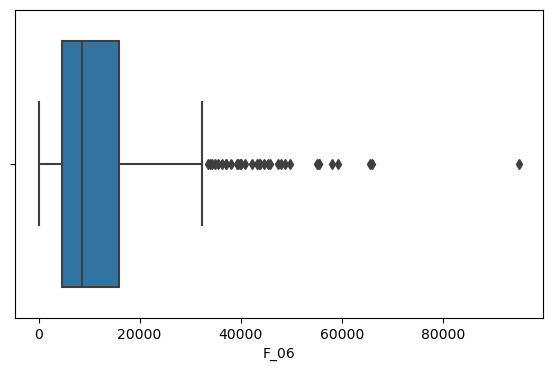

M_SC


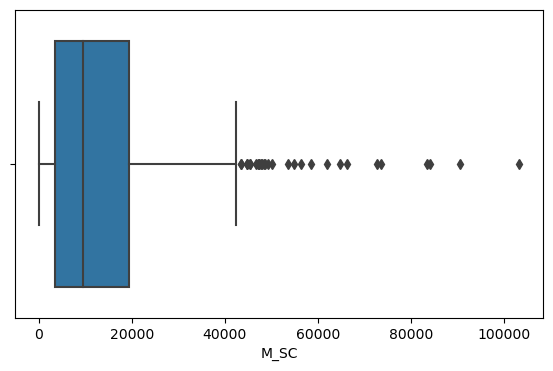

F_SC


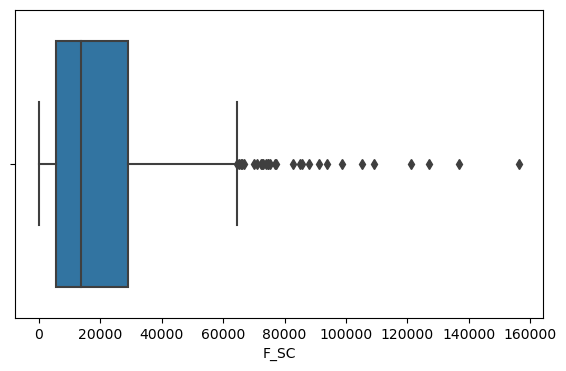

M_ST


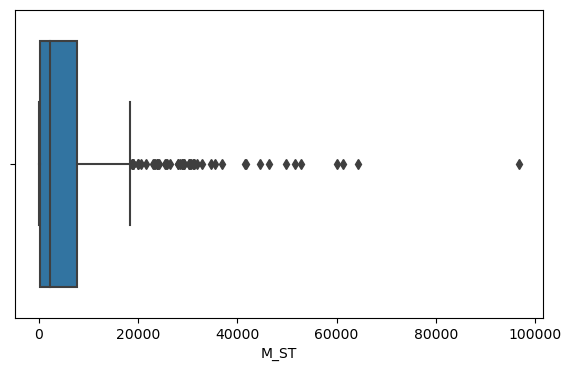

F_ST


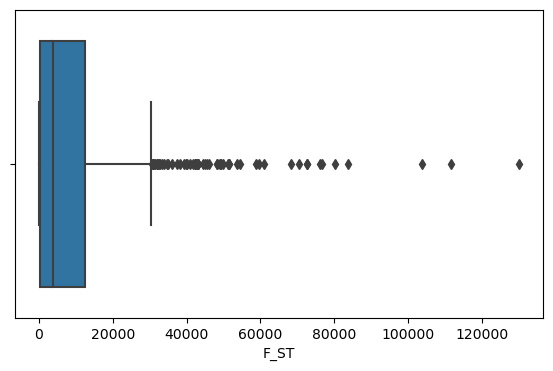

M_LIT


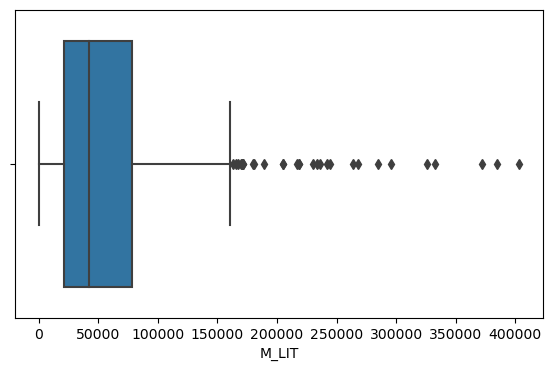

F_LIT


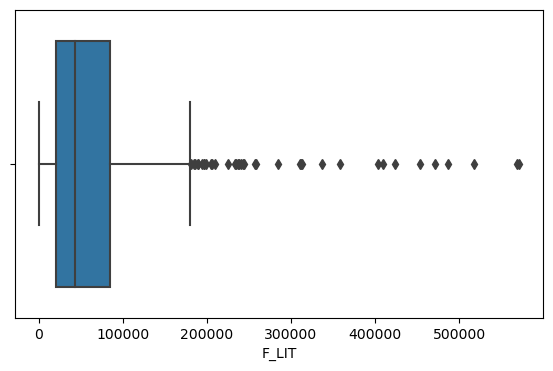

M_ILL


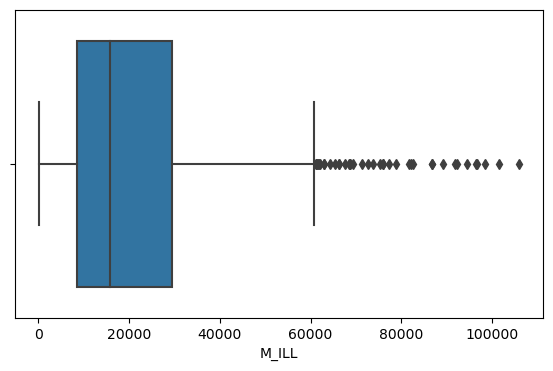

F_ILL


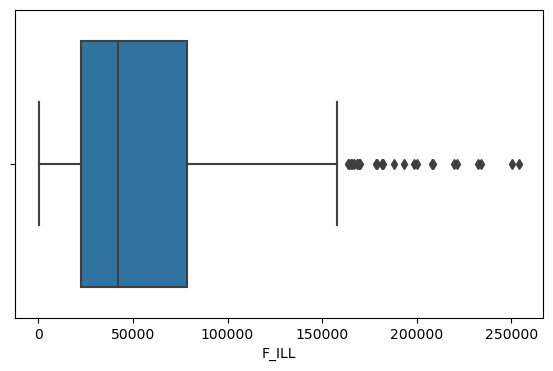

TOT_WORK_M


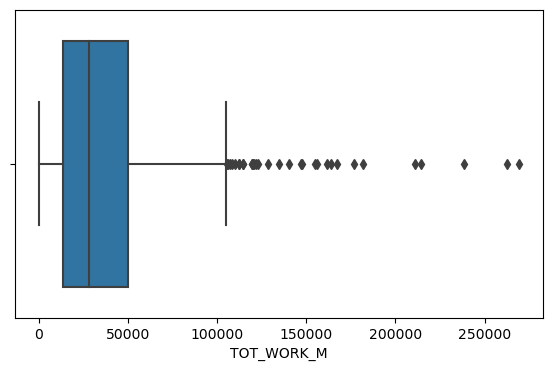

TOT_WORK_F


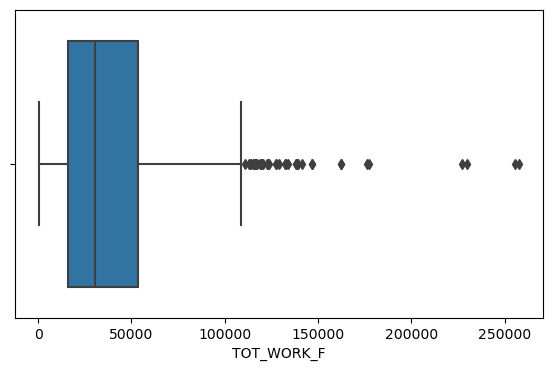

MAINWORK_M


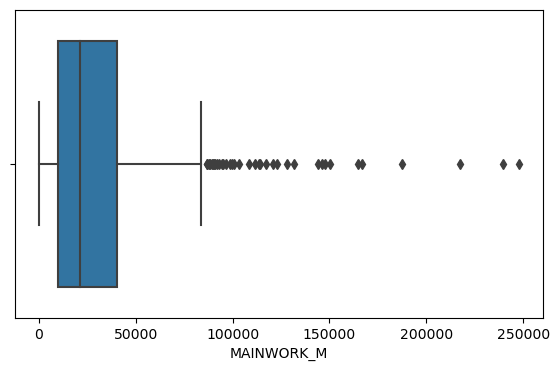

MAINWORK_F


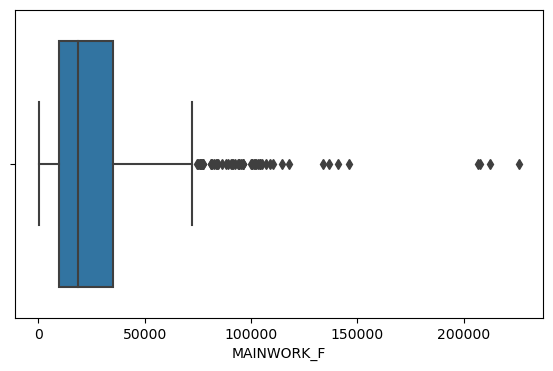

MAIN_CL_M


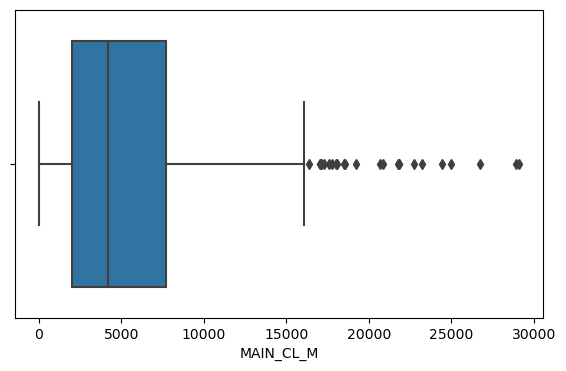

MAIN_CL_F


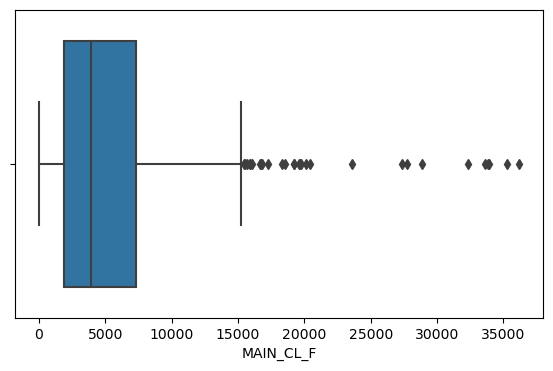

MAIN_AL_M


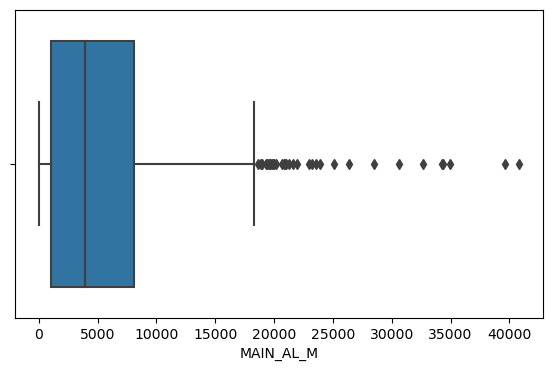

MAIN_AL_F


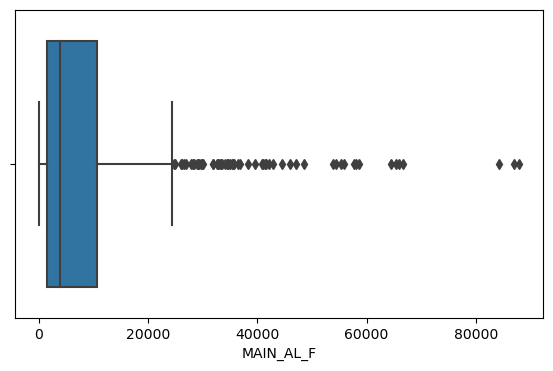

MAIN_HH_M


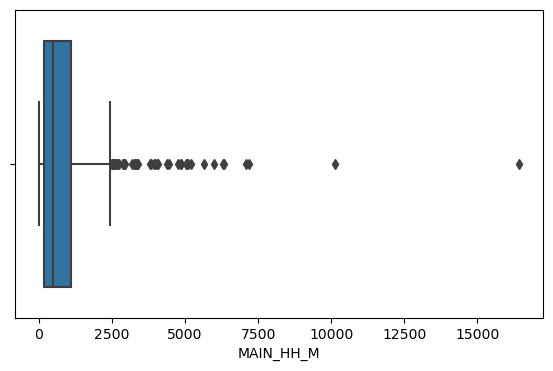

MAIN_HH_F


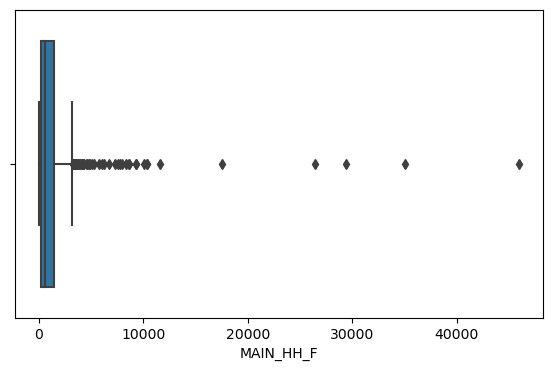

MAIN_OT_M


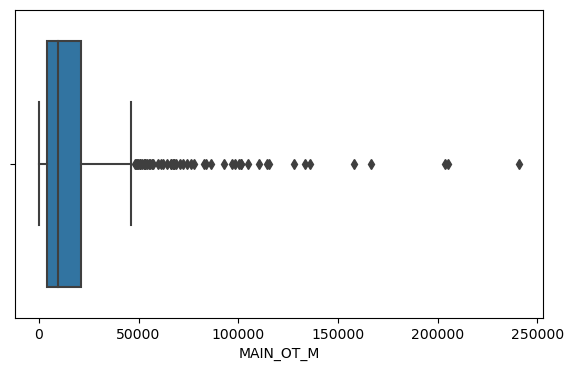

MAIN_OT_F


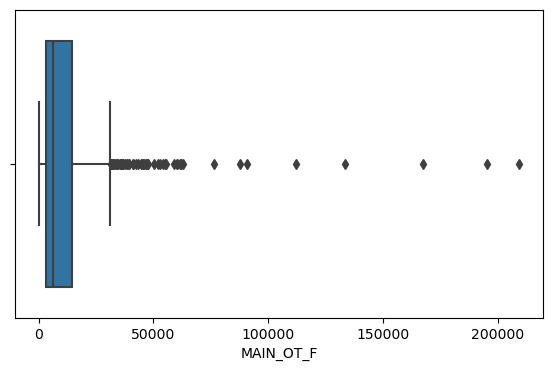

MARGWORK_M


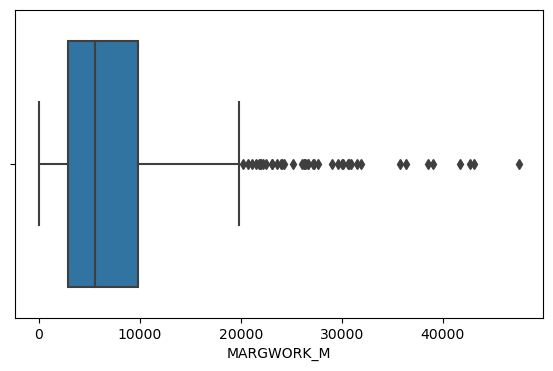

MARGWORK_F


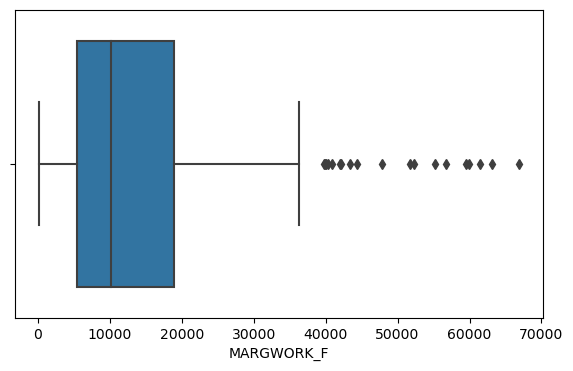

MARG_CL_M


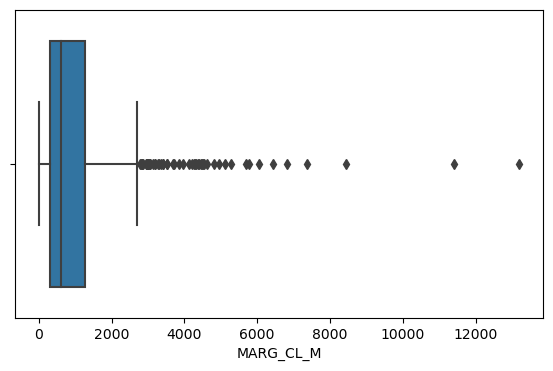

MARG_CL_F


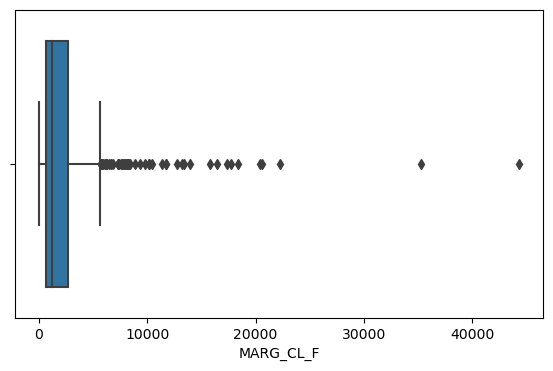

MARG_AL_M


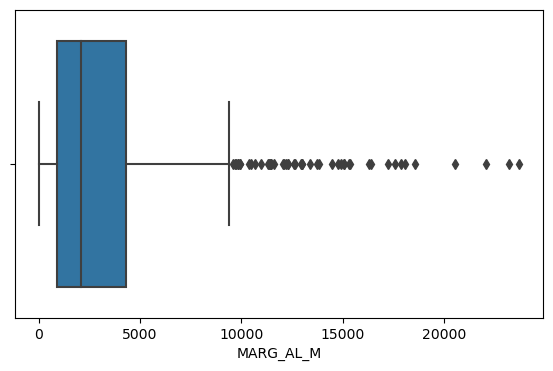

MARG_AL_F


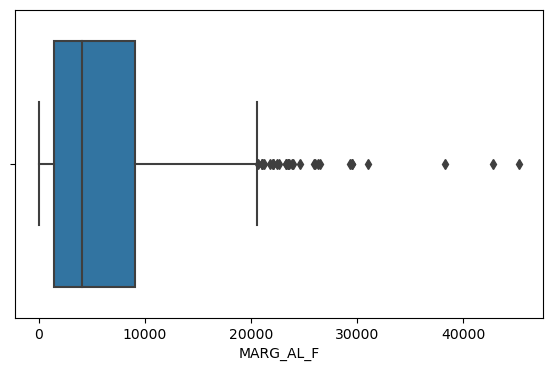

MARG_HH_M


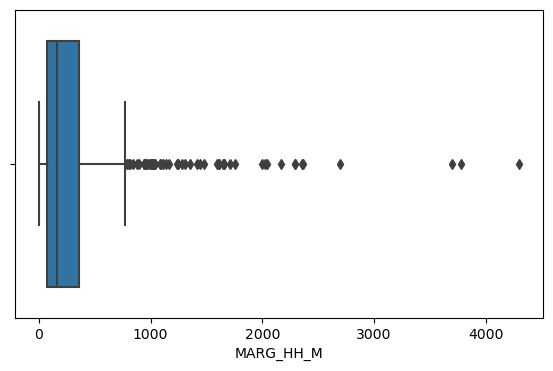

MARG_HH_F


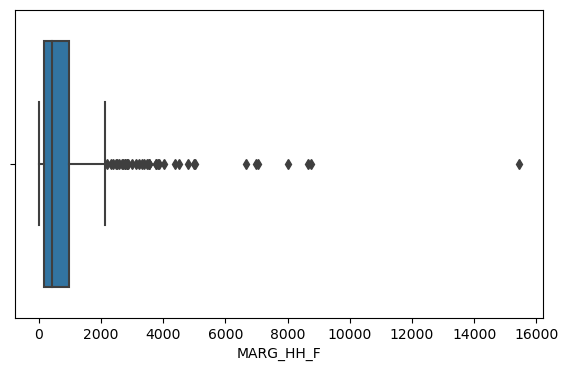

MARG_OT_M


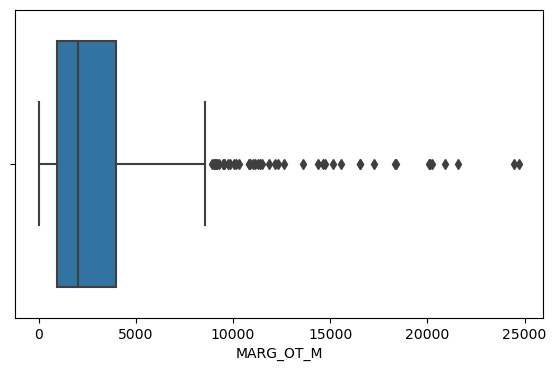

MARG_OT_F


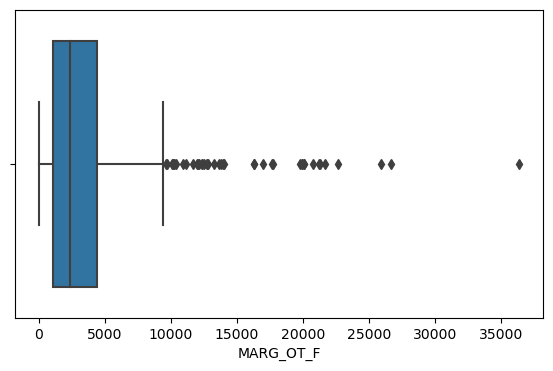

MARGWORK_3_6_M


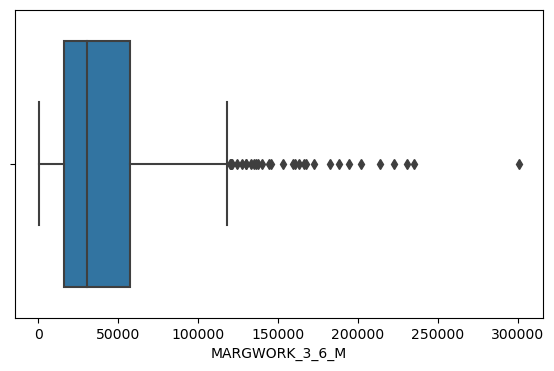

MARGWORK_3_6_F


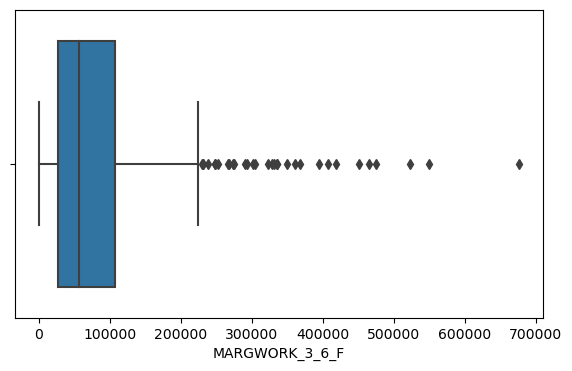

MARG_CL_3_6_M


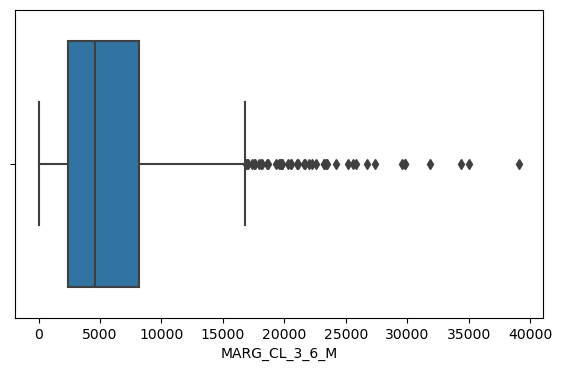

MARG_CL_3_6_F


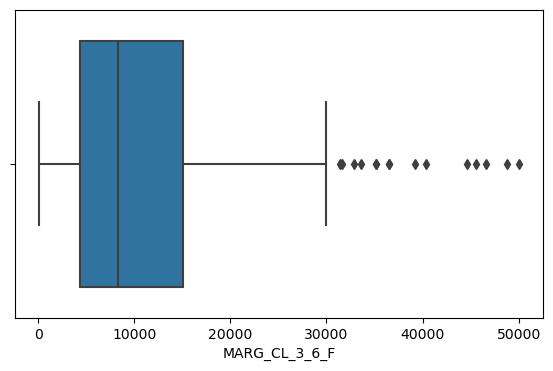

MARG_AL_3_6_M


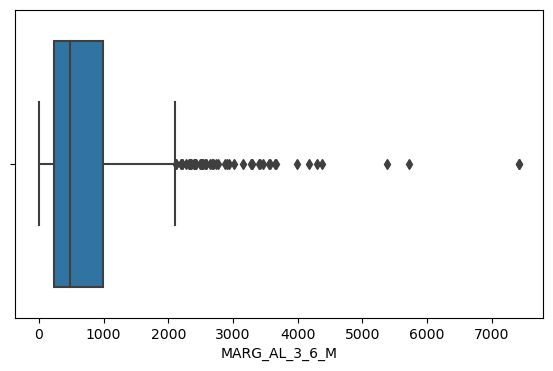

MARG_AL_3_6_F


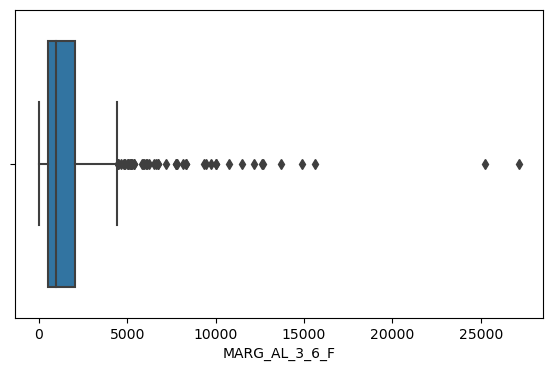

MARG_HH_3_6_M


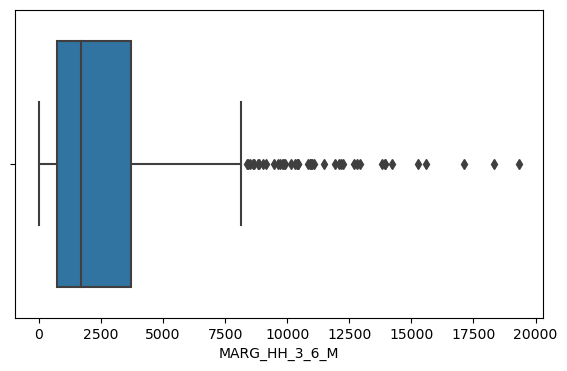

MARG_HH_3_6_F


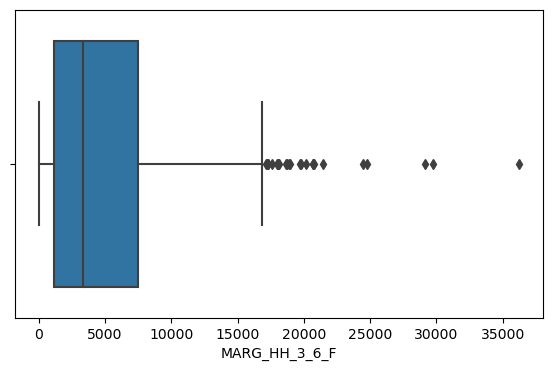

MARG_OT_3_6_M


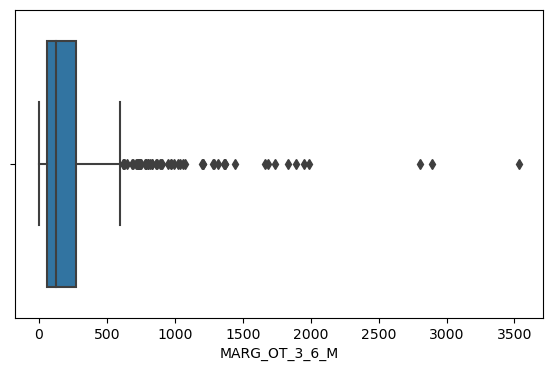

MARG_OT_3_6_F


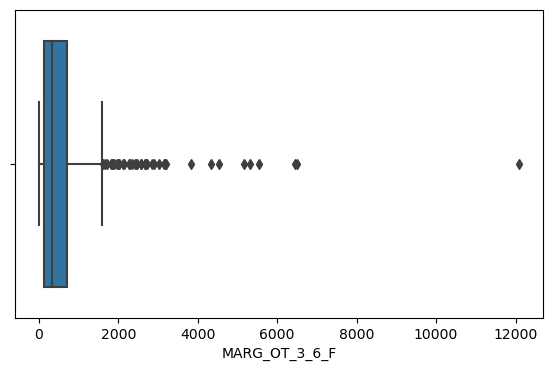

MARGWORK_0_3_M


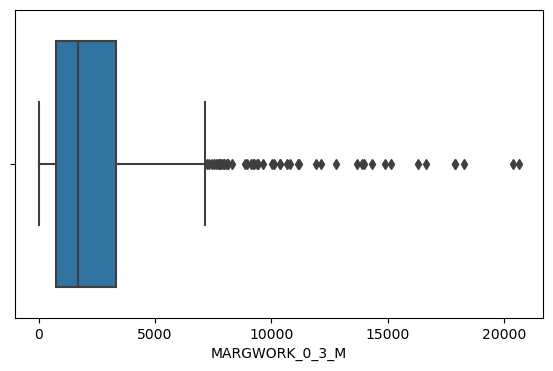

MARGWORK_0_3_F


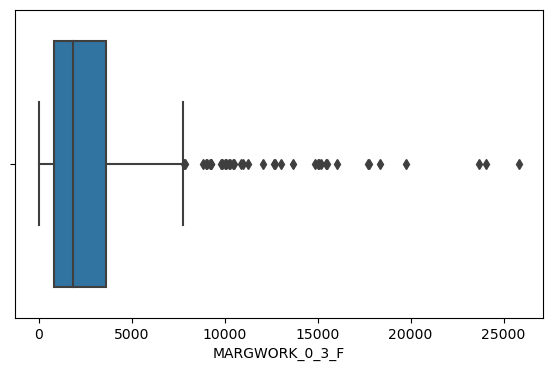

MARG_CL_0_3_M


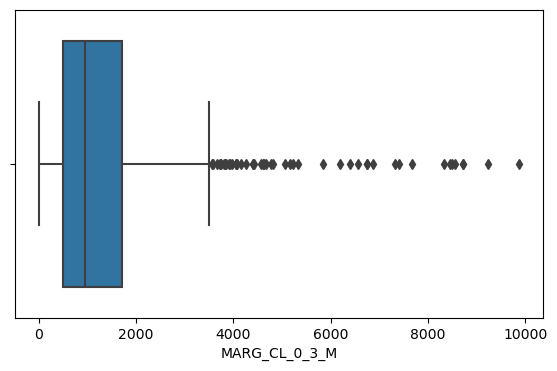

MARG_CL_0_3_F


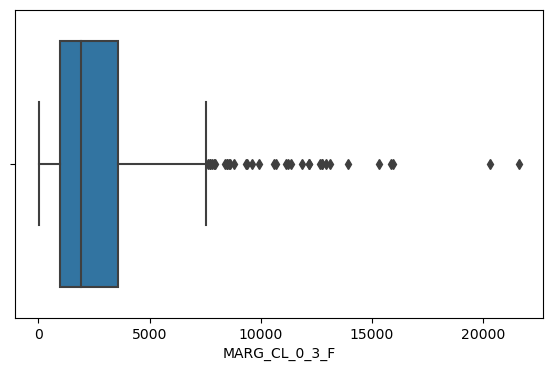

MARG_AL_0_3_M


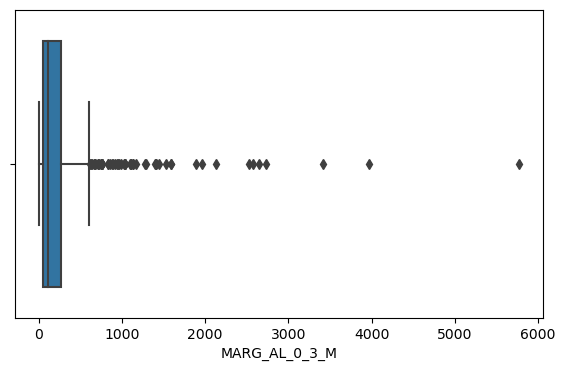

MARG_AL_0_3_F


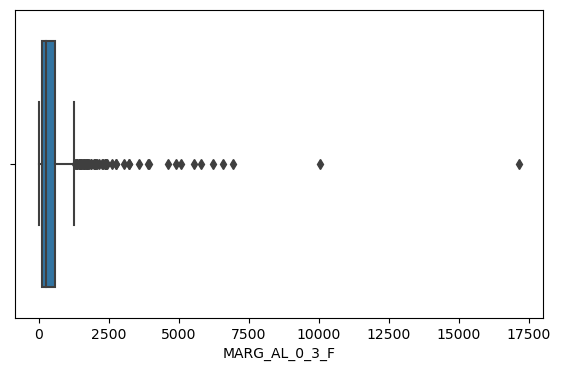

MARG_HH_0_3_M


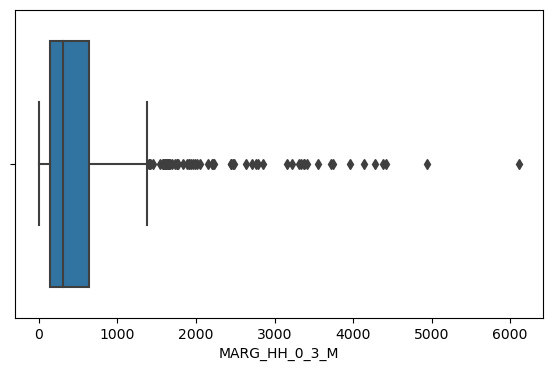

MARG_HH_0_3_F


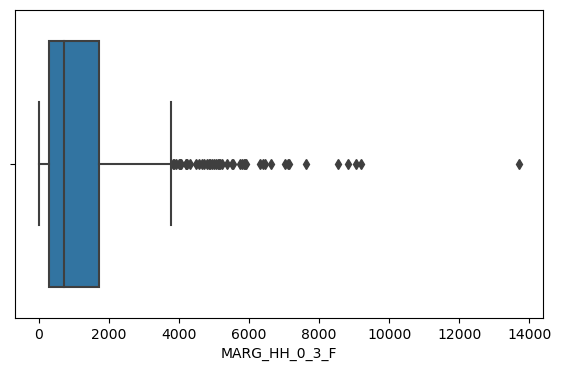

MARG_OT_0_3_M


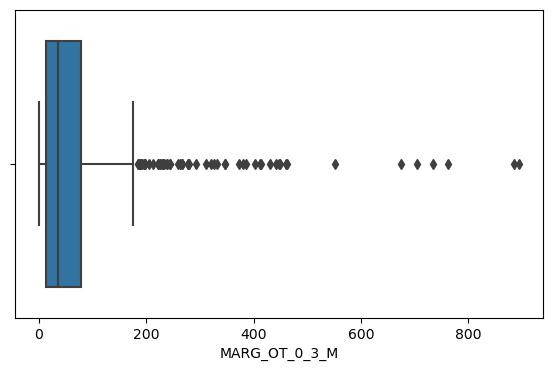

MARG_OT_0_3_F


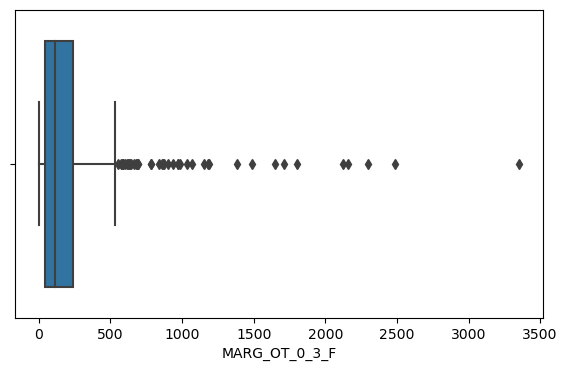

NON_WORK_M


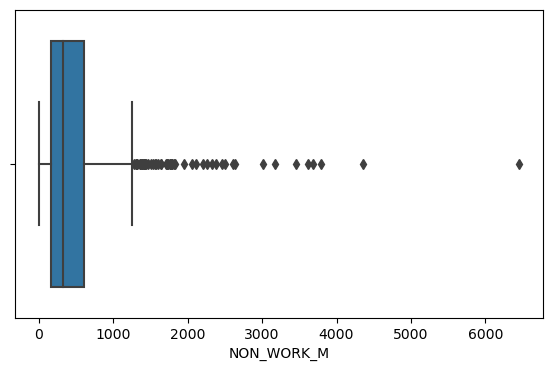

NON_WORK_F


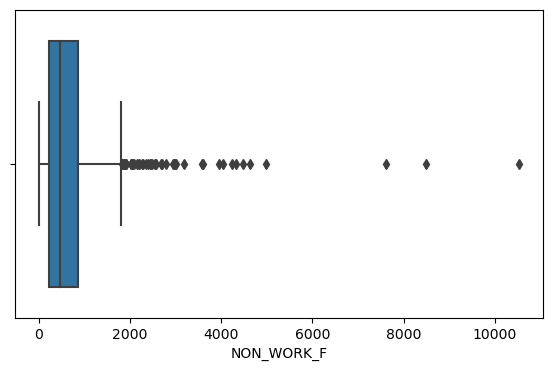

In [157]:
# To display boxplot for all numeric columns 
for col in df_pca_new.columns[0:]:
    print(col)
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.boxplot(x=df_pca_new[col])
    plt.show()

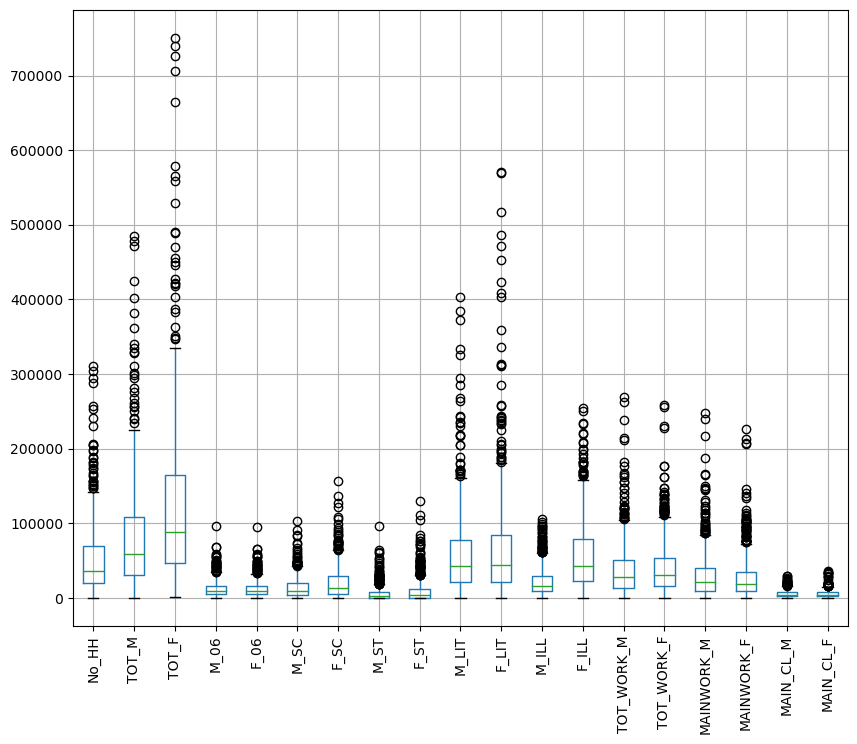

In [158]:
# combined boxplots
df_pca_new[df_pca_new.columns[0:19]].boxplot(figsize=(10,8))
plt.xticks(rotation=90);

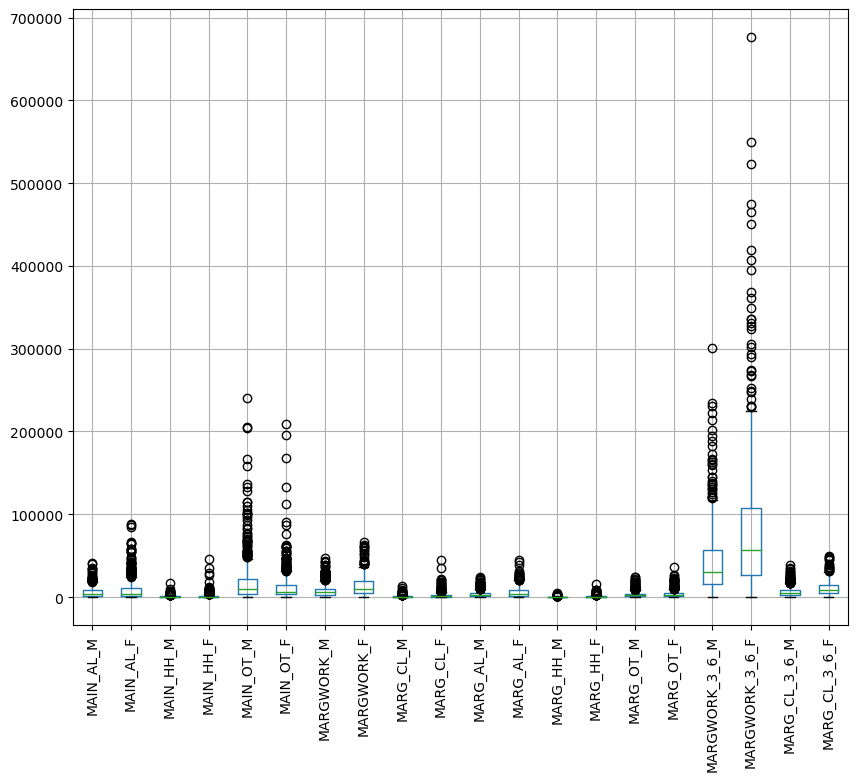

In [159]:
df_pca_new[df_pca_new.columns[19:39]].boxplot(figsize=(10,8))
plt.xticks(rotation=90);

df_pca_new[df_pca_new.columns[39:57]].boxplot(figsize=(10,8))
plt.xticks(rotation=90);

In [160]:
from sklearn.preprocessing import StandardScaler

**Scaling the data**

In [161]:
# Scaling the data
scaler=StandardScaler()
df_pca_new_scaled=pd.DataFrame(scaler.fit_transform(df_pca_new), columns=df_pca_new.columns)
df_pca_new_scaled.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-0.904738,-0.771236,-0.815563,-0.561012,-0.507738,-0.958575,-0.957049,-0.423306,-0.476423,-0.798097,...,-0.163229,-0.720610,-0.156494,-0.287524,0.156577,-0.657412,-0.365258,-0.499977,-0.413053,-0.539614
1,-0.935695,-0.823100,-0.874534,-0.681096,-0.725367,-0.958297,-0.956772,-0.582014,-0.607607,-0.849434,...,-0.583103,-0.732811,-0.282327,-0.294688,-0.491731,-0.723062,0.042855,-0.073481,-0.606455,-0.598988
2,-0.972412,-1.000919,-0.981466,-0.976956,-0.965262,-0.958575,-0.956772,-0.038951,-0.027273,-0.956457,...,-0.859212,-0.921931,-0.456727,-0.420050,-0.731894,-0.795026,-0.662068,-0.635680,-0.726103,-0.707839
3,-1.037530,-1.052224,-1.041001,-1.022118,-0.995393,-0.958783,-0.957049,-0.355965,-0.390060,-1.004643,...,-0.805468,-0.900758,-0.419198,-0.385127,-0.718770,-0.784926,-0.624966,-0.616294,-0.645791,-0.710038
4,-0.822676,-0.809381,-0.813933,-0.622359,-0.649908,-0.957395,-0.955529,0.149238,0.043330,-0.800568,...,-0.348645,-0.297513,0.472670,0.434200,-0.466796,-0.625849,-0.439461,-0.309346,-0.540895,-0.249344


In [162]:
df_pca_new_scaled.shape

(640, 57)

In [163]:
num_columns_scaled = list(df_pca_new_scaled.columns.values)
len(num_columns_scaled)

57

**Boxplot after scaling the data**

No_HH


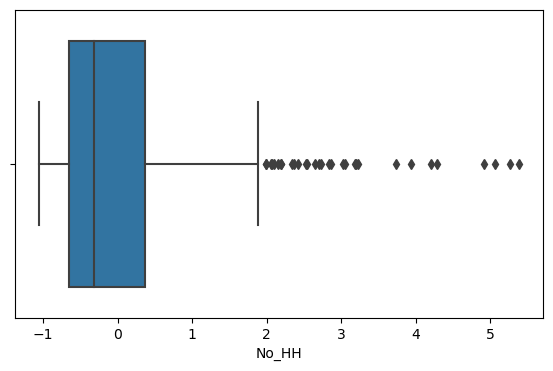

TOT_M


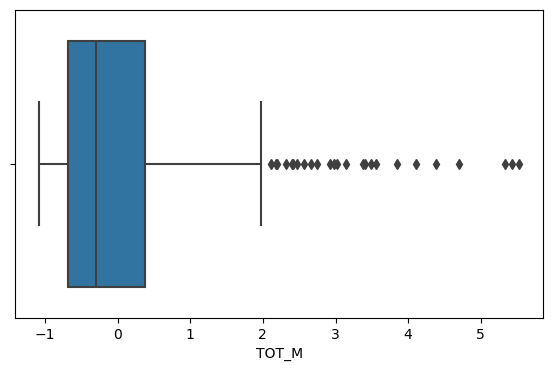

TOT_F


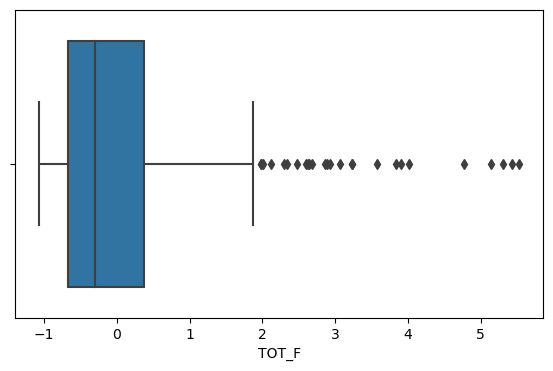

M_06


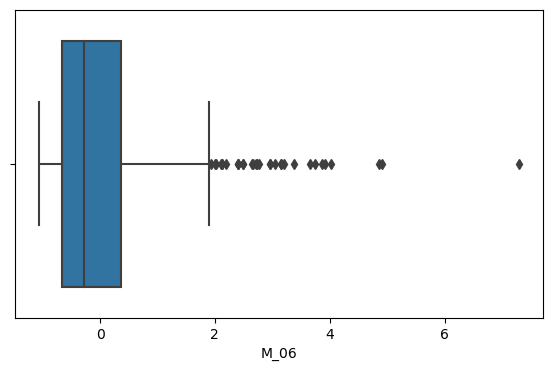

F_06


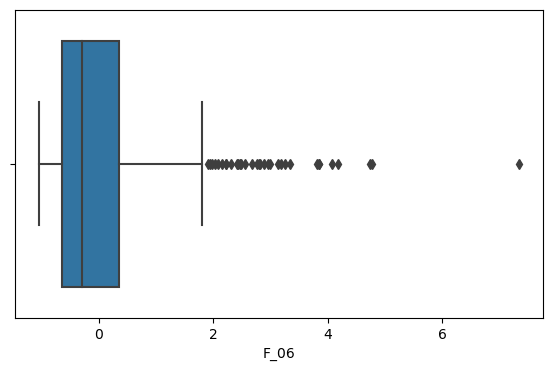

M_SC


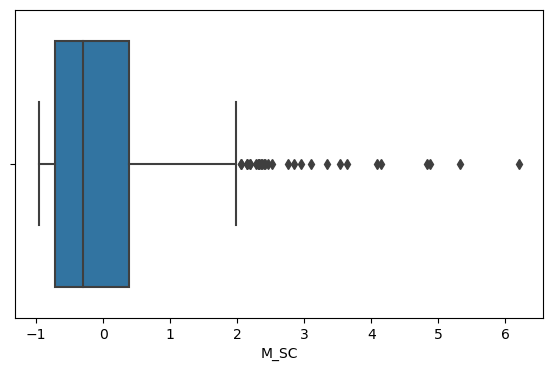

F_SC


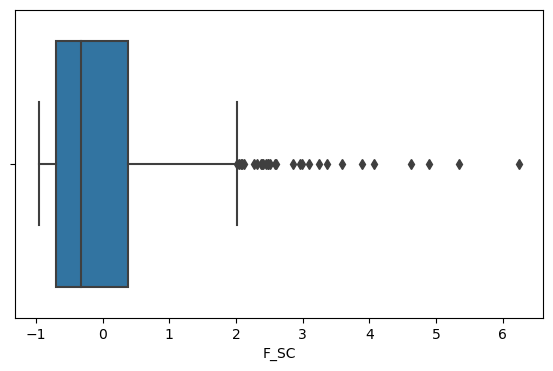

M_ST


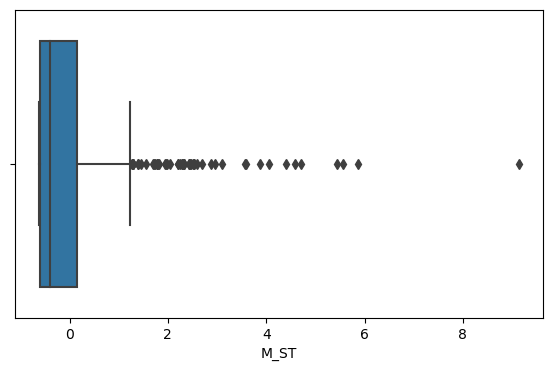

F_ST


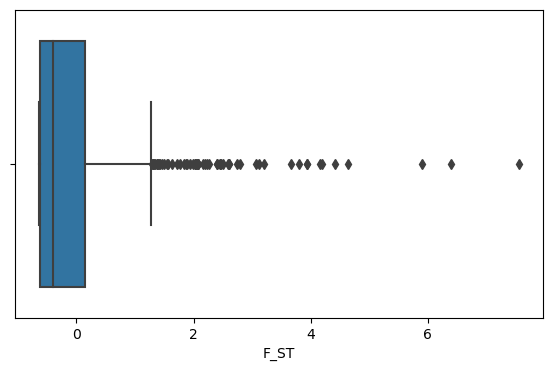

M_LIT


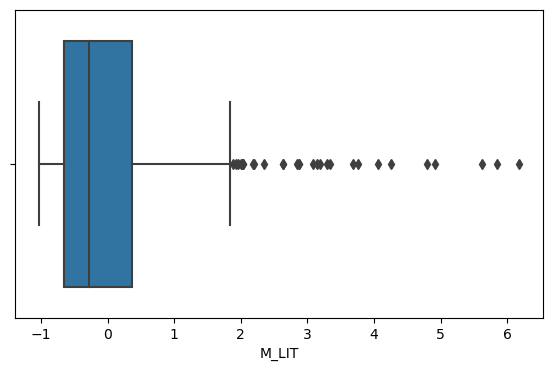

F_LIT


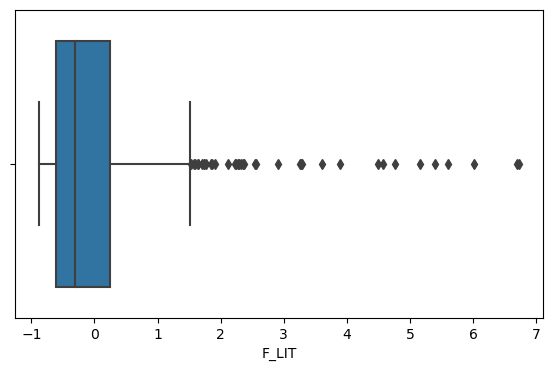

M_ILL


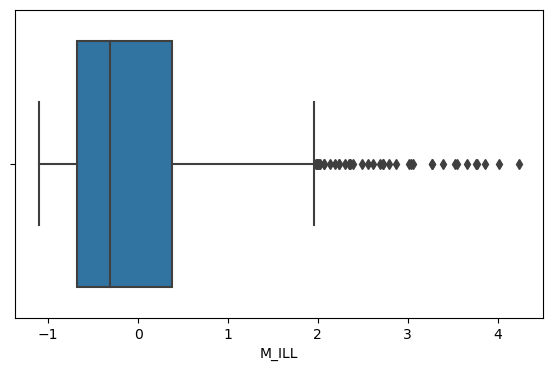

F_ILL


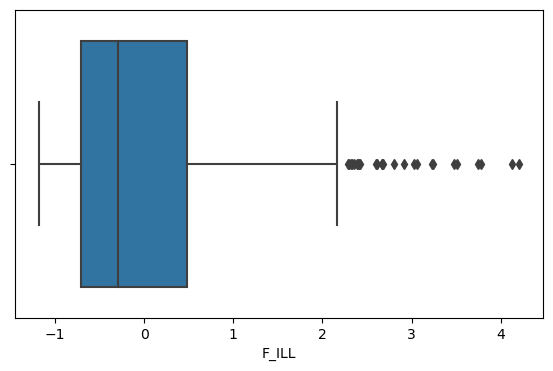

TOT_WORK_M


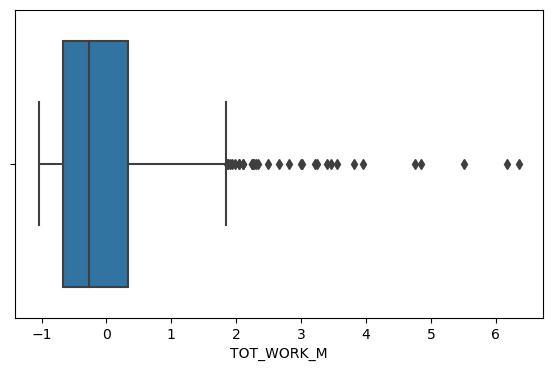

TOT_WORK_F


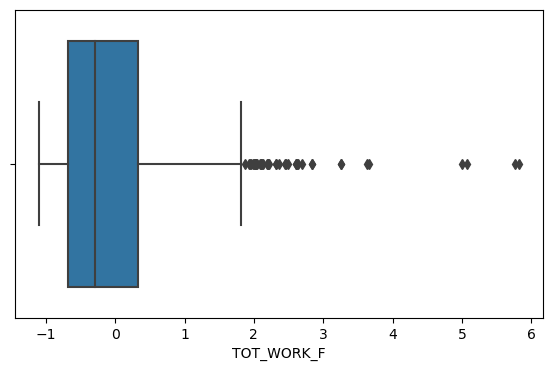

MAINWORK_M


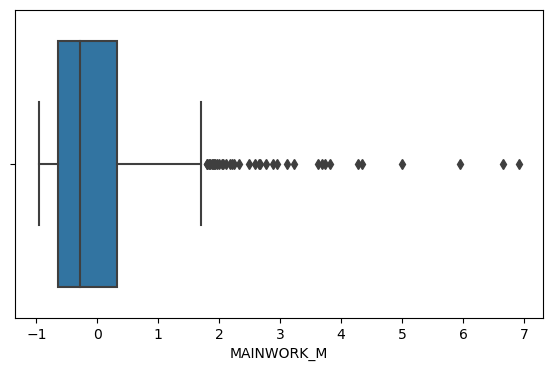

MAINWORK_F


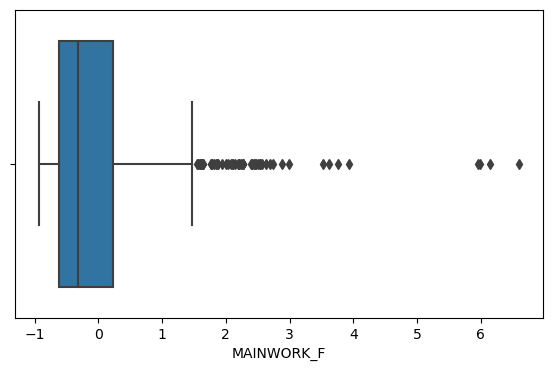

MAIN_CL_M


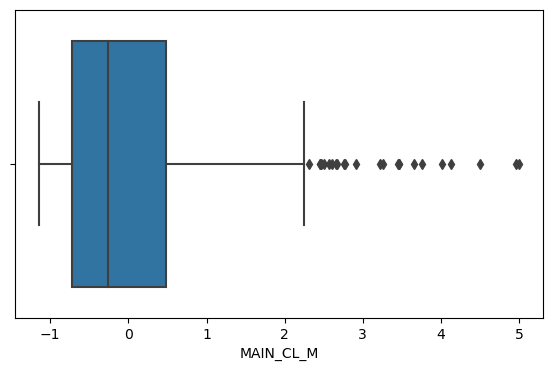

MAIN_CL_F


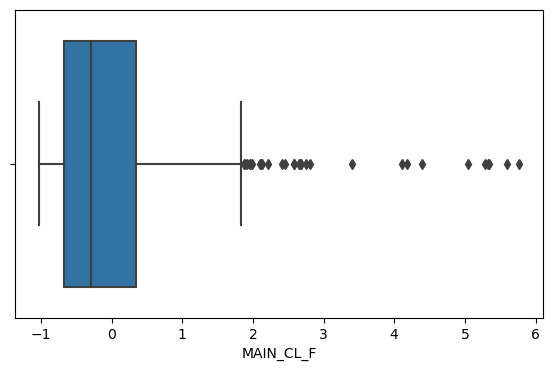

MAIN_AL_M


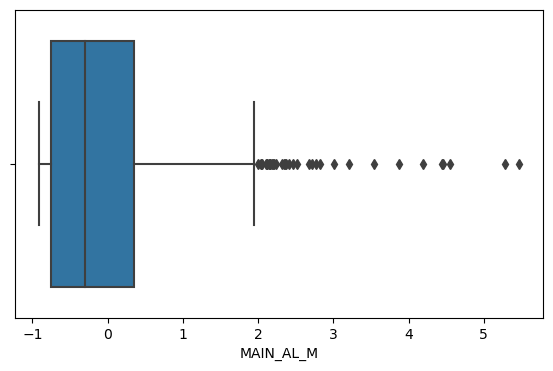

MAIN_AL_F


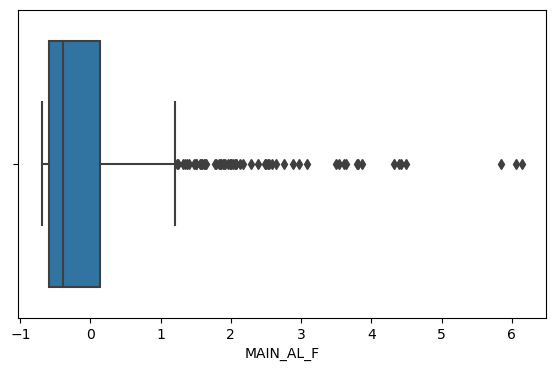

MAIN_HH_M


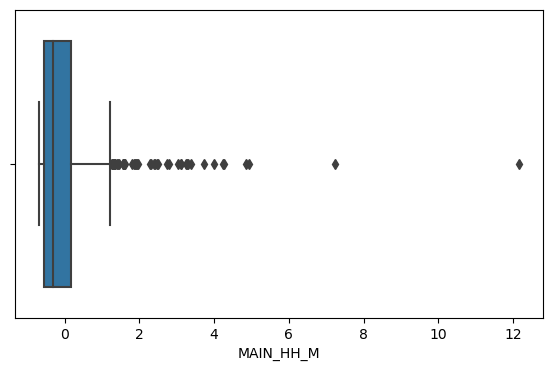

MAIN_HH_F


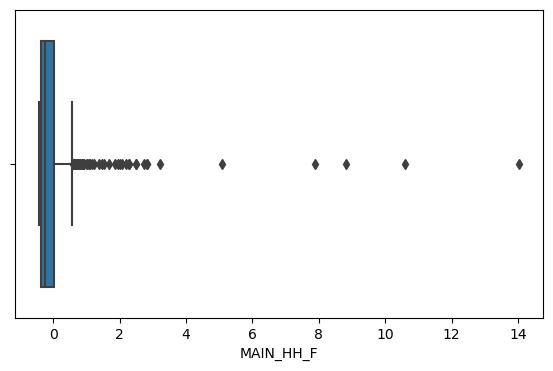

MAIN_OT_M


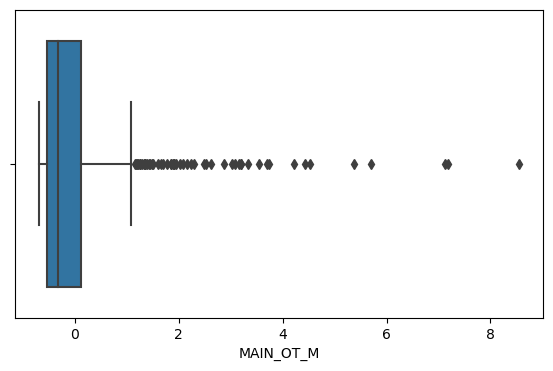

MAIN_OT_F


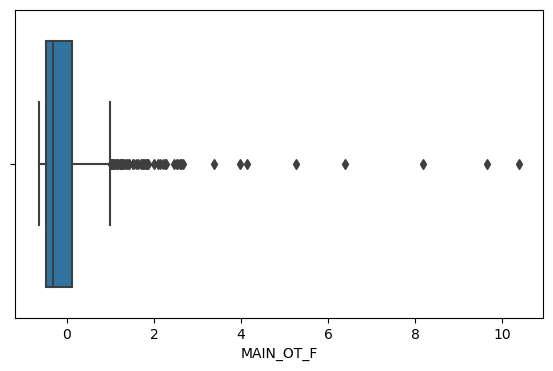

MARGWORK_M


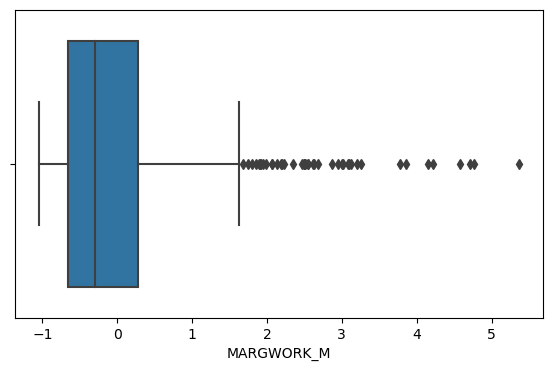

MARGWORK_F


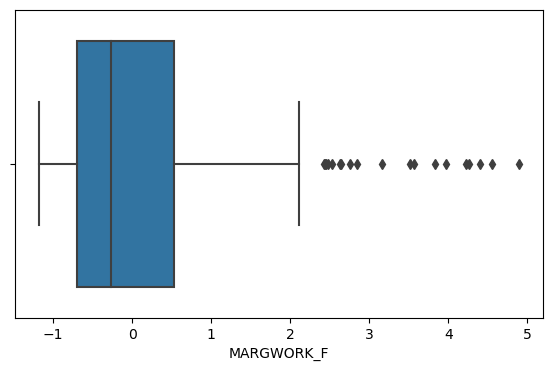

MARG_CL_M


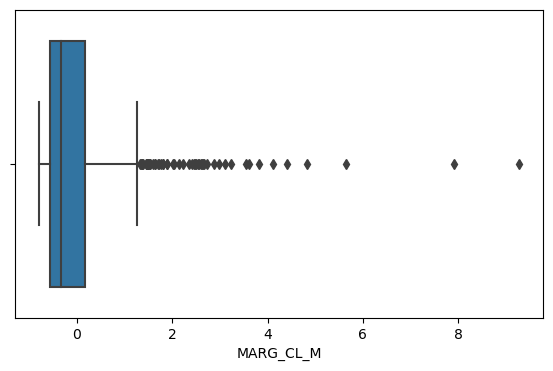

MARG_CL_F


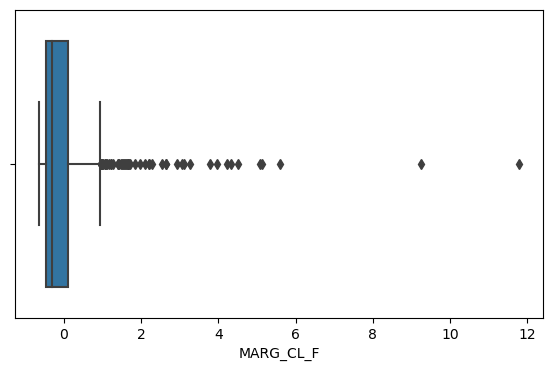

MARG_AL_M


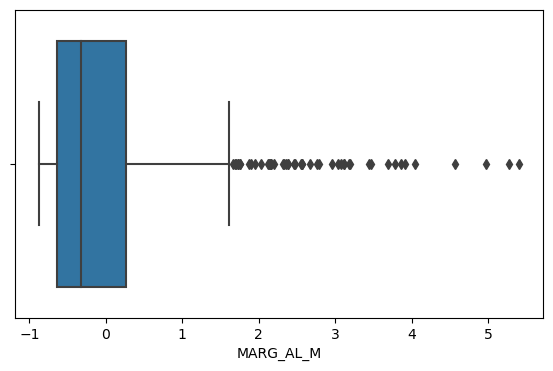

MARG_AL_F


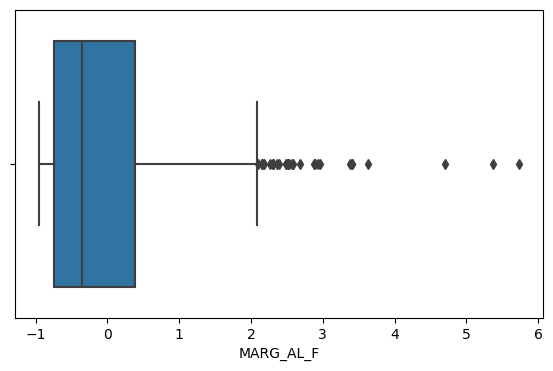

MARG_HH_M


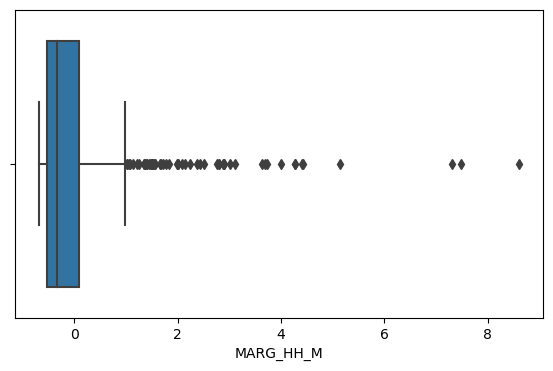

MARG_HH_F


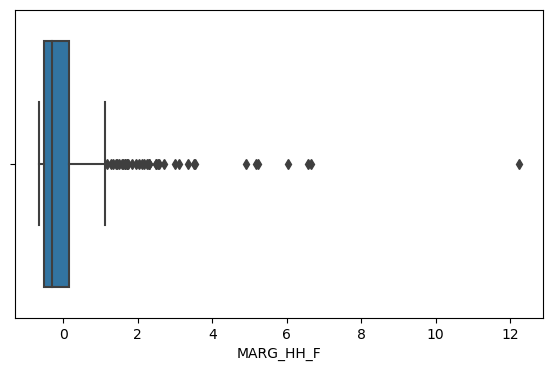

MARG_OT_M


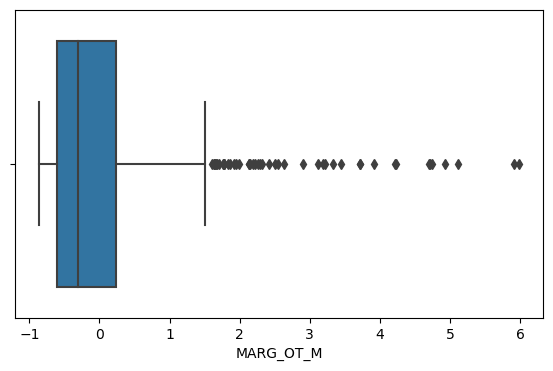

MARG_OT_F


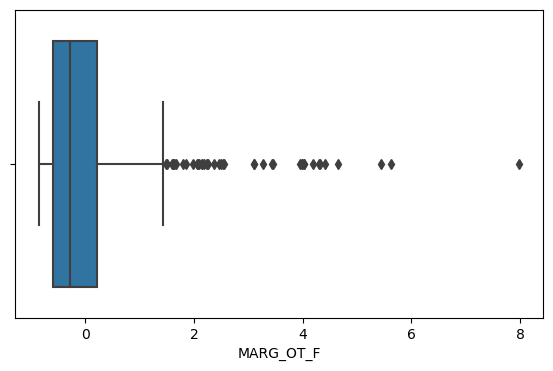

MARGWORK_3_6_M


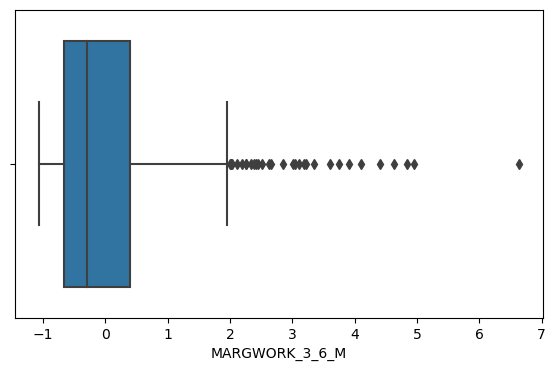

MARGWORK_3_6_F


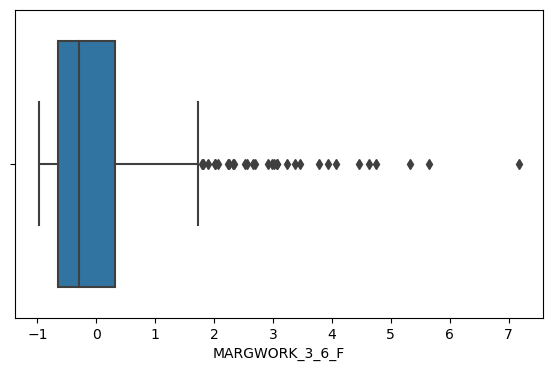

MARG_CL_3_6_M


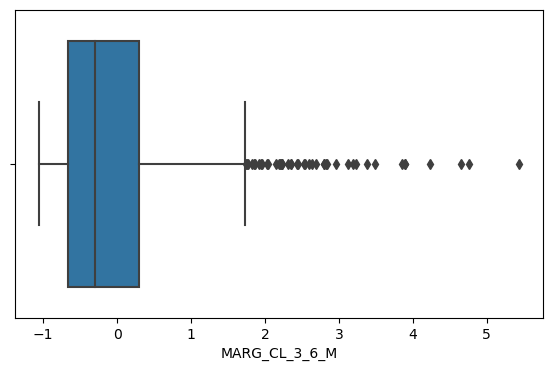

MARG_CL_3_6_F


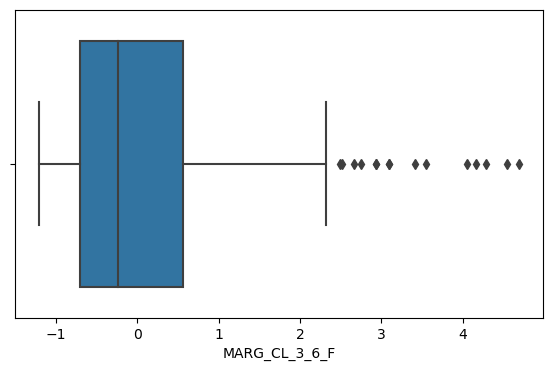

MARG_AL_3_6_M


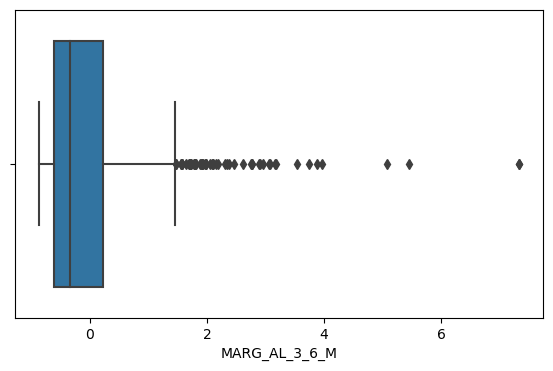

MARG_AL_3_6_F


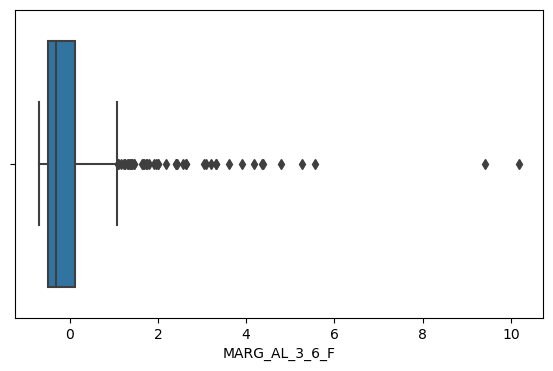

MARG_HH_3_6_M


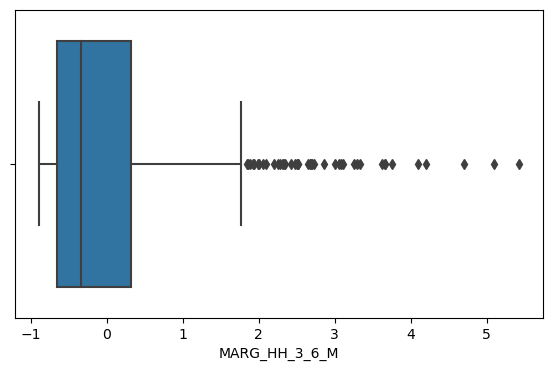

MARG_HH_3_6_F


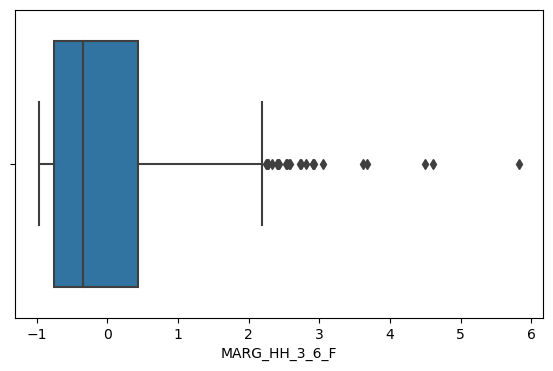

MARG_OT_3_6_M


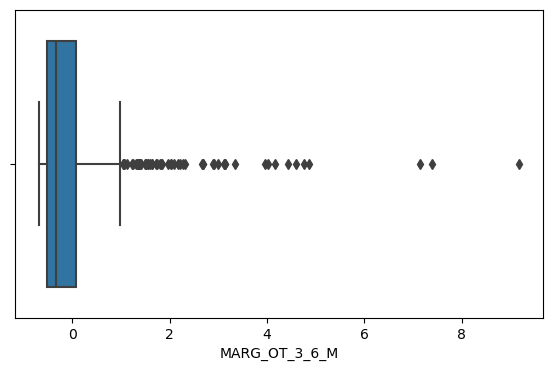

MARG_OT_3_6_F


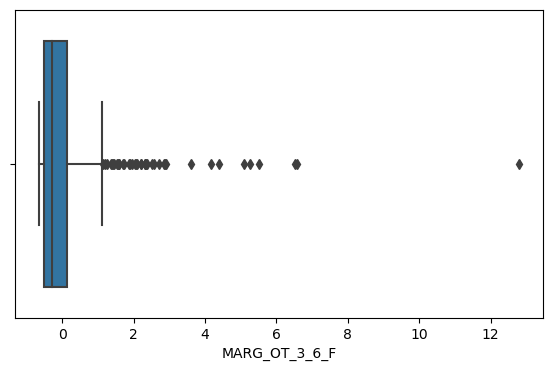

MARGWORK_0_3_M


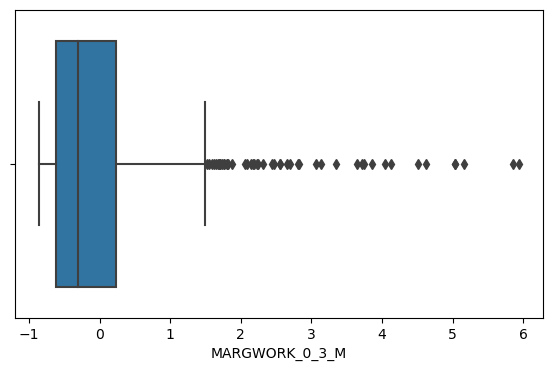

MARGWORK_0_3_F


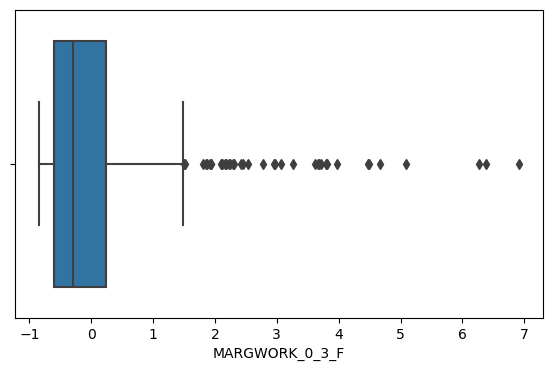

MARG_CL_0_3_M


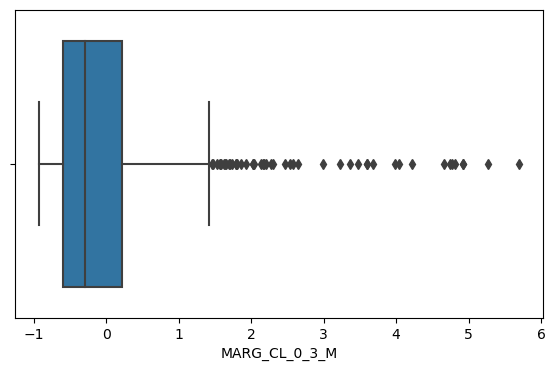

MARG_CL_0_3_F


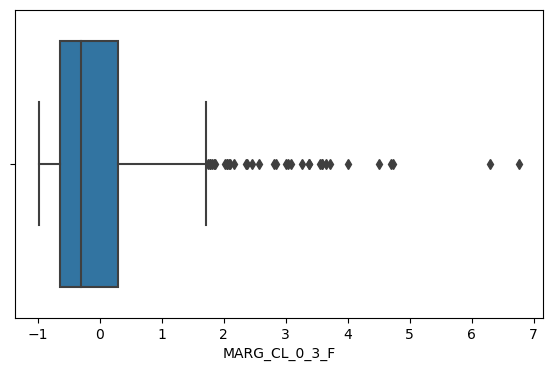

MARG_AL_0_3_M


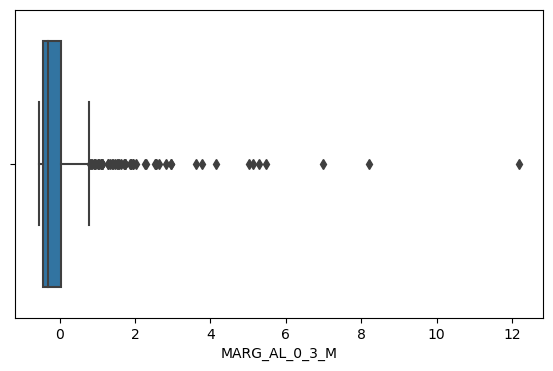

MARG_AL_0_3_F


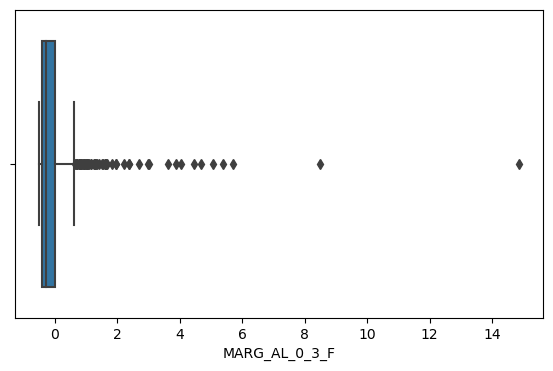

MARG_HH_0_3_M


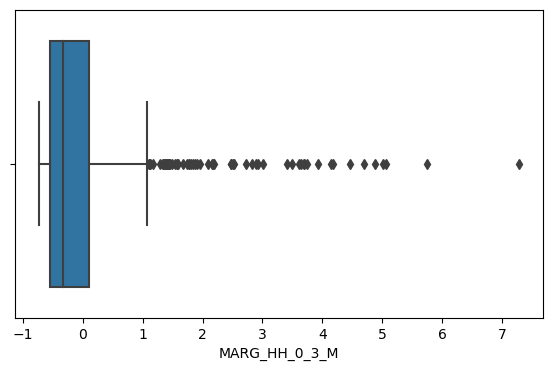

MARG_HH_0_3_F


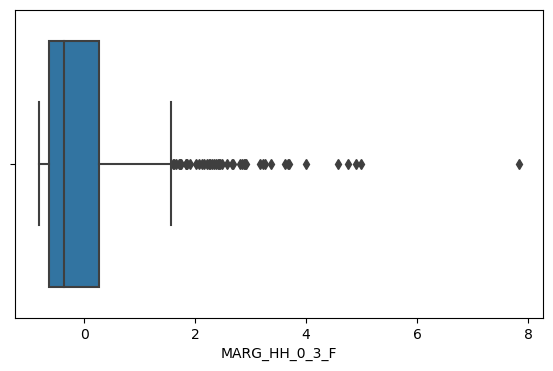

MARG_OT_0_3_M


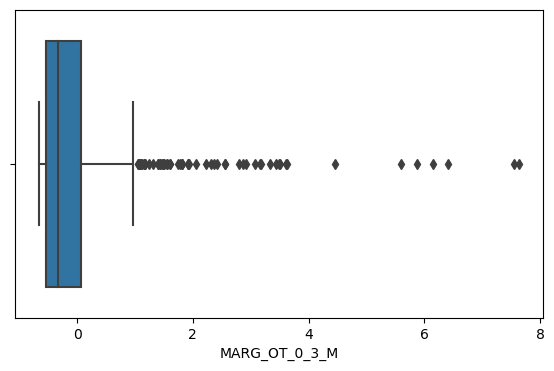

MARG_OT_0_3_F


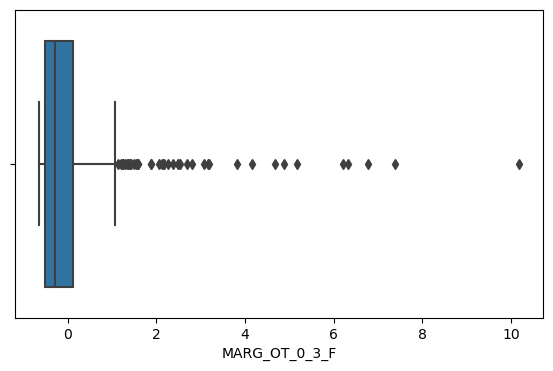

NON_WORK_M


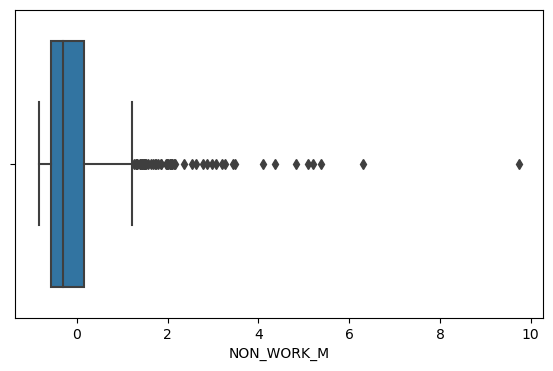

NON_WORK_F


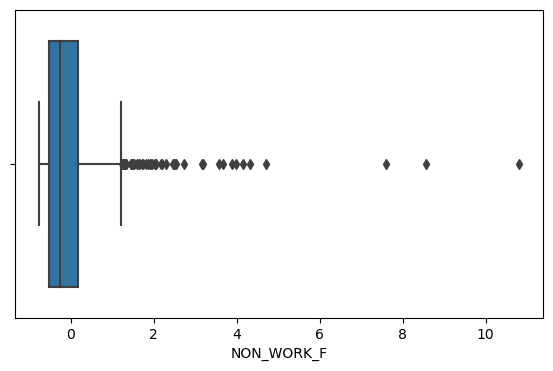

In [164]:
for col in df_pca_new_scaled.columns[0:]:
    print(col)
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.boxplot(x=df_pca_new_scaled[col])
    plt.show()

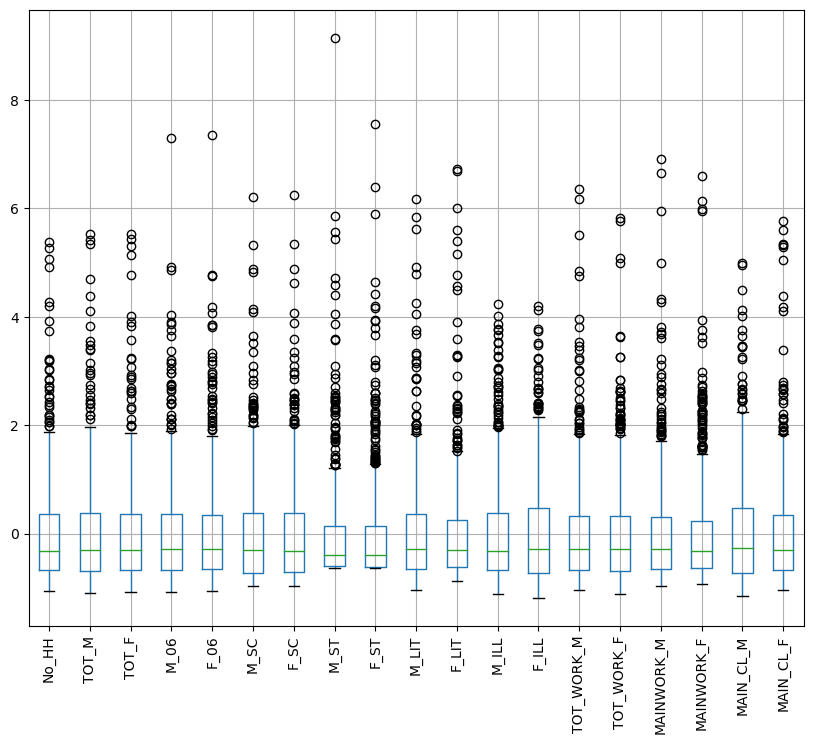

In [165]:
# combined boxplots
df_pca_new_scaled[df_pca_new_scaled.columns[0:19]].boxplot(figsize=(10,8))
plt.xticks(rotation=90);

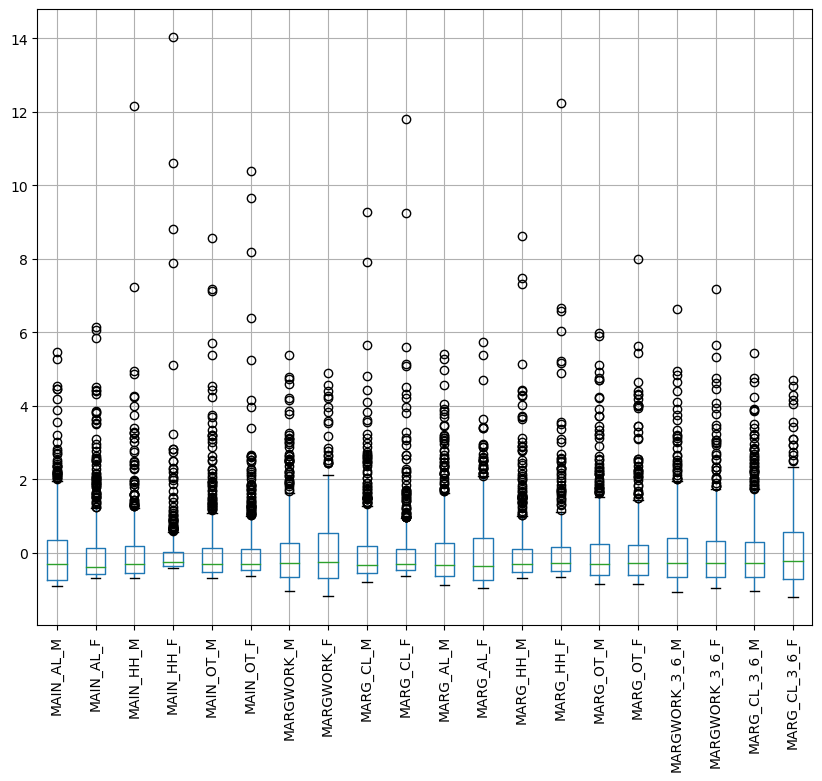

In [166]:
df_pca_new_scaled[df_pca_new_scaled.columns[19:39]].boxplot(figsize=(10,8))
plt.xticks(rotation=90);

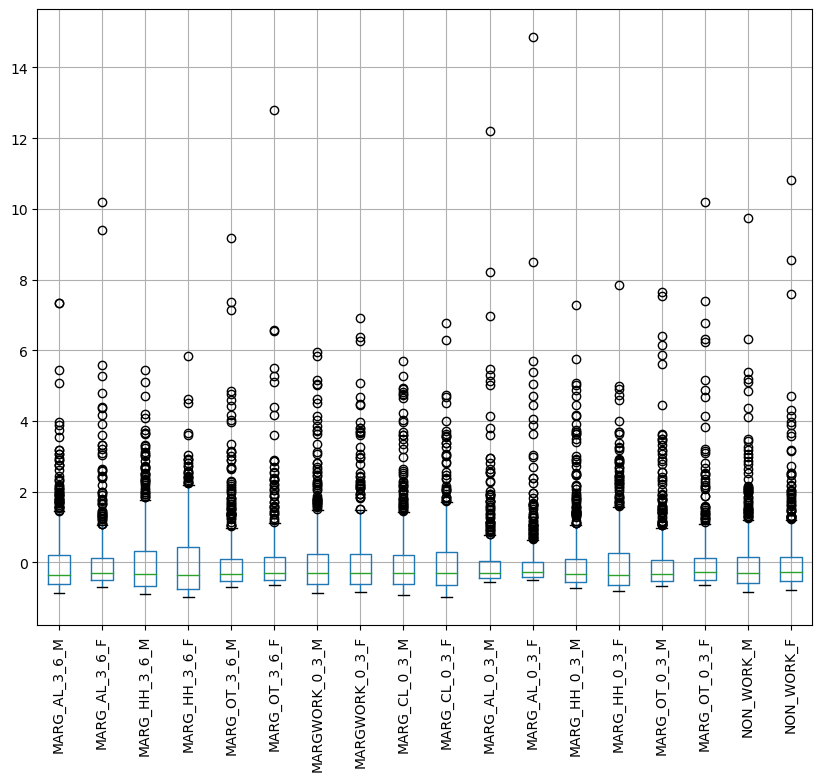

In [167]:
df_pca_new_scaled[df_pca_new_scaled.columns[39:57]].boxplot(figsize=(10,8))
plt.xticks(rotation=90);

**Observations:**
- After comparing boxplots before and after scaling, we can note that the outliers still exist. It does not remove outliers.
- Scaling helps in comparing variables of different scales on the same scale.

## 2.5):  

**Bartletts Test of Sphericity**
- H0: All variables in the data are uncorrelated
- Ha: At least one pair of variables in the data are correlated

In [168]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_pca_new_scaled)
p_value

0.0

**As the p value (0) is < 0.05, we can reject Null hypothesis, i.e., Atleast one pair or all variables are correlated**

In [169]:
#adequacy of sample size. - The Kaiser-Meyer-Olkin (KMO)
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_pca_new_scaled)
kmo_model

0.8039889932781237

**The kmo value (0.80) is above 0.7, so we can say that adequacy of sample size is good**

In [170]:
# Covariance matrix
df_pca_new_scaled.cov().head(10)

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
No_HH,1.001565,0.917604,0.972109,0.798807,0.797619,0.776522,0.825137,0.149861,0.165361,0.933397,...,0.557813,0.556412,0.067531,0.046200,0.369168,0.418100,0.487508,0.537694,0.763577,0.736844
TOT_M,0.917604,1.001565,0.984178,0.952313,0.949275,0.841240,0.827592,0.091565,0.086315,0.990860,...,0.699403,0.596628,0.167666,0.115761,0.496704,0.441049,0.652624,0.589101,0.846218,0.717182
TOT_F,0.972109,0.984178,1.001565,0.909396,0.907975,0.818238,0.834059,0.123819,0.128848,0.986983,...,0.656373,0.599888,0.138980,0.099593,0.451717,0.443825,0.594735,0.572748,0.828949,0.747751
M_06,0.798807,0.952313,0.909396,1.001565,0.999713,0.782342,0.748700,0.055361,0.044017,0.914186,...,0.761800,0.648011,0.267091,0.198649,0.602031,0.514860,0.691682,0.565914,0.786189,0.652162
F_06,0.797619,0.949275,0.907975,0.999713,1.001565,0.774345,0.742846,0.065240,0.054748,0.909062,...,0.764809,0.650851,0.259074,0.189865,0.612525,0.524089,0.699729,0.575077,0.784954,0.652458
M_SC,0.776522,0.841240,0.818238,0.782342,0.774345,1.001565,0.986612,-0.045738,-0.047900,0.819765,...,0.674687,0.570470,0.184620,0.129953,0.524269,0.462621,0.665958,0.592362,0.736550,0.580927
F_SC,0.825137,0.827592,0.834059,0.748700,0.742846,0.986612,1.001565,-0.014144,-0.009204,0.815424,...,0.651473,0.586607,0.163683,0.116410,0.508801,0.489422,0.629453,0.590268,0.721226,0.601028
M_ST,0.149861,0.091565,0.123819,0.055361,0.065240,-0.045738,-0.014144,1.001565,0.989593,0.090682,...,0.123160,0.196878,0.027262,0.007088,0.126534,0.239186,-0.005491,0.090264,0.123178,0.147184
F_ST,0.165361,0.086315,0.128848,0.044017,0.054748,-0.047900,-0.009204,0.989593,1.001565,0.087512,...,0.121601,0.217081,0.017232,0.002560,0.136610,0.273735,-0.005889,0.100140,0.114309,0.151105
M_LIT,0.933397,0.990860,0.986983,0.914186,0.909062,0.819765,0.815424,0.090682,0.087512,1.001565,...,0.653528,0.560942,0.144292,0.101514,0.422422,0.382324,0.601059,0.553235,0.853533,0.739827


In [171]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=57, random_state=123)
pca_transformed = pca.fit_transform(df_pca_new_scaled)

In [172]:
#eigen vectors
pca.components_

array([[ 0.15602058,  0.16711763,  0.16555318, ...,  0.13219224,
         0.15037558,  0.1310662 ],
       [-0.12634653, -0.08967655, -0.10491237, ...,  0.05081332,
        -0.06536455, -0.07384742],
       [-0.00269025,  0.05669762,  0.03874947, ..., -0.07871987,
         0.11182732,  0.1025525 ],
       ...,
       [-0.        , -0.17278849, -0.09520952, ...,  0.00987322,
        -0.04362296, -0.0207041 ],
       [-0.        , -0.0116324 , -0.0814326 , ...,  0.04647201,
        -0.17212428,  0.03763315],
       [ 0.        ,  0.18260602,  0.03874463, ..., -0.00370238,
        -0.05681626, -0.03729932]])

In [173]:
#eigen values
pca.explained_variance_

array([3.18135647e+01, 7.86942415e+00, 4.15340812e+00, 3.66879058e+00,
       2.20652588e+00, 1.93827502e+00, 1.17617374e+00, 7.51159086e-01,
       6.17053743e-01, 5.28300887e-01, 4.29831189e-01, 3.53440201e-01,
       2.96163013e-01, 2.81275560e-01, 1.92158325e-01, 1.36267920e-01,
       1.13389199e-01, 1.06303946e-01, 9.72885376e-02, 8.01062194e-02,
       5.76089954e-02, 4.43955966e-02, 3.78910846e-02, 2.96360194e-02,
       2.70797618e-02, 2.34458139e-02, 1.45111511e-02, 1.09852268e-02,
       9.31507853e-03, 8.13540203e-03, 7.89250253e-03, 5.02601514e-03,
       2.59771182e-03, 1.06789820e-03, 7.13559124e-04, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
      

In [174]:
#explained variance for each PC
var_exp = pca.explained_variance_ratio_
var_exp

array([5.57260632e-01, 1.37844354e-01, 7.27529548e-02, 6.42641771e-02,
       3.86504944e-02, 3.39516923e-02, 2.06023855e-02, 1.31576386e-02,
       1.08085894e-02, 9.25395468e-03, 7.52911540e-03, 6.19101667e-03,
       5.18772384e-03, 4.92694855e-03, 3.36593119e-03, 2.38692984e-03,
       1.98617593e-03, 1.86206747e-03, 1.70414955e-03, 1.40317638e-03,
       1.00910494e-03, 7.77653131e-04, 6.63717190e-04, 5.19117774e-04,
       4.74341222e-04, 4.10687364e-04, 2.54183814e-04, 1.92422147e-04,
       1.63167083e-04, 1.42503342e-04, 1.38248605e-04, 8.80379297e-05,
       4.55026824e-05, 1.87057826e-05, 1.24990208e-05, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
      

In [175]:
cum_var_exp = np.cumsum(var_exp)
print('Cumulative variance in percentage:', (cum_var_exp*100). round(2))

Cumulative variance in percentage: [ 55.73  69.51  76.79  83.21  87.08  90.47  92.53  93.85  94.93  95.85
  96.61  97.23  97.75  98.24  98.57  98.81  99.01  99.2   99.37  99.51
  99.61  99.69  99.75  99.81  99.85  99.89  99.92  99.94  99.96  99.97
  99.98  99.99 100.   100.   100.   100.   100.   100.   100.   100.
 100.   100.   100.   100.   100.   100.   100.   100.   100.   100.
 100.   100.   100.   100.   100.   100.   100.  ]


In [176]:
#Creating a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12',
                                               'PC13','PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19','PC20', 'PC21', 'PC22', 'PC23', 
                                                'PC24', 'PC25','PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31','PC32', 'PC33', 'PC34',
                                                'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 'PC40', 'PC41','PC42', 'PC43', 'PC44', 'PC45',
                                                'PC46', 'PC47', 'PC48', 'PC49', 'PC50', 'PC51','PC52', 'PC53', 'PC54', 'PC55',
                                               'PC56', 'PC57'],
                                    index = df_pca_new_scaled.columns)

In [177]:
df_extracted_loadings.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57
No_HH,0.156021,-0.126347,-0.002690,-0.125293,-0.007022,0.004083,-0.118110,0.057238,0.004265,0.019985,...,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00
TOT_M,0.167118,-0.089677,0.056698,-0.019942,-0.033026,-0.073389,0.089554,0.111431,0.018872,-0.024501,...,1.790399e-01,2.116730e-01,-8.102590e-02,2.134714e-02,5.997863e-02,-1.346169e-01,-8.916366e-02,-1.727885e-01,-1.163240e-02,1.826060e-01
TOT_F,0.165553,-0.104912,0.038749,-0.070873,-0.012847,-0.043647,-0.002124,0.088355,0.014911,-0.038041,...,3.049004e-01,3.599700e-01,-5.161556e-01,3.162317e-01,7.458124e-02,2.244617e-01,1.163855e-02,-9.520952e-02,-8.143260e-02,3.874463e-02
M_06,0.162193,-0.022095,0.057788,0.011917,-0.050248,-0.157957,0.165067,0.169595,-0.056773,-0.153574,...,1.128224e-15,1.236131e-15,-2.437023e-15,-3.881605e-16,-2.204057e-15,-7.092846e-16,1.806623e-15,-4.634998e-16,8.556932e-16,1.678060e-17
F_06,0.162566,-0.020271,0.050126,0.014844,-0.043848,-0.154436,0.169082,0.169459,-0.059323,-0.169567,...,-3.053702e-16,-1.127955e-15,1.935852e-15,-2.310314e-16,2.616085e-15,5.302943e-16,-1.328301e-15,5.786993e-16,-2.470046e-16,3.410647e-16
M_SC,0.151358,-0.045111,0.002569,0.012485,-0.173007,-0.064295,-0.001566,-0.129301,0.037480,0.448517,...,-1.946360e-15,-2.317591e-15,1.004405e-15,-1.537046e-15,-1.605487e-15,5.516421e-16,3.382711e-16,1.356554e-15,2.594062e-15,-1.578598e-15
F_SC,0.151567,-0.051924,-0.025101,-0.029893,-0.159803,-0.040518,-0.084658,-0.144352,0.041232,0.446968,...,2.161504e-15,2.347179e-15,-1.077155e-15,1.762324e-15,1.554672e-15,-7.695957e-16,-3.306910e-16,-1.345778e-15,-2.857240e-15,1.414827e-15
M_ST,0.027234,0.027679,-0.123504,-0.222247,0.433163,0.222591,0.405505,0.021982,0.018632,0.160418,...,2.576064e-16,6.834810e-16,3.365364e-16,3.690624e-16,2.814589e-16,-6.245005e-17,7.979728e-17,4.484260e-16,3.292722e-16,-3.226586e-16
F_ST,0.028183,0.030223,-0.139769,-0.229754,0.438792,0.225531,0.357800,0.014873,0.043866,0.134862,...,-7.979728e-17,-5.429684e-16,-4.145989e-16,-3.885781e-16,-2.432950e-16,1.148712e-16,-1.474515e-16,-3.243933e-16,-4.427882e-16,3.269954e-16
M_LIT,0.161993,-0.115355,0.082168,-0.035163,-0.009101,-0.055465,0.045934,0.099423,0.045193,-0.005752,...,-2.403377e-02,-2.298470e-01,1.799804e-02,3.454980e-02,6.417461e-04,-1.147567e-01,-1.393562e-02,-3.532632e-01,4.256257e-02,7.258125e-02


## 2.6):  

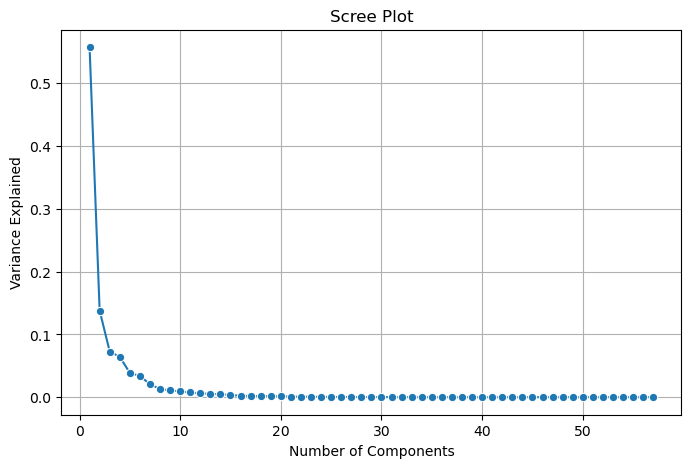

In [178]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,58),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [179]:
# cumulative sum of explained variance
np.cumsum(pca.explained_variance_ratio_)

array([0.55726063, 0.69510499, 0.76785794, 0.83212212, 0.87077261,
       0.9047243 , 0.92532669, 0.93848433, 0.94929292, 0.95854687,
       0.96607599, 0.97226701, 0.97745473, 0.98238168, 0.98574761,
       0.98813454, 0.99012071, 0.99198278, 0.99368693, 0.99509011,
       0.99609921, 0.99687687, 0.99754058, 0.9980597 , 0.99853404,
       0.99894473, 0.99919891, 0.99939134, 0.9995545 , 0.99969701,
       0.99983525, 0.99992329, 0.9999688 , 0.9999875 , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

**We are proceeding with 7 optimum number of PCs, as it contains 92.53% explained variance.** 

In [180]:
# Extracted PCs from covariance matrix
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5','PC6', 'PC7']]
df_selected

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
No_HH,0.156021,-0.126347,-0.002690,-0.125293,-0.007022,0.004083,-0.118110
TOT_M,0.167118,-0.089677,0.056698,-0.019942,-0.033026,-0.073389,0.089554
TOT_F,0.165553,-0.104912,0.038749,-0.070873,-0.012847,-0.043647,-0.002124
M_06,0.162193,-0.022095,0.057788,0.011917,-0.050248,-0.157957,0.165067
F_06,0.162566,-0.020271,0.050126,0.014844,-0.043848,-0.154436,0.169082
M_SC,0.151358,-0.045111,0.002569,0.012485,-0.173007,-0.064295,-0.001566
F_SC,0.151567,-0.051924,-0.025101,-0.029893,-0.159803,-0.040518,-0.084658
M_ST,0.027234,0.027679,-0.123504,-0.222247,0.433163,0.222591,0.405505
F_ST,0.028183,0.030223,-0.139769,-0.229754,0.438792,0.225531,0.357800
M_LIT,0.161993,-0.115355,0.082168,-0.035163,-0.009101,-0.055465,0.045934


## 2.7):  

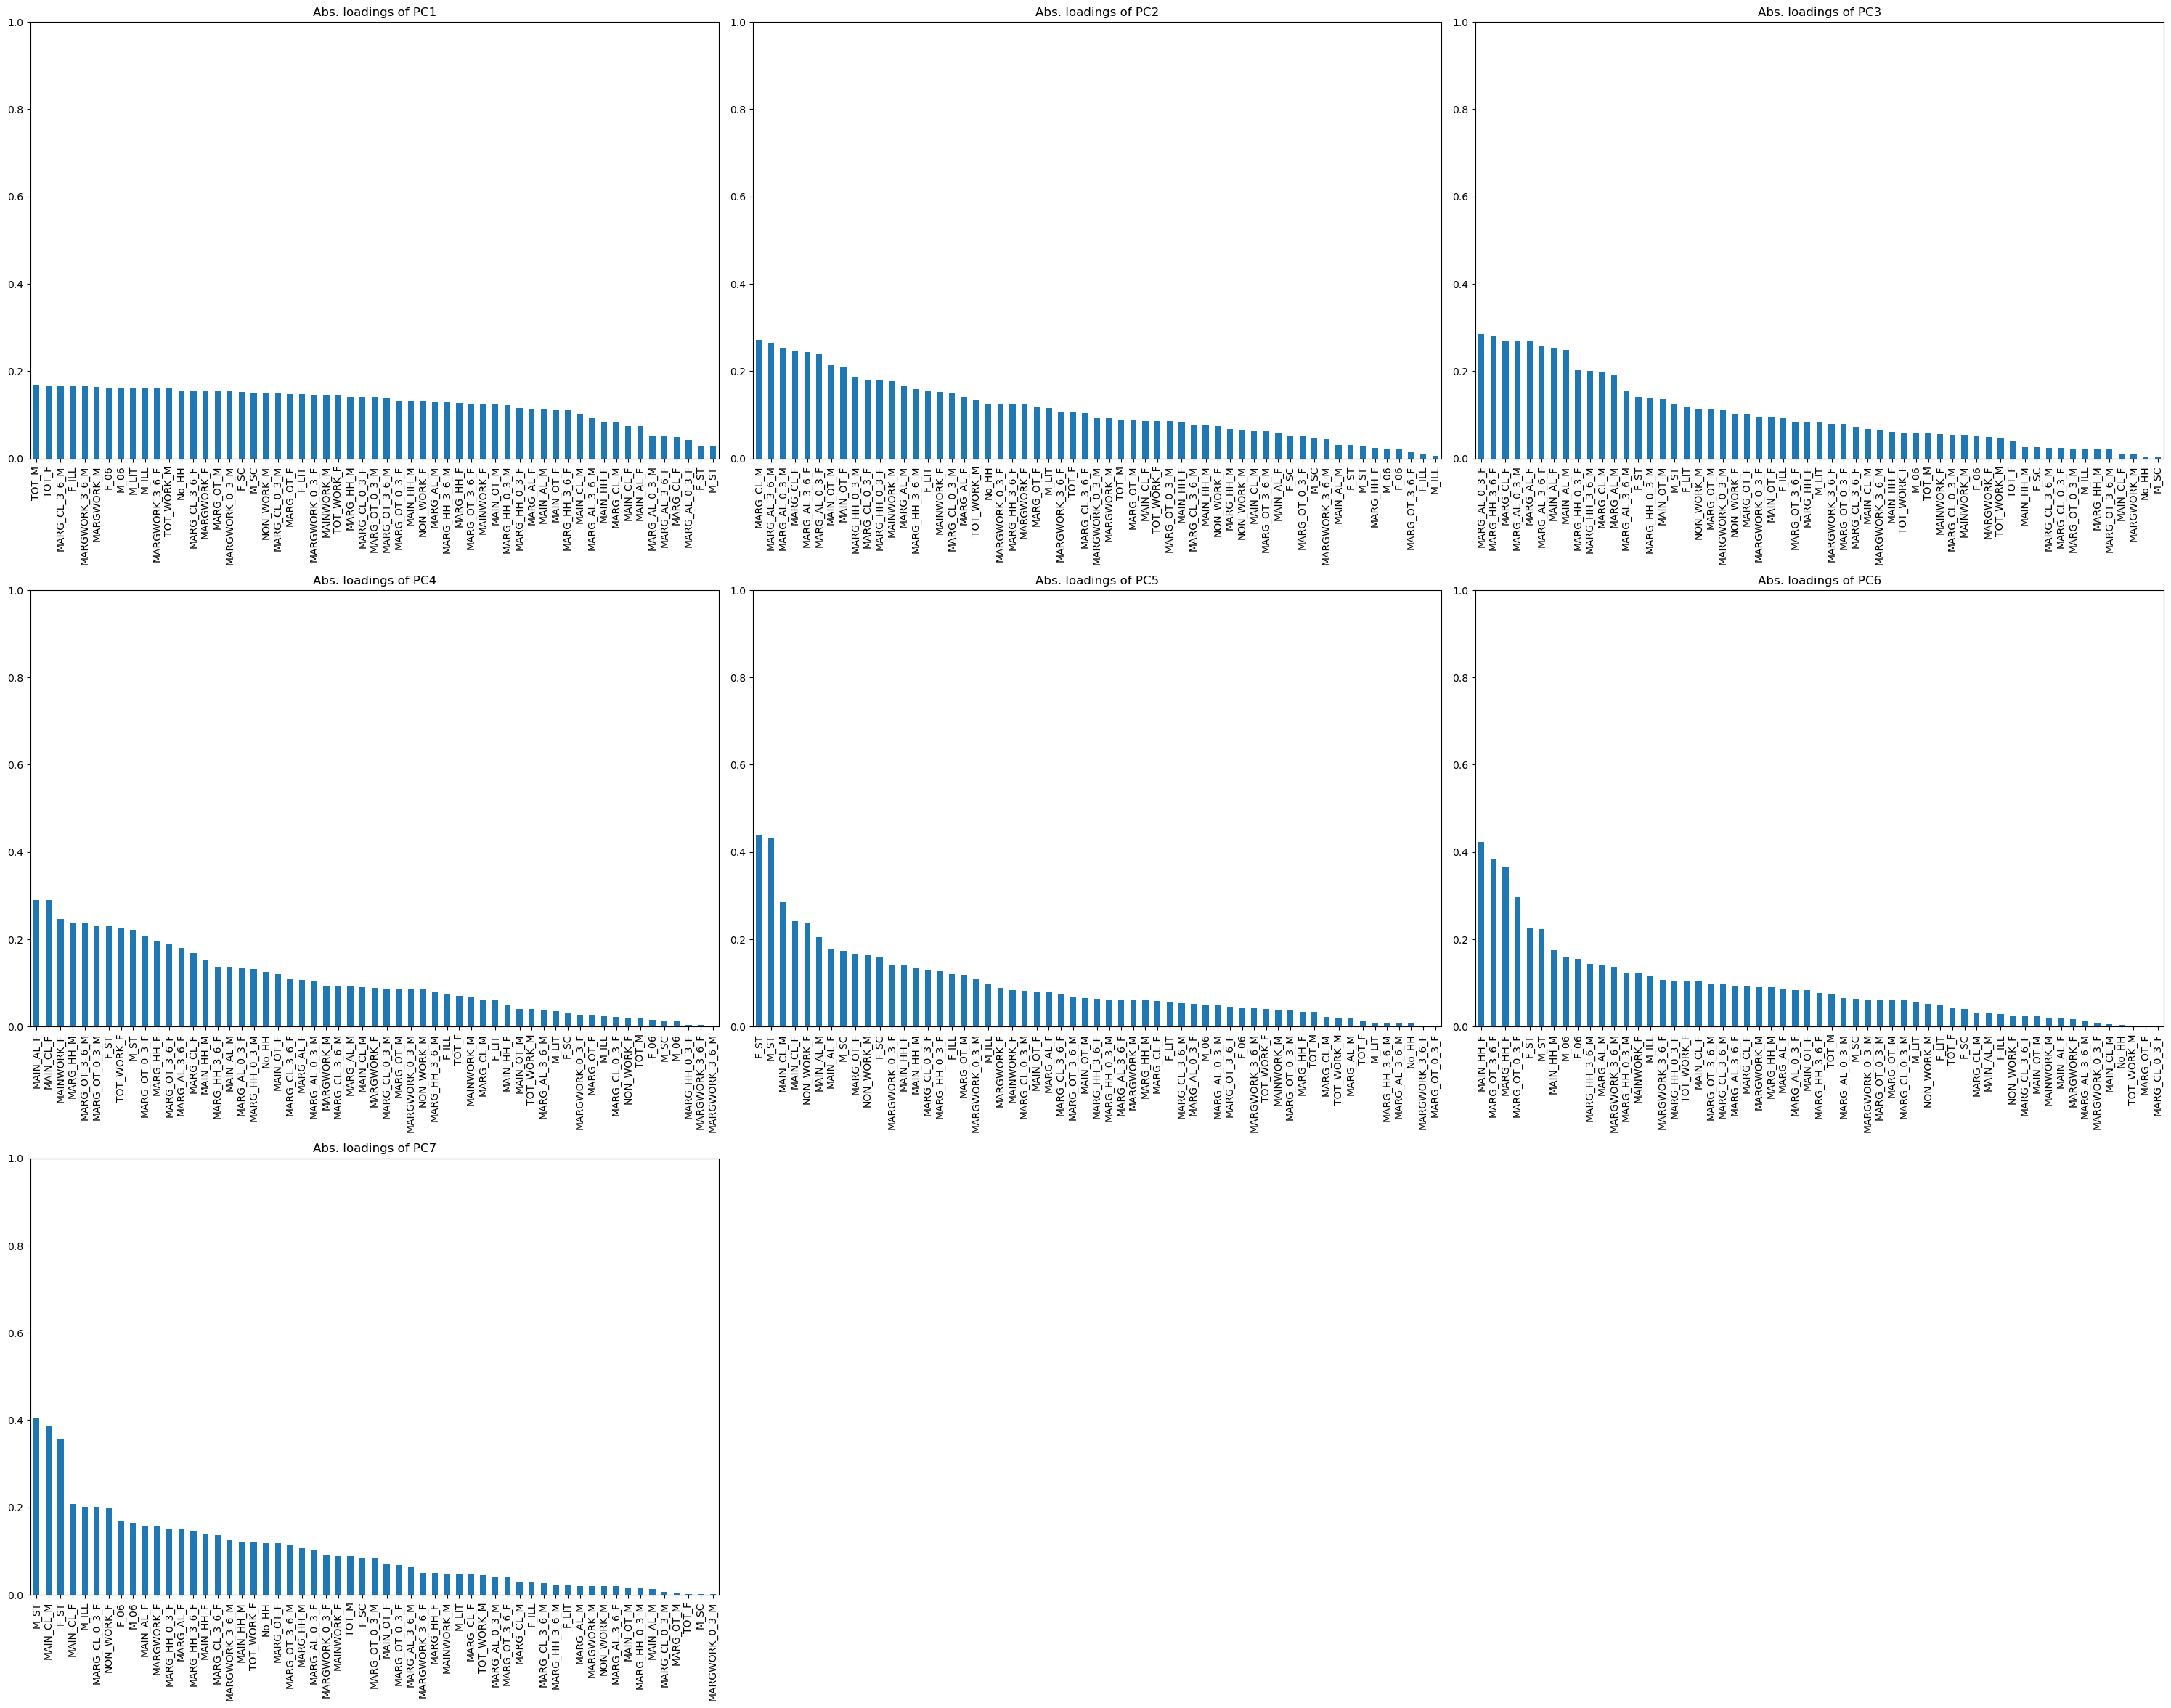

In [181]:
# absolute values to check how the original features matter to each PC
plt.figure(figsize = (30,30))
for i in range(len(df_selected.columns)):
    plt.subplot(4,3,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

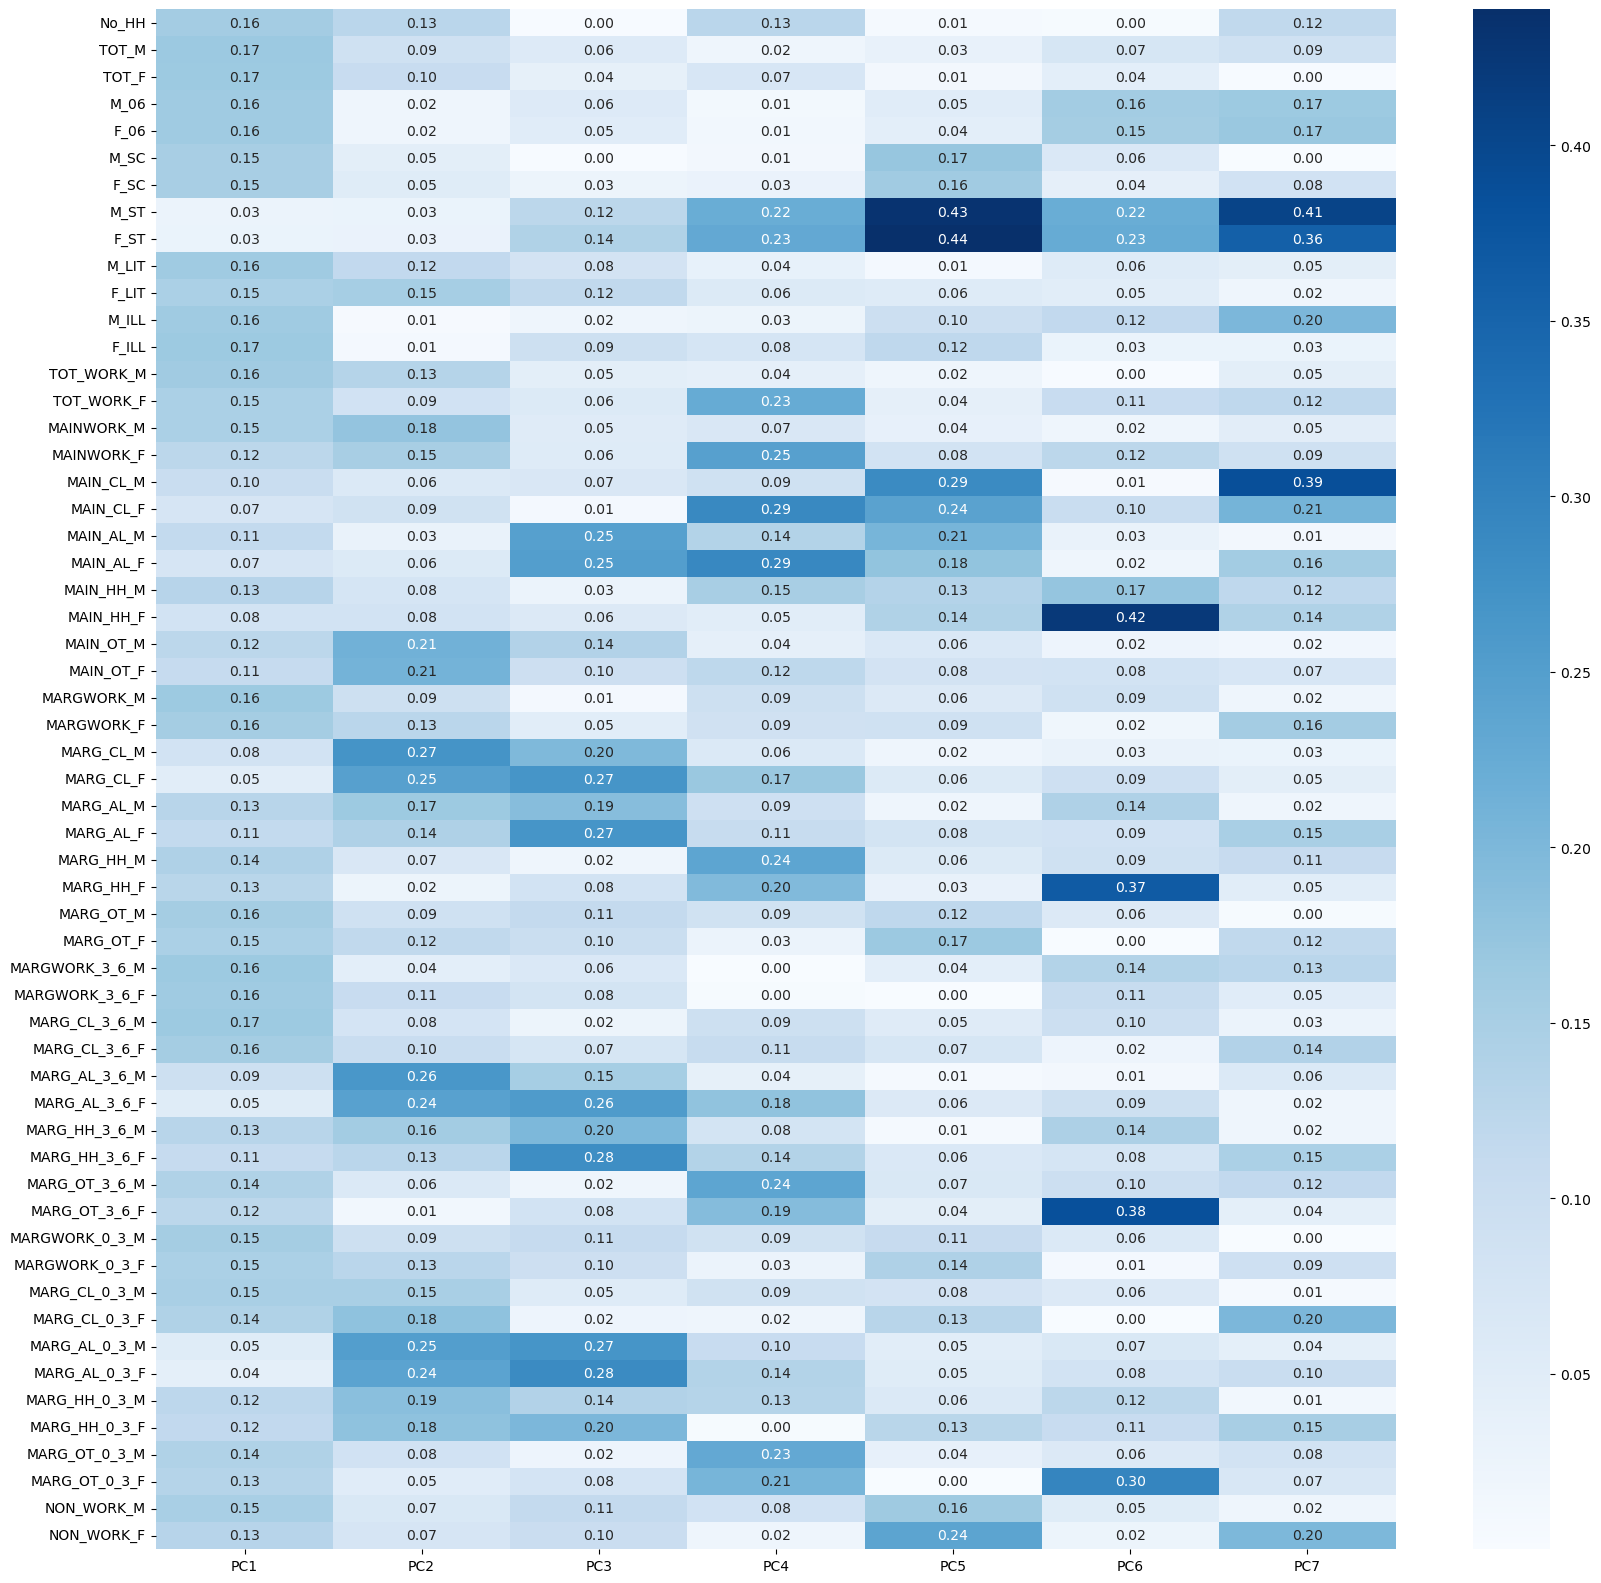

In [182]:
# Heatmap showing how the original features influence various PCs
plt.figure(figsize = (20,20))
sns.heatmap(abs(df_selected), annot = True, cmap = 'Blues',fmt = '.2f');

In [183]:
df_selected

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
No_HH,0.156021,-0.126347,-0.002690,-0.125293,-0.007022,0.004083,-0.118110
TOT_M,0.167118,-0.089677,0.056698,-0.019942,-0.033026,-0.073389,0.089554
TOT_F,0.165553,-0.104912,0.038749,-0.070873,-0.012847,-0.043647,-0.002124
M_06,0.162193,-0.022095,0.057788,0.011917,-0.050248,-0.157957,0.165067
F_06,0.162566,-0.020271,0.050126,0.014844,-0.043848,-0.154436,0.169082
M_SC,0.151358,-0.045111,0.002569,0.012485,-0.173007,-0.064295,-0.001566
F_SC,0.151567,-0.051924,-0.025101,-0.029893,-0.159803,-0.040518,-0.084658
M_ST,0.027234,0.027679,-0.123504,-0.222247,0.433163,0.222591,0.405505
F_ST,0.028183,0.030223,-0.139769,-0.229754,0.438792,0.225531,0.357800
M_LIT,0.161993,-0.115355,0.082168,-0.035163,-0.009101,-0.055465,0.045934


In [184]:
df_pca_new_scaled.iloc[0]

No_HH            -0.904738
TOT_M            -0.771236
TOT_F            -0.815563
M_06             -0.561012
F_06             -0.507738
M_SC             -0.958575
F_SC             -0.957049
M_ST             -0.423306
F_ST             -0.476423
M_LIT            -0.798097
F_LIT            -0.733477
M_ILL            -0.604015
F_ILL            -0.798229
TOT_WORK_M       -0.859260
TOT_WORK_F       -1.010238
MAINWORK_M       -0.872367
MAINWORK_F       -0.898216
MAIN_CL_M        -1.042844
MAIN_CL_F        -0.986630
MAIN_AL_M        -0.851060
MAIN_AL_F        -0.683276
MAIN_HH_M        -0.630766
MAIN_HH_F        -0.407555
MAIN_OT_M        -0.624042
MAIN_OT_F        -0.611637
MARGWORK_M       -0.516943
MARGWORK_F       -0.966512
MARG_CL_M        -0.321809
MARG_CL_F        -0.485053
MARG_AL_M        -0.331426
MARG_AL_F        -0.860192
MARG_HH_M        -0.377984
MARG_HH_F        -0.453026
MARG_OT_M        -0.548764
MARG_OT_F        -0.614625
MARGWORK_3_6_M   -0.648040
MARGWORK_3_6_F   -0.663795
M

In [185]:
pca = PCA(n_components=7, random_state=123)
pca_final = pca.fit_transform(df_pca_new_scaled)

**Additionally**

In [186]:
# PC scores
pca_final

array([[-4.61726348,  0.13811585,  0.32854494, ...,  0.35373666,
        -0.42094718, -0.01038594],
       [-4.77166187, -0.10586534,  0.24444916, ..., -0.15388355,
         0.41731047, -0.02312096],
       [-5.96483558, -0.29434688,  0.36739364, ...,  0.47819919,
         0.27658083,  0.06955481],
       ...,
       [-6.294625  , -0.63812664,  0.10748287, ...,  0.15374553,
         0.14114567, -0.34450018],
       [-6.22319199, -0.67231967,  0.27132551, ...,  0.0604402 ,
        -0.11568169, -0.38303353],
       [-5.89623627, -0.93716953,  0.3492184 , ...,  0.14910383,
        -0.15454297, -0.38450817]])

In [187]:
pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-4.617263,0.138116,0.328545,1.543697,0.353737,-0.420947,-0.010386
1,-4.771662,-0.105865,0.244449,1.963214,-0.153884,0.417310,-0.023121
2,-5.964836,-0.294347,0.367394,0.619542,0.478199,0.276581,0.069555
3,-6.280796,-0.500384,0.212701,1.074515,0.300799,0.051158,-0.250539
4,-4.478566,0.894154,1.078277,0.535556,0.804065,0.341676,-0.092335


**After creating a data frame of the PC scores, next step is to check if there are any correlation between the variables.**

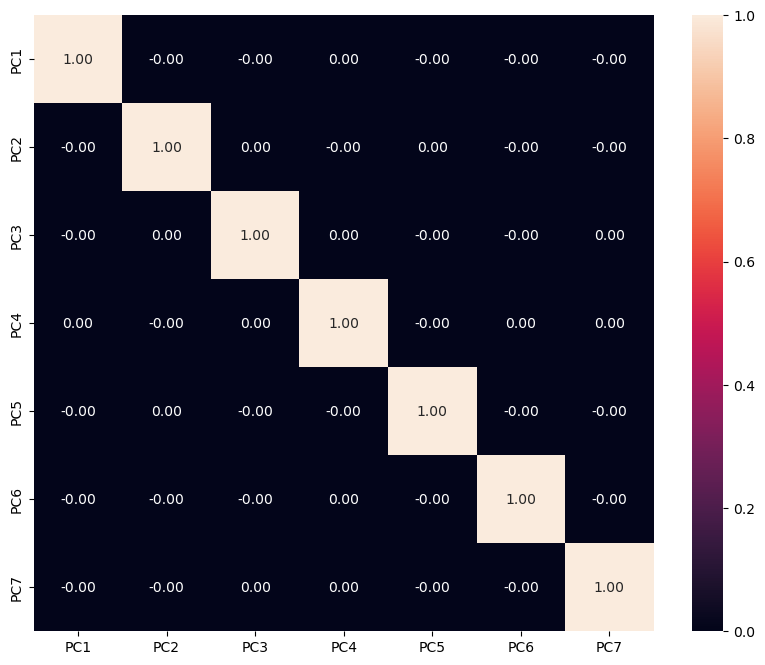

In [188]:
# To check for correlations between the PCs
plt.figure(figsize = (10,8))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');

**Dimensions reduced from 57 variables to 7 PCs and correlation between the PCs are almost 0.**

## 2.8):  

In [189]:
for i in range(0,57):
    print("(",np.round(pca.components_[0][i],2),")",'*',df_pca_new_scaled.columns[i], end='+')    

( 0.16 ) * No_HH+( 0.17 ) * TOT_M+( 0.17 ) * TOT_F+( 0.16 ) * M_06+( 0.16 ) * F_06+( 0.15 ) * M_SC+( 0.15 ) * F_SC+( 0.03 ) * M_ST+( 0.03 ) * F_ST+( 0.16 ) * M_LIT+( 0.15 ) * F_LIT+( 0.16 ) * M_ILL+( 0.17 ) * F_ILL+( 0.16 ) * TOT_WORK_M+( 0.15 ) * TOT_WORK_F+( 0.15 ) * MAINWORK_M+( 0.12 ) * MAINWORK_F+( 0.1 ) * MAIN_CL_M+( 0.07 ) * MAIN_CL_F+( 0.11 ) * MAIN_AL_M+( 0.07 ) * MAIN_AL_F+( 0.13 ) * MAIN_HH_M+( 0.08 ) * MAIN_HH_F+( 0.12 ) * MAIN_OT_M+( 0.11 ) * MAIN_OT_F+( 0.16 ) * MARGWORK_M+( 0.16 ) * MARGWORK_F+( 0.08 ) * MARG_CL_M+( 0.05 ) * MARG_CL_F+( 0.13 ) * MARG_AL_M+( 0.11 ) * MARG_AL_F+( 0.14 ) * MARG_HH_M+( 0.13 ) * MARG_HH_F+( 0.16 ) * MARG_OT_M+( 0.15 ) * MARG_OT_F+( 0.16 ) * MARGWORK_3_6_M+( 0.16 ) * MARGWORK_3_6_F+( 0.17 ) * MARG_CL_3_6_M+( 0.16 ) * MARG_CL_3_6_F+( 0.09 ) * MARG_AL_3_6_M+( 0.05 ) * MARG_AL_3_6_F+( 0.13 ) * MARG_HH_3_6_M+( 0.11 ) * MARG_HH_3_6_F+( 0.14 ) * MARG_OT_3_6_M+( 0.12 ) * MARG_OT_3_6_F+( 0.15 ) * MARGWORK_0_3_M+( 0.15 ) * MARGWORK_0_3_F+( 0.15 ) * MAR

**PC1 = a1X1 + a2X2 + a3X3 + a4X4 + ..................+ a57X57**